# Data Challenge 2 : Challenge Large Scale Machine Learning

##### Author : Hugo Michel, Juin 2022

### Data Challenge Description : Face Recognition

In recent years, face recognition systems have achieved extremely high levels of performance, opening the door to a wider range of applications where reliability levels were previously prohibitive to consider automation. This is mainly due to the adoption of deep learning techniques in computer vision. The most widely adopted paradigm is to train a $f: \mathcal{X} \rightarrow \mathbb{R}^d$ which, from a given image $im \in \mathcal{X}$, extracts a feature vector $z \in \mathbb{R}^d$ which synthesizes the relevant features of $im$. 

The recognition phase then consists, from two images $im_1, im_2$, in predicting whether or not they correspond to the same identity. This is done from the extracted features $z_1, z_2$.

### Goal

In this data challenge, the goal is to train a machine learning model that, given a vector $[z_1, z_2]$ consisting of the concatenation of two patterns $z_1$ and $z_2$, predicts whether or not these two images match the same identity.

In addition, special attention will be paid to the fairness of the prediction model with respect to the gender of the individuals. This means that the model must be as efficient as possible, regardless of the gender of the person. 

### Training Data

The train set consists of two files ``train_data.npy`` and ```train_labels.txt```


The ```train_data.npy``` file contains one observation per line, which consists of the concatenation of two templates, each of **dimension 48**
    
The file ```train_labels.npy``` contains two classes labeled per line that indicate whether the image pair matches the same identity: 
    
- ```1``` => image pairs belonging to the same identity
- ```0``` => image pairs not belonging to the same identity

In total, there are 267508 observations.

### Performance

For the evaluation of the performance of the models, the idea is to minimize the sum of the rate of **false positives rate** ```FPR``` and the rate of **false negatives rate** ```FNR```. The performance score of the model is calculated using the following equation.

$score = 1 - (FPR + FNR)$

### Fairness Peformance criterion

Moreover, we want the prediction to be as fair as possible with respect to the gender attribute. In our case, we want to make the ratios 


$$ BFPR := \frac{\max(FPR(male),FPR(female))}{\mathrm{GeomMean}(FPR(male),FPR(female))} \geq 1 $$
and


$$ BFNR := \frac{\max(FNR(male),FNR(female))}{\mathrm{GeomMean}(FNR(male),FNR(female))} \geq 1 $$


as close to 1 as possible, which corresponds to its minimum value. </br>
Here, $\mathrm{GeomMean}$ stands for the geometric mean, which is equal to $\sqrt{xy}$ for two nonnegative real numbers $x$ and $y$.

For a given input $\mathbf{x}$ made of two templates, the gender attribute of the first template is $\mathbf{X}[8]$ and the one of the second template is $\mathbf{X}[56]$. The value 1 is for "male" and 0 for "female".

## Introduction

The Data challenge that was proposed to us in **MDI 343** course dedicated to statistical learning, focused only on the raw performance of prediction models. Indeed, the idea was to minimize the sum of the false positive and false negative rates. Hence the goal is to maximize $score = 1 - (FPR + FNR)$

In the **MDI 341** course, a new data challenge are presented to us. This second data challenge is an evolution of the data challenge in the **MDI 341** course as a new performance metric makes its appearance.

Fair machine learning is a topical problem. It studies how to mitigate unethical bias against minority people in model
prediction. This is why the objective of this data challenge is to design a model that is both efficient and fair.

More precisely, this new data challenge uses exactly the same training and test data as the old data challenge, only the training objective changes because the objective here will be to train the model jointly on two performance metrics which are : 
- Prediction performance
- Fairness performance criterion


## General feedback regarding the MDI 343 Data Challenge (previous Data Challenge)

### Summary of the strategy adopted for the first data challenge

For the first data challenge I followed the following steps:

**1/ Data investigation**

- Analyze the type of the features
- Handle missing values 
- Check if the dataset contains binary features
- Analyze train labels distribution after preprocessing
- Analyze correlation between features
- Apply ``PCA``

**2/ Data preprocessing**

- Drop duplicate elements
- Convert type of columns

**3/ Features selection**

- Select the best features to simplify the classification task by applying several features selection model such as ``Featurewiz``, ``ElasticNet`` and ``Random Forest Feature Importance`` 

**4/ Apply Machine learning algorithms on initial features and features which are selected by at least two times by the previous feature selection model**

- Statistical learning model: ``SVM``, ``k-NN``, ``Decision Tree``

- Assembly models such as ``Random Forests``, ``Adaboost``, ``XGBoost`` and ``Gradient Boosting``

- Voting Classifier that encompass several best classfiers models for the binary classification task.

- Neural Networks

**6/ Generate new features (Enlarged strategy)**

Generation of new features by performing linear combinations between the initial features. In fact, between the vectors $Z_{1}$ and $Z_{2}$ such as $Z_{1} + Z_{2}$, $Z_{1} - Z_{2}$ and $Z_{1} * Z_{2}$

**7/ Fit the best model**

**8/ Predict the label with the best model on the entire train dataset**

This strategy led to different results which are available in the table below.

This table summarizes the different approaches and models that were tested for the first version of the data challenge as well as the result obtained on the initial performance metric for each model and approach.

| Model | Feature Engineering | Hard Voting | Soft Voting |Score FNR+FPR rate (Valid test) | 1-(FNR+FPR) (Valid Test) |
|-----------|-----------|-----------|-----------|-----------|-----------|
| Adaboost (baseline) | Features Selection | No | No | 0.52 | 0.48 |
| Gradient Boosting | Features Selection | No | No | 0.54 | 0.46 |
| XGBoost  | Features Selection | No | No | 0.45 | 0.55 |
| XGBoost  | Initial features | No | No | 0.40 | 0.60 |
| LightGBM | Initial features | No | No | 0.39 | 0.61 |
| CatBoost  | Initial features | No | No | 0.387 | 0.613 |
| XGBoost + LightGBM + CatBoost | Initial features | Yes | No | 0.382 | 0.618 |
| XGBoost + LightGBM + CatBoost | Initial features | No | Yes | 0.384 | 0.616 |
| XGBoost + LightGBM + CatBoost | Enlarged features | Yes | No | 0.379 | 0.621 |
| Neural Network | Initial features | No | No | 0.44 | 0.56 |

### Discussion

We could see that the features selection did not have the expected effect, since when I trained a model on the whole dataset without going through the feature selection step, it gave better results as we could see with the model ```XGBoost```and the others boosting models.

Overall, the boosting models provided the best performance. The best performing boosting model for the first data challenge seems to be the ``CatBoost`` algorithm. But I managed to improve the performance by doing a majority vote between ```XGBoost```, ```LightGBM```, ```CatBoost```

In addition, I managed to further improve the performance of my model by creating new features via linear combinations between features. Extending the number of explicative variables of the input dataset seems to improve the performance of the model

Through the fist data challenge, I realized that refining the hyperparameters of machine learning models can be tough task. However, when hyperparameters are well chosen, they usually lead to better performing models. Also, it was noticed that boosting models are better when they work together thanks to and when they are combined with a majority voting system.

## Overall Strategy

As previously explained, since this new data challenge uses the same data as the previous one, there is no need to perform a data analysis as this has already been done extensively for the first data challenge. It is possible to review the exploratory analysis I made for the first data challenge by consulting directly my github, the notebook is available 
[here](https://github.com/hugo-mi/MDI343_Data_Challenge_Face_Recognition/blob/main/MDI_343_Data_Challenge_Hugo_Michel.ipynb "here") 

Moreover, it will be interesting to perform a deeper exploratory analysis of the columns ``X[8]`` and ``X[56]`` which are crucial columns for the fairness metric.

Moreover, through the experience of this first data challenge, we know that the generation of new features can improve the performance of the model. In addition, dimension reduction, in order to simplify the classification model by applying different feature selection models, does not seem to be a good option for this data challenge at least as far as only the performance metric is concerned.

This is why the strategy I will opt for is to reuse the model with the best performance of the first data challenge as a baseline model. 

The real challenge of this data challenge is to find the proper trade-off between the two metrics. To achieve this, one of possible good approach is to train the model on a **custom metric**.

## -------- Import libs --------

In [1]:
### Install requirements ###
#!pip install featurewiz
#!pip install scikit_optimize
#!pip3 install catboost
#!pip install optuna

### Data transformation libs ###
import numpy as np
import pandas as pd

### Viz libs ###
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Features selection libs ###
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet
from itertools import product
from featurewiz import featurewiz

### Models selection libs ###
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

### Metrics Evaluation libs ###
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve
from sklearn.metrics import make_scorer

### ML libs ###
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

### Deep Learning libs ###
import tensorflow as tf
from tensorflow import keras

### Optimizer hyperparameters model ###
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

### options ###
np.random.seed(seed=42)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

C:\Users\asus\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Imported featurewiz. Version = 0.1.04. nrows=None uses all rows. Set nrows=1000 to randomly sample 1000 rows.
outputs = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


## -------- Import data --------

In [2]:
def extract_labels(txt_file):
    with open(txt_file) as file:
        lines = file.readlines()
    y = []
    for elem in lines:
        label = int(elem[0])
        y.append(label)
    y = np.array(y)
    return y

### Read ``train_data`` and ``train_labels``

In [3]:
X, y = np.load("train_data.npy"), extract_labels("train_labels.txt")

### Convert ``train_data`` to dataframe

In [4]:
X_copied = X.copy()
X_dataframe = pd.DataFrame(X_copied)

In [5]:
X_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,236.031,1.000,0.000,0.000,-2.134,-3.195,1.100,23.831,1.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,193.0,255.0,160.0,0.0,217.0,79.0,175.0,194.0,221.0,254.0,255.0,254.0,245.0,7.806,4.148,-0.411,2.673,1.451,84.0,0.945000,0.986000,0.621000,0.993000,0.686000,0.375000,0.998000,0.801000,0.0,3.021000,0.0,0.0,238.253,1.000,0.000,0.000,26.322,-9.786,-5.224,26.601,1.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,173.0,255.0,255.0,0.0,110.0,0.0,175.0,153.0,136.0,247.0,255.0,254.0,175.0,1.059,1.926,26.732,3.698,-1.463,78.0,0.929000,0.988000,0.643000,0.912000,0.995000,0.335000,0.995000,0.829000,0.0,2.503000,0.0,0.0
1,228.040,1.000,0.000,0.000,-0.860,-15.950,-1.410,58.040,0.0,1.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,212.0,255.0,255.0,213.0,96.0,172.0,188.0,226.0,254.0,196.0,225.0,210.0,2.570,1.130,-2.610,-4.070,-2.220,121.0,0.823407,0.993560,0.918158,0.858533,0.932080,0.649915,0.902721,0.869304,0.0,2.331588,1.0,0.0,107.160,1.000,0.000,0.000,3.690,9.150,0.840,59.800,0.0,0.880,1.0,1.0,0.0,0.0,0.670,255.0,170.0,181.0,229.0,255.0,255.0,141.0,22.0,175.0,193.0,212.0,220.0,255.0,254.0,158.0,-7.620,1.130,5.470,23.950,4.720,96.0,0.985727,0.996261,0.637621,0.847861,0.927677,0.403857,0.978128,0.826418,0.0,2.245238,1.0,0.0
2,158.310,1.000,0.000,0.000,-2.290,-7.680,0.120,22.770,1.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,201.0,255.0,248.0,0.0,255.0,220.0,236.0,175.0,194.0,202.0,254.0,255.0,254.0,247.0,5.660,1.540,-1.620,-0.060,-0.750,63.0,0.616242,0.985232,0.961017,0.995382,0.696401,0.768143,0.993044,0.860056,0.0,2.580157,0.0,0.0,214.620,1.000,0.000,0.000,1.240,-17.120,0.620,23.650,1.0,0.910,1.0,1.0,0.0,0.0,0.720,255.0,90.0,3.0,219.0,0.0,255.0,220.0,255.0,175.0,194.0,209.0,254.0,255.0,225.0,242.0,6.950,1.850,2.830,-4.280,2.890,60.0,0.718895,0.999113,0.611766,0.617831,0.864550,0.388376,0.922516,0.731915,0.0,3.006712,1.0,0.0
3,165.464,0.284,0.000,0.716,38.303,-16.267,-9.469,45.229,1.0,0.003,1.0,1.0,0.0,0.0,0.001,255.0,150.0,93.0,169.0,32.0,0.0,110.0,0.0,175.0,171.0,130.0,11.0,221.0,225.0,137.0,-10.177,2.300,57.818,1.508,1.880,56.0,0.897000,0.992000,0.500000,0.826000,0.993000,0.853000,0.990000,0.865000,0.0,-0.883000,0.0,0.0,173.099,1.000,0.000,0.000,-35.935,-6.119,0.461,30.383,1.0,0.003,1.0,0.0,0.0,1.0,0.001,255.0,205.0,147.0,237.0,177.0,0.0,110.0,0.0,175.0,178.0,133.0,0.0,255.0,225.0,170.0,-7.922,4.290,-35.607,4.839,-5.786,68.0,0.884000,0.993000,0.836000,0.834000,0.939000,0.892000,0.991000,0.911000,0.0,-2.930000,0.0,0.0
4,153.727,1.000,0.000,0.000,0.780,-5.169,-0.291,27.574,0.0,0.001,1.0,1.0,0.0,0.0,0.001,255.0,255.0,218.0,247.0,255.0,0.0,154.0,72.0,175.0,140.0,199.0,171.0,255.0,254.0,145.0,3.239,2.047,0.166,1.760,1.430,88.0,0.545000,0.628000,0.876000,0.999000,0.639000,0.440000,1.002000,0.733000,0.0,0.575000,0.0,0.0,201.940,0.862,0.138,0.000,-5.379,5.491,-0.406,18.810,0.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,234.0,216.0,255.0,0.0,160.0,162.0,175.0,194.0,200.0,114.0,255.0,254.0,164.0,-4.820,1.744,-3.066,-2.805,-1.338,88.0,0.914000,0.936000,0.968000,0.963000,0.657000,0.483000,0.987000,0.845000,0.0,-1.016000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297227,77.865,0.989,0.006,0.004,27.117,-25.148,-19.818,26.619,0.0,0.002,1.0,1.0,0.0,0.0,0.001,255.0,255.0,195.0,255.0,171.0,0.0,118.0,0.0,175.0,194.0,220.0,162.0,255.0,254.0,0.0,-1.256,2.123,26.403,-30.177,-11.785,80.0,0.892000,0.974000,-0.038000,0.954000,0.934000,0.333000,1.005000,0.722000,0.0,

### Convert ``train_labels`` to dataframe

In [6]:
y_copied = y.copy()
y_dataframe = pd.DataFrame(y_copied)

## -------- Exploratory Data Analysis --------

As mentioned before, the idea here is not to do an exploratory analysis because this has already been done for the first version of the data challenge. However, it can be interesting to take a closer look at the features that are determinant with the performance of the equity, namely the features ``X[8]`` (8th column of the train dataset) and ``X[56]`` (56th column of the train dataset).

When I did the exploratory analysis for the first data challenge, I can observed that the features ``X[8]`` and ``X[56]`` seems to be binary columns. However, it was impossible to give any real meaning to these two features. Now with the second data challenge, we know that these columns refer to the gender of the person.

In addition, it will be interesting to do further exploratory analysis of the ``X[8]`` and ``X[56]`` columns which are the defining columns for the equity metric. For example, it would be interesting to look at the distribution of these two variables and thus find out if women are as well represented as men in the data set. When sampling, a balance must be struck between representativeness and critical mass constraints. For data sampling, we know that the goal is to ensure that samples are statistically representative of future cases that a given model is likely to encounter. This is generally a good practice. In our case the gender imbalance distribution could reduce the equity performance of the model. Therefore, it is appropriate to conduct a more in-depth exploratory analysis by focusing primarily on these two columns. 

### Data Analysis for features ``X[8]`` and ``X[56]`` of the ``train_data`` dataset

**Note :** 

The gender attribute of the first template is  ``X[8]``  and the one of the second template is  ``X[56]`` . The value 1 is for "male" and 0 for "female".

#### Visualization of ``train_data``

In [7]:
X_dataframe.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,236.031,1.000,0.0,0.000,-2.134,-3.195,1.100,23.831,1.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,193.0,255.0,160.0,0.0,217.0,79.0,175.0,194.0,221.0,254.0,255.0,254.0,245.0,7.806,4.148,-0.411,2.673,1.451,84.0,0.945000,0.986000,0.621000,0.993000,0.686000,0.375000,0.998000,0.801000,0.0,3.021000,0.0,0.0,238.253,1.000,0.000,0.000,26.322,-9.786,-5.224,26.601,1.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,173.0,255.0,255.0,0.0,110.0,0.0,175.0,153.0,136.0,247.0,255.0,254.0,175.0,1.059,1.926,26.732,3.698,-1.463,78.0,0.929000,0.988000,0.643000,0.912000,0.995000,0.335000,0.995000,0.829000,0.0,2.503000,0.0,0.0
1,228.040,1.000,0.0,0.000,-0.860,-15.950,-1.410,58.040,0.0,1.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,212.0,255.0,255.0,213.0,96.0,172.0,188.0,226.0,254.0,196.0,225.0,210.0,2.570,1.130,-2.610,-4.070,-2.220,121.0,0.823407,0.993560,0.918158,0.858533,0.932080,0.649915,0.902721,0.869304,0.0,2.331588,1.0,0.0,107.160,1.000,0.000,0.000,3.690,9.150,0.840,59.800,0.0,0.880,1.0,1.0,0.0,0.0,0.670,255.0,170.0,181.0,229.0,255.0,255.0,141.0,22.0,175.0,193.0,212.0,220.0,255.0,254.0,158.0,-7.620,1.130,5.470,23.950,4.720,96.0,0.985727,0.996261,0.637621,0.847861,0.927677,0.403857,0.978128,0.826418,0.0,2.245238,1.0,0.0
2,158.310,1.000,0.0,0.000,-2.290,-7.680,0.120,22.770,1.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,201.0,255.0,248.0,0.0,255.0,220.0,236.0,175.0,194.0,202.0,254.0,255.0,254.0,247.0,5.660,1.540,-1.620,-0.060,-0.750,63.0,0.616242,0.985232,0.961017,0.995382,0.696401,0.768143,0.993044,0.860056,0.0,2.580157,0.0,0.0,214.620,1.000,0.000,0.000,1.240,-17.120,0.620,23.650,1.0,0.910,1.0,1.0,0.0,0.0,0.720,255.0,90.0,3.0,219.0,0.0,255.0,220.0,255.0,175.0,194.0,209.0,254.0,255.0,225.0,242.0,6.950,1.850,2.830,-4.280,2.890,60.0,0.718895,0.999113,0.611766,0.617831,0.864550,0.388376,0.922516,0.731915,0.0,3.006712,1.0,0.0
3,165.464,0.284,0.0,0.716,38.303,-16.267,-9.469,45.229,1.0,0.003,1.0,1.0,0.0,0.0,0.001,255.0,150.0,93.0,169.0,32.0,0.0,110.0,0.0,175.0,171.0,130.0,11.0,221.0,225.0,137.0,-10.177,2.300,57.818,1.508,1.880,56.0,0.897000,0.992000,0.500000,0.826000,0.993000,0.853000,0.990000,0.865000,0.0,-0.883000,0.0,0.0,173.099,1.000,0.000,0.000,-35.935,-6.119,0.461,30.383,1.0,0.003,1.0,0.0,0.0,1.0,0.001,255.0,205.0,147.0,237.0,177.0,0.0,110.0,0.0,175.0,178.0,133.0,0.0,255.0,225.0,170.0,-7.922,4.290,-35.607,4.839,-5.786,68.0,0.884000,0.993000,0.836000,0.834000,0.939000,0.892000,0.991000,0.911000,0.0,-2.930000,0.0,0.0
4,153.727,1.000,0.0,0.000,0.780,-5.169,-0.291,27.574,0.0,0.001,1.0,1.0,0.0,0.0,0.001,255.0,255.0,218.0,247.0,255.0,0.0,154.0,72.0,175.0,140.0,199.0,171.0,255.0,254.0,145.0,3.239,2.047,0.166,1.760,1.430,88.0,0.545000,0.628000,0.876000,0.999000,0.639000,0.440000,1.002000,0.733000,0.0,0.575000,0.0,0.0,201.940,0.862,0.138,0.000,-5.379,5.491,-0.406,18.810,0.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,234.0,216.0,255.0,0.0,160.0,162.0,175.0,194.0,200.0,114.0,255.0,254.0,164.0,-4.820,1.744,-3.066,-2.805,-1.338,88.0,0.914000,0.936000,0.968000,0.963000,0.657000,0.483000,0.987000,0.845000,0.0,-1.016000,0.0,0.0
5,198.550,1.000,0.0,0.000,0.180,-12.890,0.850,18.080,0.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,224.0,255.0,255.0,216.0,0.0,175.0,194.0,222.0,254.0,255.0,254.0,247.0,10.940,1.140,0.610,6.330,2.310,115.0,0.885903,0.988705,0.903482,0.805560,0.985948,0.597785,0.990743,0.880715,0.0,2.743334,0.0,0.0,199.580,1.000,0.000,0.000,2.070,-17.670,0.360,21.540,0.0,0.020,1.0,1.0,0.0,0.0,0.010,255.0,83.0,0.0,225.0,0.0,255.0,179.0,235.0,175.0,194.0,214.0,1.0,255.0,254.0,235.0,6.080,2.150,1.320,-13.540,2.140,51.0,0.819433,0.640720,0.916525,0.996785,0.473596,0.421382,0.897145,0.738814,0.0,-2.751095,0.0,0.0
6,304.509,1.000,0.0,0.000,3.026,-2.632,0.003,35.525,0.0,0.001,1.0,1.0,0.0,0.0,0.001,255.0,25

At first sight, we can see that the columns ``X[8]`` and ``X[56]`` seem to be binary features. This seems to be a good point because these two features seem to describe well the gender of the person in question.

However, these hypotheses must be verified by a deeper data investigation.

#### Visualization of ``X[8]`` and ``X[56]`` of ``train_data``

In [8]:
X_dataframe[[8, 56]].head(20)

,8,56
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,0.0,0.0


By viewing side by side a sample of 20 elements of the features ``X[8]`` and ``X[56]`` seem to be binary. 

Moreover, the two columns seem to be identical because they take the same values.

#### Let's analyze if the features ``X[8]`` and ``X[56]`` are identical

In [12]:
if X_dataframe[8].equals(X_dataframe[56]) == False:
    print("X[8] and X[56] are not equal")

X[8] and X[56] are not equal


If we take a closer look at these two features, we notice that they are not identical
It is advisable to check these hypotheses by visualizing the distribution of the values of the features ``X[8]`` and ``X[56]``

### Visualization of the distribution of feature ``X_8`` VS feature ``X_56``

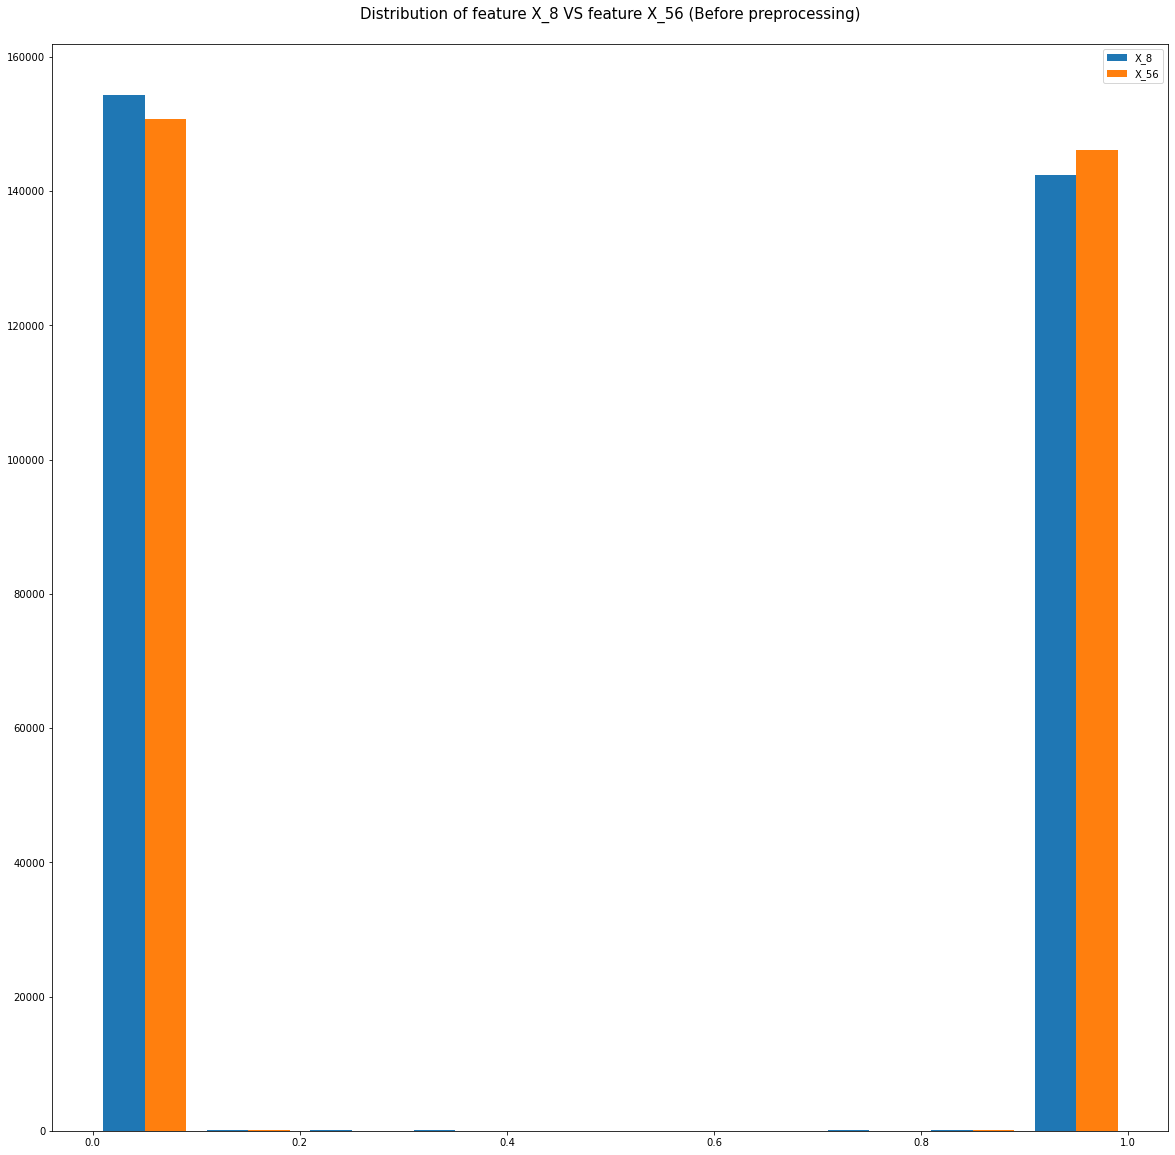

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
plt.hist([X_dataframe[8], X_dataframe[56]], label = ['X_8', 'X_56'])   
plt.legend(loc='middle')
plt.title("Distribution of feature X_8 VS feature X_56 (Before preprocessing)\n", size = 15)
plt.show()

We notice that the distribution between the features ``X[8]`` and ``X[56]`` seem to be almost identical but we know that sometimes graphs can be misleading. More surprisingly, it is difficult to see on the graph that the values taken by ``X[8]`` and ``X[56]`` can be different from **0** and **1**. Indeed, we can hardly see at the bottom of the graph the bars that appear for different values of **0** and **1**. This is surprising because these columns are supposed to be binary given that they describe the gender of the person.

In all cases we notice that women are slightly more represented than men in our training dataset. We can then assume that one of the two ratios ``BFNR`` or ``BFPR`` is systematically higher than the other.

It is worth looking in more detail at the values taken by these two features.

#### Visualization of the distribution of ``X[8]``

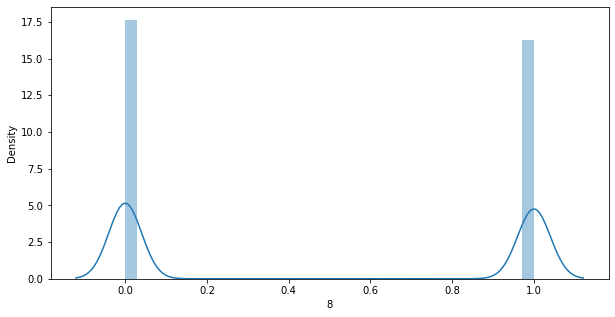

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(X_dataframe[8])

In [12]:
distrib_X8 = pd.DataFrame(X_dataframe[8].value_counts())
distrib_X8

,8
0.000,153863
1.000,142025
0.990,123
0.010,116
0.020,46
0.980,45
0.001,44
0.960,41
0.999,40
0.970,29


#### Visualization of the distribution of ``X[56]``

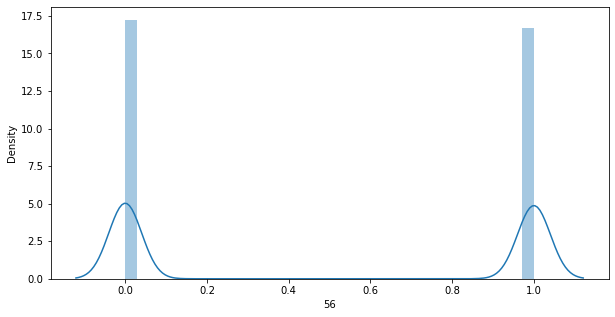

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(X_dataframe[56])

In [13]:
pd.DataFrame(X_dataframe[56].value_counts())

,56
0.000,150414
1.000,145668
0.990,90
0.010,81
0.999,44
0.980,42
0.020,38
0.001,37
0.030,24
0.970,20


The Gaussian distribution of the features ``X[8]`` and ``X[56]`` are globally identical. 

However, if we look in more detail at the values taken by these features, we can see that they are not quite the same. It is then necessary to determine the indices of the data for which the features are different and to look that their label corresponds to a 0 given that the gender of the identity is not the same

## Outliers Analysis

We look at the data for which it is impossible to determine the gender of the person associated with each template. To do this we simply look if the column ``X[8]`` and ``X[56]`` are different from 0 or 1

In [14]:
list_idx_template_outlier = list()

for i in range (X_dataframe.shape[0]):
    if (X_dataframe.loc[i,8] != 0 and X_dataframe.loc[i,8] != 1) or (X_dataframe.loc[i,56] != 0 and X_dataframe.loc[i,56] != 1):
        list_idx_template_outlier.append(i)
        
nb_template_outlier = len(list_idx_template_outlier)
print("There are " + str(nb_template_outlier) + " data for it is impossible to know the gender of the person")

There are 2433 data for it is impossible to know the gender of the person


We reject the data for which we cannot know the gender of the person associated with each template because it could decrease the performance of the algorithm on the equity metric

In [15]:
list_idx_template_no_outlier = list()

for i in range (X_dataframe.shape[0]):
    if (X_dataframe.loc[i,8] == 0 or X_dataframe.loc[i,8] == 1) and (X_dataframe.loc[i,56] == 0 or X_dataframe.loc[i,56] == 1):
        list_idx_template_no_outlier.append(i)
        
X_dataframe_cleaned = X_dataframe.loc[list_idx_template_no_outlier]
X_dataframe_cleaned

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,236.031,1.000,0.000,0.000,-2.134,-3.195,1.100,23.831,1.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,193.0,255.0,160.0,0.0,217.0,79.0,175.0,194.0,221.0,254.0,255.0,254.0,245.0,7.806,4.148,-0.411,2.673,1.451,84.0,0.945000,0.986000,0.621000,0.993000,0.686000,0.375000,0.998000,0.801000,0.0,3.021000,0.0,0.0,238.253,1.000,0.000,0.000,26.322,-9.786,-5.224,26.601,1.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,173.0,255.0,255.0,0.0,110.0,0.0,175.0,153.0,136.0,247.0,255.0,254.0,175.0,1.059,1.926,26.732,3.698,-1.463,78.0,0.929000,0.988000,0.643000,0.912000,0.995000,0.335000,0.995000,0.829000,0.0,2.503000,0.0,0.0
1,228.040,1.000,0.000,0.000,-0.860,-15.950,-1.410,58.040,0.0,1.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,212.0,255.0,255.0,213.0,96.0,172.0,188.0,226.0,254.0,196.0,225.0,210.0,2.570,1.130,-2.610,-4.070,-2.220,121.0,0.823407,0.993560,0.918158,0.858533,0.932080,0.649915,0.902721,0.869304,0.0,2.331588,1.0,0.0,107.160,1.000,0.000,0.000,3.690,9.150,0.840,59.800,0.0,0.880,1.0,1.0,0.0,0.0,0.670,255.0,170.0,181.0,229.0,255.0,255.0,141.0,22.0,175.0,193.0,212.0,220.0,255.0,254.0,158.0,-7.620,1.130,5.470,23.950,4.720,96.0,0.985727,0.996261,0.637621,0.847861,0.927677,0.403857,0.978128,0.826418,0.0,2.245238,1.0,0.0
2,158.310,1.000,0.000,0.000,-2.290,-7.680,0.120,22.770,1.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,201.0,255.0,248.0,0.0,255.0,220.0,236.0,175.0,194.0,202.0,254.0,255.0,254.0,247.0,5.660,1.540,-1.620,-0.060,-0.750,63.0,0.616242,0.985232,0.961017,0.995382,0.696401,0.768143,0.993044,0.860056,0.0,2.580157,0.0,0.0,214.620,1.000,0.000,0.000,1.240,-17.120,0.620,23.650,1.0,0.910,1.0,1.0,0.0,0.0,0.720,255.0,90.0,3.0,219.0,0.0,255.0,220.0,255.0,175.0,194.0,209.0,254.0,255.0,225.0,242.0,6.950,1.850,2.830,-4.280,2.890,60.0,0.718895,0.999113,0.611766,0.617831,0.864550,0.388376,0.922516,0.731915,0.0,3.006712,1.0,0.0
3,165.464,0.284,0.000,0.716,38.303,-16.267,-9.469,45.229,1.0,0.003,1.0,1.0,0.0,0.0,0.001,255.0,150.0,93.0,169.0,32.0,0.0,110.0,0.0,175.0,171.0,130.0,11.0,221.0,225.0,137.0,-10.177,2.300,57.818,1.508,1.880,56.0,0.897000,0.992000,0.500000,0.826000,0.993000,0.853000,0.990000,0.865000,0.0,-0.883000,0.0,0.0,173.099,1.000,0.000,0.000,-35.935,-6.119,0.461,30.383,1.0,0.003,1.0,0.0,0.0,1.0,0.001,255.0,205.0,147.0,237.0,177.0,0.0,110.0,0.0,175.0,178.0,133.0,0.0,255.0,225.0,170.0,-7.922,4.290,-35.607,4.839,-5.786,68.0,0.884000,0.993000,0.836000,0.834000,0.939000,0.892000,0.991000,0.911000,0.0,-2.930000,0.0,0.0
4,153.727,1.000,0.000,0.000,0.780,-5.169,-0.291,27.574,0.0,0.001,1.0,1.0,0.0,0.0,0.001,255.0,255.0,218.0,247.0,255.0,0.0,154.0,72.0,175.0,140.0,199.0,171.0,255.0,254.0,145.0,3.239,2.047,0.166,1.760,1.430,88.0,0.545000,0.628000,0.876000,0.999000,0.639000,0.440000,1.002000,0.733000,0.0,0.575000,0.0,0.0,201.940,0.862,0.138,0.000,-5.379,5.491,-0.406,18.810,0.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,234.0,216.0,255.0,0.0,160.0,162.0,175.0,194.0,200.0,114.0,255.0,254.0,164.0,-4.820,1.744,-3.066,-2.805,-1.338,88.0,0.914000,0.936000,0.968000,0.963000,0.657000,0.483000,0.987000,0.845000,0.0,-1.016000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297227,77.865,0.989,0.006,0.004,27.117,-25.148,-19.818,26.619,0.0,0.002,1.0,1.0,0.0,0.0,0.001,255.0,255.0,195.0,255.0,171.0,0.0,118.0,0.0,175.0,194.0,220.0,162.0,255.0,254.0,0.0,-1.256,2.123,26.403,-30.177,-11.785,80.0,0.892000,0.974000,-0.038000,0.954000,0.934000,0.333000,1.005000,0.722000,0.0,

In [16]:
index_list = X_dataframe_cleaned.index.values.tolist()

list_idx_template_diff = list()

for idx in index_list:
    if X_dataframe_cleaned.loc[idx,8] != X_dataframe_cleaned.loc[idx,56]:
        list_idx_template_diff.append(idx)
        
nb_template_diff = len(list_idx_template_diff)
print("There are " + str(nb_template_diff) + " data for which X[8] and X[56] are different")

There are 9449 data for which X[8] and X[56] are different


#### We now verify that the label for the data where ``X[8]`` and ``X[56]`` are different is fixed at 0 

In [17]:
%%time

counter = 0
column_names = ["index", "X_8", "X_56", "label"]
df_template_diff = pd.DataFrame(columns = column_names)
for i in list_idx_template_diff:
    counter = counter + 1
    print(counter)
    df_template_diff = df_template_diff.append({'index': i, 
                          'X_8': X_dataframe_cleaned.loc[i,8],
                          'X_56': X_dataframe_cleaned.loc[i,56], 
                          'label': y_dataframe.loc[i, 0]}
                          ,ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709


5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349


6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991


8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632


In [18]:
df_template_diff

,index,X_8,X_56,label
0,28.0,1.0,0.0,1.0
1,33.0,1.0,0.0,0.0
2,59.0,1.0,0.0,0.0
3,170.0,1.0,0.0,0.0
4,184.0,0.0,1.0,0.0
...,...,...,...,...
9444,297181.0,0.0,1.0,0.0
9445,297182.0,1.0,0.0,0.0
9446,297183.0,0.0,1.0,0.0
9447,297193.0,0.0,1.0,0.0


We can see that the first line seems to be an outlier because the target variable is set at **1** while the 2 templates do not have the same gender which means that it is actually a different person. That simply mean that pair of images don't belong to the same person so logically the label should be set to **0** but here it is not the case. 

Let's continue our analysis if we can find other such cases in our training dataset

 #### Let's see the number of outliers for which the label is not the right one

In [19]:
df_template_diff["label"].value_counts()

0.0    7847
1.0    1602
Name: label, dtype: int64

We notice that there are **1602** data for which the target variable (i.e. label) is set at **1** whereas normally it should be at **0** because in reality it is not the same person because the gender is not identical between the 2 templates.

Logic would dictate that it is advisable to treat these outliers by simply removing them from our dataset to avoid that they mislead our prediction model and attenuate the performances of the model on the fairness metric. But before to do this drop treatment it is important to inspect the distribution of the test dataset. If the distribution of the features ``X[8]`` and ``X[56]`` in the test dataset is similar to the distribution of the features ``X[8]`` and ``X[56]`` that we observed on the training dataset, then it is not advisable to process these outliers because even if this could lead to better performance when predicting on our training dataset (once our train dataset cut into the train and valid sets), when predicting the model on the test set set that was provided to us in order to make prediction for the data challenge, the model could have difficulties to make good prediction on exceptional cases because these exceptional cases could not be learned by the model since they were removed from the training dataset. Hence, It will be interesting to observe the distribution of the features ``X[8]`` and ``X[56]`` from the ``test_data`` dataset.

### Analyze ``test_data`` dataset

In [14]:
test_data = np.load("test_data.npy")
test_data_dataframe = pd.DataFrame(test_data)
test_data_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,170.140,1.000,0.000,0.000,-0.000,-11.020,-3.070,32.180,1.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,238.0,255.0,255.0,220.0,108.0,175.0,193.0,229.0,251.0,255.0,254.0,226.0,2.060,1.070,-1.630,-1.530,-0.780,118.0,0.844216,0.997256,0.929671,0.936884,0.752725,0.928838,0.992638,0.912097,0.0,2.857030,0.0,0.0,161.020,1.000,0.000,0.000,1.060,-10.960,-1.760,29.490,1.0,0.040,1.0,1.0,0.0,0.0,0.020,255.0,160.0,167.0,255.0,255.0,0.0,214.0,187.0,175.0,40.0,202.0,77.0,255.0,254.0,236.0,-4.240,1.090,5.650,-3.500,-0.230,104.0,0.921770,0.505394,0.896021,0.875605,0.608151,0.849606,0.979814,0.806070,0.0,-0.694720,0.0,0.0
1,135.148,0.994,0.006,0.000,-30.023,-15.470,9.360,44.548,0.0,0.001,1.0,1.0,0.0,0.0,0.001,255.0,255.0,162.0,204.0,221.0,0.0,110.0,56.0,175.0,119.0,130.0,254.0,255.0,254.0,140.0,-3.518,2.012,-34.138,-2.703,1.829,79.0,0.793000,0.848000,0.918000,0.971000,0.794000,0.429000,0.988000,0.821000,0.0,2.214000,0.0,0.0,80.220,0.772,0.228,0.000,-23.865,2.284,0.597,29.534,0.0,0.002,1.0,1.0,0.0,0.0,0.001,255.0,255.0,168.0,235.0,243.0,0.0,110.0,211.0,175.0,193.0,194.0,136.0,255.0,254.0,138.0,-5.964,1.941,-30.289,11.183,-5.499,81.0,0.872000,0.633000,0.937000,0.988000,0.544000,0.164000,0.987000,0.733000,0.0,-0.172000,0.0,0.0
2,194.070,1.000,0.000,0.000,-0.600,-16.610,-1.080,56.870,1.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,230.0,255.0,255.0,220.0,113.0,175.0,194.0,230.0,254.0,255.0,254.0,231.0,1.310,1.040,0.770,0.020,-1.030,127.0,0.827327,0.987265,0.676200,0.852015,0.990901,0.903850,0.947934,0.884600,0.0,3.019360,0.0,0.0,144.760,1.000,0.000,0.000,-2.620,-19.060,-0.310,57.730,1.0,0.000,1.0,1.0,0.0,0.0,0.000,145.0,92.0,13.0,255.0,0.0,255.0,220.0,254.0,175.0,194.0,189.0,246.0,255.0,254.0,172.0,3.710,1.400,-1.130,-0.140,1.270,63.0,0.817503,0.994516,0.661587,0.812022,0.990604,0.803162,0.992972,0.867663,0.0,2.133876,0.0,0.0
3,168.489,0.729,0.000,0.271,33.690,-22.828,-14.179,52.387,0.0,0.006,1.0,1.0,0.0,0.0,0.003,255.0,255.0,178.0,250.0,255.0,0.0,115.0,0.0,175.0,21.0,132.0,250.0,255.0,254.0,54.0,-5.432,3.867,39.572,-10.635,-9.740,73.0,0.804000,0.626000,0.946000,0.985000,0.606000,0.334000,0.948000,0.751000,0.0,1.076000,0.0,0.0,224.876,1.000,0.000,0.000,-3.841,2.341,-0.358,46.174,0.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,229.0,255.0,255.0,0.0,183.0,0.0,175.0,165.0,221.0,0.0,255.0,254.0,175.0,1.653,2.946,-7.837,3.301,-0.663,91.0,0.861000,0.988000,0.881000,0.922000,0.930000,0.257000,0.991000,0.834000,0.0,-3.650000,0.0,0.0
4,101.788,1.000,0.000,0.000,-6.074,-10.998,-0.036,24.359,0.0,0.001,1.0,1.0,0.0,0.0,0.000,255.0,255.0,200.0,247.0,145.0,0.0,111.0,218.0,175.0,194.0,182.0,11.0,255.0,254.0,190.0,2.879,1.634,-17.699,-0.874,-1.390,84.0,0.844000,0.994000,0.959000,0.992000,0.596000,0.313000,0.993000,0.813000,0.0,-1.825000,0.0,0.0,95.087,0.997,0.003,0.000,-20.654,-5.838,-1.246,58.511,0.0,0.001,1.0,1.0,0.0,0.0,0.001,255.0,135.0,67.0,228.0,0.0,0.0,113.0,128.0,175.0,0.0,140.0,2.0,255.0,254.0,157.0,-6.713,1.336,-20.891,1.520,0.292,78.0,0.853000,0.748000,0.938000,0.985000,0.604000,0.322000,0.986000,0.777000,0.0,-3.672000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99075,192.900,1.000,0.000,0.000,2.460,-0.190,-1.300,22.700,0.0,0.000,1.0,1.0,0.0,0.0,0.000,255.0,255.0,255.0,255.0,255.0,255.0,220.0,0.0,175.0,194.0,229.0,254.0,255.0,254.0,252.0,12.870,1.380,2.760,1.920,0.870,114.0,0.956066,0.982004,0.565472,0.851993,0.931530,0.875716,0.9892

#### Visualization of ``X[8]`` and ``X[56]`` of ``test_data``

In [15]:
test_data_dataframe[[8, 56]].head(20)

,8,56
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


#### Visualization of the distribution of feature ``X_8`` VS feature ``X_56`` of ``test_data``

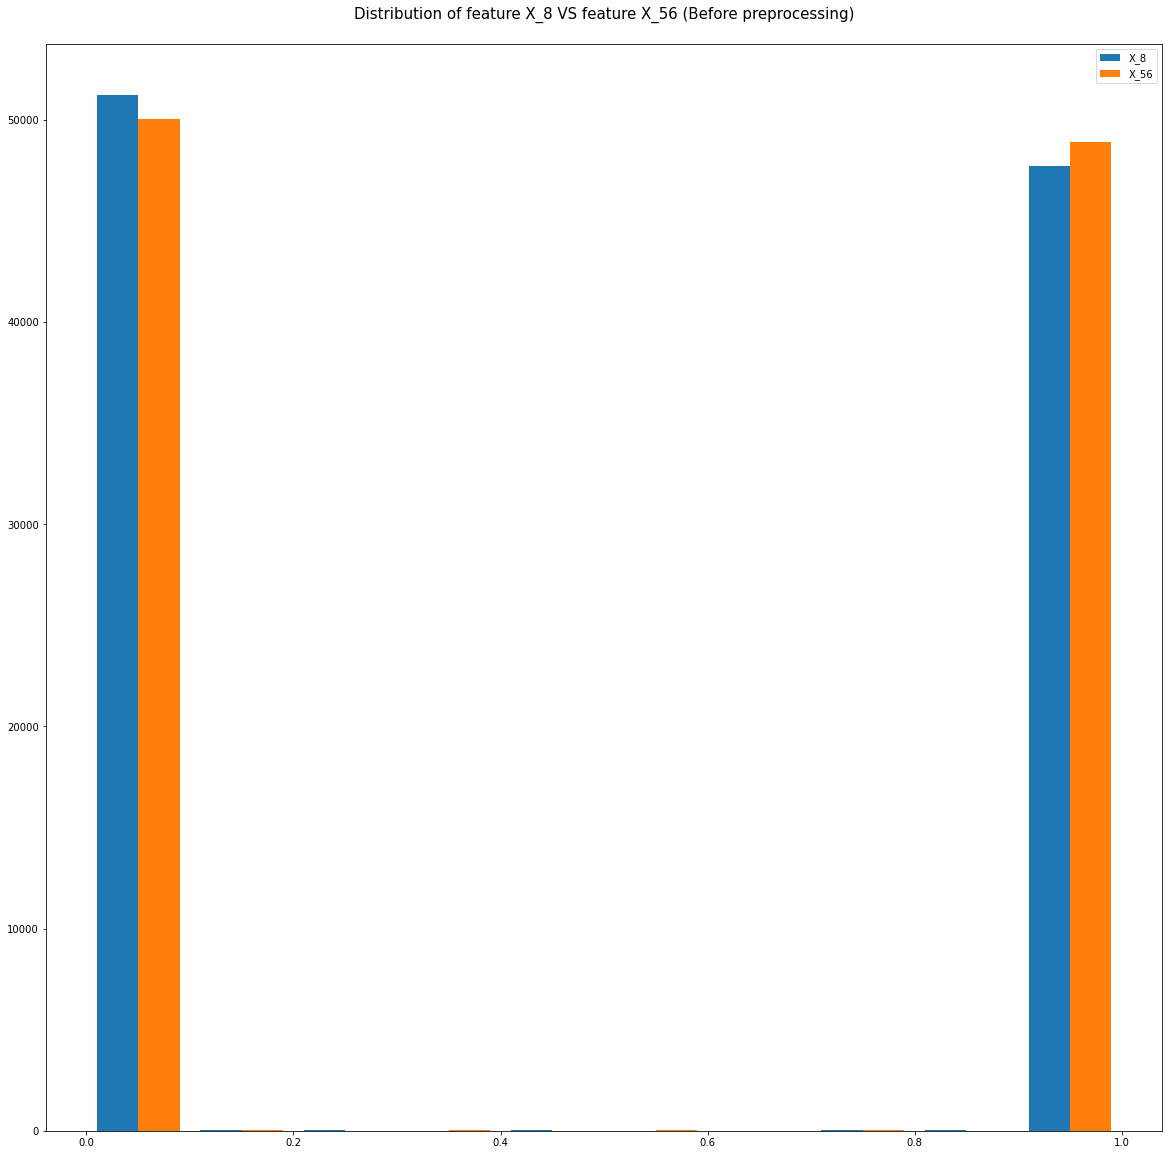

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
plt.hist([test_data_dataframe[8], test_data_dataframe[56]], label = ['X_8', 'X_56'])   
plt.legend(loc='middle')
plt.title("Distribution of feature X_8 VS feature X_56 (Before preprocessing)\n", size = 15)
plt.show()

#### Visualization of the distribution of feature ``X_8``

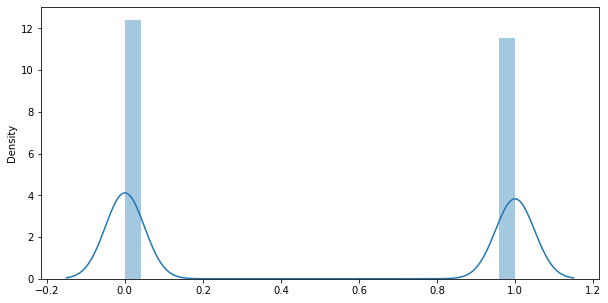

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(test_data_dataframe[[8]])

In [36]:
test_data_dataframe[[8]].value_counts()

8    
0.000    51090
1.000    47542
0.990       43
0.010       31
0.980       18
0.020       17
0.001       15
0.960       14
0.999       12
0.970        9
0.030        9
0.950        8
0.940        5
0.910        5
0.370        5
0.880        5
0.060        5
0.002        5
0.040        5
0.004        5
0.994        5
0.770        5
0.997        5
0.973        4
0.760        4
0.920        4
0.260        4
0.998        4
0.090        4
0.810        4
0.850        4
0.996        4
0.890        4
0.080        4
0.430        3
0.780        3
0.930        3
0.140        3
0.860        3
0.170        3
0.160        3
0.200        3
0.050        3
0.110        3
0.005        3
0.130        3
0.700        3
0.982        2
0.320        2
0.840        2
0.490        2
0.870        2
0.580        2
0.064        2
0.410        2
0.400        2
0.390        2
0.988        2
0.600        2
0.330        2
0.830        2
0.300        2
0.100        2
0.680        2
0.120        2
0.750        2
0.72

#### Visualization of the distribution of feature ``X_56``

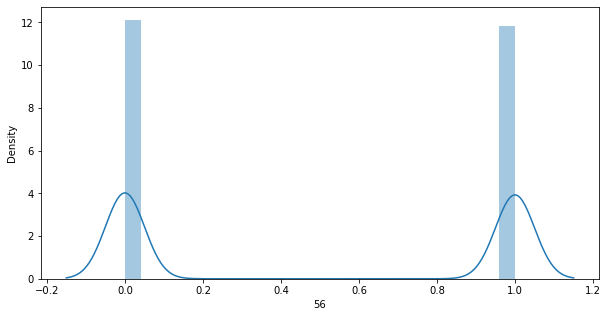

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(test_data_dataframe[56])

In [37]:
test_data_dataframe[[56]].value_counts()

56   
0.000    49930
1.000    48767
0.010       34
0.990       22
0.999       14
0.020       12
0.980       12
0.001       12
0.940       11
0.970       10
0.750        7
0.050        6
0.030        6
0.960        6
0.997        6
0.070        5
0.040        5
0.100        5
0.390        5
0.640        4
0.995        4
0.080        4
0.380        4
0.950        4
0.006        4
0.110        3
0.130        3
0.090        3
0.200        3
0.860        3
0.530        3
0.998        3
0.056        3
0.900        3
0.012        3
0.920        3
0.240        2
0.190        2
0.890        2
0.310        2
0.002        2
0.330        2
0.370        2
0.180        2
0.450        2
0.740        2
0.490        2
0.500        2
0.730        2
0.560        2
0.600        2
0.610        2
0.003        2
0.930        2
0.988        2
0.004        2
0.005        2
0.170        2
0.150        2
0.972        2
0.994        2
0.983        2
0.953        2
0.051        2
0.927        1
0.986        1
0.98

Looking at the bar graph visualization, the distribution of features ``X[8]`` and ``X[56]`` in the test dataset is very similar to the distribution of features ``X[8]`` and ``X[56]`` in the training dataset. Indeed, for both datasets, female individuals seem to be more represented. This phenomenon is found in both datasets (training and test) for these characteristics so the same conclusions can be drawn for both datasets

### Conclusion of exploratory data analysis step

For pre-processing, we performed an extensive analysis of the variables ``X[8]`` and ``X[56]`` of the ``train_data`` dataset. Throughout the analysis, we noticed several interesting phenomenon in the distribution of these features and the labels associated with them. 

If we summarize, first of all the good point is that the gender ratio is not really unbalanced. On the other hand, we could see 2 surprising phenomena with our training dataset. 

- **1st phenomenon**: It turns out that the features ``X[8]`` and ``X[56]`` which are supposed to be binary because they describe a phenomenon that is binary namely the gender of the person which cannot be (Male or female). Since the values are between 0 and 1, we can then deduce that this column assigns probabilities to the gender of the individual 


- **2nd phenomenon**: It also turns out that our training dataset contains templates $Z1$ and $Z2$ which have different values for features ``X[8]`` and ``X[56]`` which means that the person associated with one of the templates is of the opposite gender to the person associated with the other template. This implies that the target variable is set to 0 but we have seen that this is not always the case. 

Therefore, it was advisable to see if these phenomena that we have observed can ben also found in the ``test_data`` dataset (dataset that will be used for the prediction before the submission of the prediction file on the data challenge website). Unfortunately the second phenomenon can't be checked because we don't have access to the label of the test dataset because the goal of a data challenge is to predict these labels. On the other hand it were possible to observe the first phenomenon. 

It turns out that the distribution of the features ``X[8]`` and ``X[56]`` in the test dataset is rather similar to the distribution of the features ``X[8]`` and ``X[56]`` in the training dataset as the distribution of the genders for the features ``X[8]`` and ``X[56]`` in the test dataset are balanced. Morevoer the features ``X[8]`` and ``X[56]`` take different values of 0 and 1. Therefore, I made the choice not to remove the data describing these exceptional cases, so that my model could be robust to these exceptional cases.

### Build several dataset

In the previous dataset, we used 3 different training datasets namely a dataset containing the initial features, a dataset containing the features selected by the feature selection models and finally a dataset containing new features that were generated through linear combinations between the features associated with each template $Z1$ and $Z2$. 

The objective is to build 2 different datasets which are the following: 
- dataset contenant les features initiales => ``dataset_initial_features``
- dataset contenant les novuelles features => ``dataset_enlarged_features``


Contrary to the first version of the Data Challenge, we will not build a dataset containing the features selected by the feature selection models because the experience of the 1st Data Challenge showed us that this dataset provided the worst performance results. Indeed, the dataset containing the new features allowed me to improve the performance of the models for the first data challenge. That's why I chose to re-use this dataset for the second data challenge because I would also like to observe how the models behave with this dataframe on the equity metric. The objective is to see if the creation of new features has an impact on the fairness of the models or not.

#### Build ``dataset_initial_features``

In [10]:
X_dataset_initial_features = X
y_dataset_initial_features = y

#### Build ``dataset_enlarged_features``

In [9]:
# Build X_dataset_enlarged_features
X_dataset_enlarged_features = X_dataframe.copy()

for i in range(X_dataset_enlarged_features.shape[1]):
    col_A = X_dataset_enlarged_features.iloc[:,i]
    col_B = X_dataset_enlarged_features.iloc[:,48+i]
    X_dataset_enlarged_features["col_"+str(i)+"minus_col_"+str(48+i)] = col_A - col_B
    X_dataset_enlarged_features["col_"+str(i)+"plus_col_"+str(48+i)] = col_A + col_B
    X_dataset_enlarged_features["col_"+str(i)+"dot_col_"+str(48+i)] = col_A * col_B

X_dataset_enlarged_features = X_dataset_enlarged_features.to_numpy()    

# Build X_dataset_enlarged_features    
y_dataset_enlarged_features = y


# Build X_test_dataset_enlarged_features
X_test = np.load("test_data.npy")
X_test_enlarged = X_test.copy()
X_test_dataset_enlarged_features =  pd.DataFrame(X_test_enlarged)

for i in range(X_test_dataset_enlarged_features.shape[1]):
    col_A = X_test_dataset_enlarged_features.iloc[:,i]
    col_B = X_test_dataset_enlarged_features.iloc[:,48+i]
    X_test_dataset_enlarged_features["col_"+str(i)+"minus_col_"+str(48+i)] = col_A - col_B
    X_test_dataset_enlarged_features["col_"+str(i)+"plus_col_"+str(48+i)] = col_A + col_B
    X_test_dataset_enlarged_features["col_"+str(i)+"dot_col_"+str(48+i)] = col_A * col_B
    
X_test_dataset_enlarged_features = X_test_dataset_enlarged_features.to_numpy()

#### Define evaluation metrics

In [11]:
def criterion(y_pred, y_true):
    CM = confusion_matrix(y_true, y_pred)
    TN, TP = CM[0, 0], CM[1, 1]
    FP, FN = CM[0, 1], CM[1, 0]
    return 1 - ( FP/(FP + TN) + FN/(FN + TP) )

def fairness_criterion(y_pred, y_true, mask_males, mask_females):
    y_true_male = y_true[mask_males]
    y_true_female = y_true[mask_females]
    y_pred_male = y_pred[mask_males]
    y_pred_female = y_pred[mask_females]

    CM_m = confusion_matrix(y_true_male, y_pred_male)
    TN_m, TP_m = CM_m[0, 0], CM_m[1, 1]
    FP_m, FN_m = CM_m[0, 1], CM_m[1, 0]
    FNR_m = FN_m/(FN_m + TP_m)
    FPR_m = FP_m/(FP_m + TN_m)

    CM_f = confusion_matrix(y_true_female, y_pred_female)
    TN_f, TP_f = CM_f[0, 0], CM_f[1, 1]
    FP_f, FN_f = CM_f[0, 1], CM_f[1, 0]
    FNR_f = FN_f/(FN_f + TP_f)
    FPR_f = FP_f/(FP_f + TN_f)

    if min(FNR_m, FNR_f) == 0:
        if max(FNR_m, FNR_f) == 0:
            BFNR = 1
        else:
            BFNR = np.Infinity
    else:
        BFNR = max(FNR_m, FNR_f) / np.sqrt(FNR_m * FNR_f)

    if min(FPR_m, FPR_f) == 0:
        if max(FPR_m, FPR_f) == 0:
            BFPR = 1
        else:
            BFPR = np.Infinity
    else:
        BFPR = max(FPR_m, FPR_f) / np.sqrt(FPR_m * FPR_f)

    return BFPR, BFNR

## The strategic approach

We already know that the model mentioned in the table below is the model that produced the best performance of the previous data challenge. It may be a good idea to start from this model to further improve the performance of this model jointly on the 2 metrics.

As a reminder, the best model I obtained in the previous data challenge is the following: 

| Model | Feature Engineering | Hard Voting | Soft Voting |Score FNR+FPR rate (Valid test) | 1-(FNR+FPR) (Valid Test) |
|-----------|-----------|-----------|-----------|-----------|-----------|
| XGBoost + LightGBM + CatBoost | Enlarged features | Yes | No | 0.379 | 0.621 |

This model (mentioned in the table above) can be serve as a a starting point and as baseline model. But before to do that I want to know the impact of the different datasets on the fairness metric. We already know that the dataset containing the new features leads to better performance but we also need to see which of these two datasets allow the models to be as fair as possible.

I already know that the ensemble models are the ones that give the best performance results for the 1st data challenge. Moreover, when a voting is applied on several ensemble learning algorithms, it further improves the performance of the model. It remains to be seen how these models behave with respect to the fairness metric.

For that, before applying the voting model with which I had the best performance, I would like to know the performance of ensemble learning algorithms such as ``LightBoost``, ``CatBoost`` on the fairness metric. 

Finally when I know which is the best model, It will then be necessary to perform a fine tuning of the hyperparameters to find the combination of hyperparameters allowing to obtain the best trade off on the 2 metrics (performance ,fairness).

furthemore, after a quick reading some scientific articles about the topic of fair models in machine learning. I selected  several techniques that contribute to improve the fairness performance of a machine learning model. 

One of the first approaches to mitigate unfairness is to perform a feature selection. This means evaluating and identifying the correlation of features that are closely related to the feature indicating the gender of the individual. In our case, this means removing the features ``X[8]`` and ``X[56]`` and all the features correlated to these two features.

2 other techniques are also mentioned in the scientific literature are the following: 

- Regularization during training is one way of adding fairness to machine learning models.

- Optimize for the chosen fairness constraints by adding them to the objective function.

The last approach is more difficult to implement because it requires to modify the objective function of the model. Indeed, the ideal would be to inject in the loss function of the model the performance and fairness metrics and thus train the model to find natively the best trade-off between performance and fairness.
But the problem is that the Fairness and Performance Score metrics are not differentiable and therefore it is not possible to include these metrics in the loss function of the model because it will be difficult to minimize this loss function since optimization algorithms such as gradient descent (1st optimization order) cannot be applied in this case.


The only approach that can be applied in our case is **free gradient optimization**. The goal would be to define a custom metric combined with the use of optimization tools such as ``optuna`` to find the best combination of model hyperparameters.

## 1/ Apply Machine learning algorithms

The objective of this first phase is to test the impact of the different datasets on the fairness metric but also to know the performances of the classical statistical learning models such as ``Random Forest`` and the ensemble learning models such as ``Carboost`` and ``LightGBM``. 

**1/** Apply a classic classification model such as ``Random Forest`` in order to determine the impact of the different datasets on the performance and in particular on the fairness metrics.

**2/** Apply Ensemble learning model and observe the overall performance of the model and in particular on the fairness metric.

**3/** Apply a hard voting classifier that encompass
- 1 very efficient model on the fairness metric 
- 2 efficient models on the performance metric

**4/** Build a custom metric. This custom metric could take the form of a sum of the 2 metrics. This custom metric will be useful to fine tune the model.

### 1/ ``Random Forest`` model

#### 1.1 Apply ``Random Forest `` on the ``dataset_initial_features``

 #### Split data

In [38]:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Build and train the model

In [39]:
models = []
for i in [1, 2, 5, 10]:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train_RF, y_train_RF)   
    models.append(clf)

#### Make predictions

In [40]:
# mask males
mask_males = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 1)
# mask females
mask_females = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 0)

In [41]:
for n, i in enumerate([1, 2, 5, 10]):
    print('RF with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_RF)
    score_valid = criterion(y_pred, y_valid_RF)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_RF, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

RF with 1 estimators
1 - (FPR + FNR) = 0.3568969859382909
Fairness scores: BFPR=1.1824737684867241, BFNR=1.2300880176034608
---------------
RF with 2 estimators
1 - (FPR + FNR) = 0.3663576345335734
Fairness scores: BFPR=1.2194581701860259, BFNR=1.1901557795225726
---------------
RF with 5 estimators
1 - (FPR + FNR) = 0.4787421482066492
Fairness scores: BFPR=1.242472011676704, BFNR=1.3662965046581153
---------------
RF with 10 estimators
1 - (FPR + FNR) = 0.521295940852744
Fairness scores: BFPR=1.3136717862622171, BFNR=1.3921902201826406
---------------


#### 1.3 Apply ``Random Forest `` on the ``dataset_enlarged_features``

#### Split data

In [42]:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_dataset_enlarged_features, y_dataset_enlarged_features, test_size=0.1)

#### Build and train the model

In [43]:
models = []
for i in [1, 2, 5, 10]:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train_RF, y_train_RF)   
    models.append(clf)

#### Make predictions

In [44]:
# mask males
mask_males = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 1)
# mask females
mask_females = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 0)

In [45]:
for n, i in enumerate([1, 2, 5, 10]):
    print('RF with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_RF)
    score_valid = criterion(y_pred, y_valid_RF)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_RF, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

RF with 1 estimators
1 - (FPR + FNR) = 0.38914047278882824
Fairness scores: BFPR=1.1398076900385443, BFNR=1.2955064014405797
---------------
RF with 2 estimators
1 - (FPR + FNR) = 0.4019707182059178
Fairness scores: BFPR=1.2332319044624218, BFNR=1.2464015840119596
---------------
RF with 5 estimators
1 - (FPR + FNR) = 0.49831990756296374
Fairness scores: BFPR=1.194939527166256, BFNR=1.4008936513417014
---------------
RF with 10 estimators
1 - (FPR + FNR) = 0.5457604279778819
Fairness scores: BFPR=1.2703331930330362, BFNR=1.3922107608232686
---------------


### Discussion des résultats

By analyzing the previous results, we can immediately notice that the improvement of the score can degrade the equity measures.

``dataset_initial_features``
> RF with 1 estimators
    1 - (FPR + FNR) = 0.356
    Fairness scores: BFPR=1.182, BFNR=1.230

> RF with 10 estimators
    1 - (FPR + FNR) = 0.521
    Fairness scores: BFPR=1.313, BFNR=1.392
    
Thus we can say that when the model gains in complexity, on the one hand the model becomes more and more efficient but on the other hand it loses in fairness.

<br>

**Performance on the metric $(1 - FPR + FNR)$**: 
- ``dataset_initial_features`` : **0.356** (for ``n_estimators = 1``)
- ``dataset_enlarged_features`` : **0.389** (for ``n_estimator = 1``)


- ``dataset_initial_features`` : **0.521** (for ``n_estimators = 10``)
- ``dataset_enlarged_features`` : **0.545** (for ``n_estimator = 10``)

<br>

**Performance on the metric $(BFNR)$**: 
- ``dataset_initial_features`` : **1.230** (for ``n_estimators = 1``)
- ``dataset_enlarged_features`` : **1.295** (for ``n_estimator = 1``)


- ``dataset_initial_features`` : **1.392** (for ``n_estimators = 10``)
- ``dataset_enlarged_features`` : **1.392** (for ``n_estimator = 10``)

<br>

**Performance on the metric $(BFPR)$**: 
- ``dataset_initial_features`` : **1.182** (for ``n_estimators = 1``)
- ``dataset_enlarged_features`` : **1.139** (for ``n_estimator = 1``)


- ``dataset_initial_features`` : **1.313** (for ``n_estimators = 10``)
- ``dataset_enlarged_features`` : **1.270** (for ``n_estimator = 10``)



We also notice that the training dataset used has a significant influence on the performance of the model and at the opposite a slightly influence on its fairness. Indeed, it is quite clear that the dataset ``dataset_enlarged_features`` containing the new features (features that are linear combinations of the other features) greatly improve the performance of the model without degrading too much the performance of fairness of the model in particular for the **BFPR** fairness metric.


**Conclusion**

It seems that considering the performance gain offered by the enlarged dataset containing the new features that have been generated compared to the potential gain on the fairness metric which remains almost constant. That means that, ``dataset_enlarged_features`` seems to be our best dataset to get the best trade-off between the 2 metrics. It is then necessary to confirm this hypothesis with other machine learning algorithms.

Furthermore, it seems to be clear that the model provides the best trade-off between the performance metric and the fairness metric seems to be the ``Random Forest`` model with a single estimator. Indeed, the gain in terms of performance made by the choice of a higher number of estimators is not profitable because it degrades enormously the fairness of the model.

Undoubtedly, the challenge of this data challenge will be to find the model and the combination of parameters associated with this model that will give the best trade-off between the performance and fairness metrics.

### 2/ Apply Ensemble learning model such as ``LightGBM`` and ``CatBoost``

### Apply ``LightGBM`` on the ``dataset_initial_features``

#### Split data

In [46]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Build and train the model

In [47]:
models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1)
    lgbc.fit(X_train_LGBM, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
2
5
10
50
100
500
1000
2000


#### Make predictions

In [48]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [49]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 2000]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.47167358131599313
Fairness scores: BFPR=1.2140549693981153, BFNR=1.4177484851066318
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.4870025320576197
Fairness scores: BFPR=1.2666140635270808, BFNR=1.4714233311737954
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.5018225585722957
Fairness scores: BFPR=1.3895241849184934, BFNR=1.5367547550847382
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5121263251254342
Fairness scores: BFPR=1.3565275122150673, BFNR=1.5278703420216297
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.567766633726111
Fairness scores: BFPR=1.323238236816926, BFNR=1.4468657595870213
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.5930581712253173
Fairness scores: BFPR=1.2861488120132394, BFNR=1.4339867263315864
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.6122198044686952
Fairness scores: BFPR=1.2555160122251545, BFNR=1.394509

### Apply ``LightGBM `` on the ``dataset_enlarged_features``

#### Split data

In [50]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_enlarged_features, y_dataset_enlarged_features, test_size=0.1)

#### Build and train the model

In [51]:
models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1)
    lgbc.fit(X_train_LGBM, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
2
5
10
50
100
500
1000
2000


#### Make predictions

In [52]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [53]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 2000]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.4814224009497726
Fairness scores: BFPR=1.2471237784320293, BFNR=1.4068912684729193
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.4937298595501959
Fairness scores: BFPR=1.2846923316256327, BFNR=1.4908336338026158
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.5019756889294145
Fairness scores: BFPR=1.3343528394900188, BFNR=1.549369878204609
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5270438632403363
Fairness scores: BFPR=1.3473355721331821, BFNR=1.5321572398153323
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.5867471016707041
Fairness scores: BFPR=1.2885967317723686, BFNR=1.4727016129337342
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.6031903514288323
Fairness scores: BFPR=1.2536799424055014, BFNR=1.4376620017359587
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.6165535174198307
Fairness scores: BFPR=1.2316930856572772, BFNR=1.391518

**Conclusion**

Not surprisingly, the ensemble learning model ``LightGBM`` provides much better performance than the ``Random Forest`` model. 

The hypotheses we have previously made about the impact of the different datasets on the two metrics seem to be confirmed here. Indeed, the dataset ``dataset_enlarged_features`` is the one which gives the best performances on the 2 metrics combined.

Let's continue our search for the best model by trying other ensemble learning models like ``CatBoost``

It is quite clear that the dataset containing the new features allow the model to obtain better performance without however attenuating the equity performance of the model.

### Apply ``CatBoost `` on the ``dataset_enlarged_features``

#### Split data

In [28]:
X_train_CatBoost, X_valid_CatBoost, y_train_CatBoost, y_valid_CatBoost = train_test_split(X_dataset_enlarged_features, y_dataset_enlarged_features, test_size=0.1)

#### Build and train the model

In [29]:
%%time

models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 1500, 2000]:
    print(i)
    # fit model no training data
    catgbc = CatBoostClassifier(eval_metric= 'Logloss', iterations= i, 
                                learning_rate= 0.1, subsample= 0.8)

    catgbc.fit(X_train_CatBoost, y_train_CatBoost, verbose=True)
    models.append(catgbc)

1
0:	learn: 0.6610622	total: 254ms	remaining: 0us
2
0:	learn: 0.6610622	total: 229ms	remaining: 229ms
1:	learn: 0.6361364	total: 494ms	remaining: 0us
5
0:	learn: 0.6610622	total: 244ms	remaining: 976ms
1:	learn: 0.6361364	total: 519ms	remaining: 779ms
2:	learn: 0.6166720	total: 763ms	remaining: 509ms
3:	learn: 0.6005394	total: 1.07s	remaining: 267ms
4:	learn: 0.5855642	total: 1.4s	remaining: 0us
10
0:	learn: 0.6610622	total: 276ms	remaining: 2.48s
1:	learn: 0.6361364	total: 578ms	remaining: 2.31s
2:	learn: 0.6166720	total: 835ms	remaining: 1.95s
3:	learn: 0.6005394	total: 1.17s	remaining: 1.75s
4:	learn: 0.5855642	total: 1.54s	remaining: 1.54s
5:	learn: 0.5736445	total: 1.86s	remaining: 1.24s
6:	learn: 0.5644033	total: 2.19s	remaining: 939ms
7:	learn: 0.5540100	total: 2.53s	remaining: 632ms
8:	learn: 0.5463131	total: 2.79s	remaining: 309ms
9:	learn: 0.5399241	total: 3.06s	remaining: 0us
50
0:	learn: 0.6610622	total: 251ms	remaining: 12.3s
1:	learn: 0.6361364	total: 552ms	remaining: 13.

94:	learn: 0.4348274	total: 31.4s	remaining: 1.65s
95:	learn: 0.4345433	total: 31.7s	remaining: 1.32s
96:	learn: 0.4343214	total: 32s	remaining: 991ms
97:	learn: 0.4340737	total: 32.3s	remaining: 660ms
98:	learn: 0.4336910	total: 32.6s	remaining: 329ms
99:	learn: 0.4334589	total: 32.9s	remaining: 0us
500
0:	learn: 0.6610622	total: 287ms	remaining: 2m 23s
1:	learn: 0.6361364	total: 619ms	remaining: 2m 34s
2:	learn: 0.6166720	total: 925ms	remaining: 2m 33s
3:	learn: 0.6005394	total: 1.33s	remaining: 2m 44s
4:	learn: 0.5855642	total: 1.76s	remaining: 2m 53s
5:	learn: 0.5736445	total: 2.12s	remaining: 2m 54s
6:	learn: 0.5644033	total: 2.46s	remaining: 2m 53s
7:	learn: 0.5540100	total: 2.87s	remaining: 2m 56s
8:	learn: 0.5463131	total: 3.23s	remaining: 2m 56s
9:	learn: 0.5399241	total: 3.54s	remaining: 2m 53s
10:	learn: 0.5344591	total: 3.84s	remaining: 2m 50s
11:	learn: 0.5293395	total: 4.11s	remaining: 2m 47s
12:	learn: 0.5235524	total: 4.49s	remaining: 2m 48s
13:	learn: 0.5190049	total: 

153:	learn: 0.4227581	total: 51.3s	remaining: 1m 55s
154:	learn: 0.4225658	total: 51.7s	remaining: 1m 55s
155:	learn: 0.4224410	total: 52s	remaining: 1m 54s
156:	learn: 0.4222980	total: 52.2s	remaining: 1m 54s
157:	learn: 0.4221114	total: 52.6s	remaining: 1m 53s
158:	learn: 0.4219883	total: 52.9s	remaining: 1m 53s
159:	learn: 0.4218057	total: 53.2s	remaining: 1m 53s
160:	learn: 0.4215931	total: 53.6s	remaining: 1m 52s
161:	learn: 0.4213613	total: 54s	remaining: 1m 52s
162:	learn: 0.4212487	total: 54.3s	remaining: 1m 52s
163:	learn: 0.4211010	total: 54.6s	remaining: 1m 51s
164:	learn: 0.4209990	total: 54.9s	remaining: 1m 51s
165:	learn: 0.4208479	total: 55.2s	remaining: 1m 50s
166:	learn: 0.4207093	total: 55.4s	remaining: 1m 50s
167:	learn: 0.4205846	total: 55.8s	remaining: 1m 50s
168:	learn: 0.4204291	total: 56.1s	remaining: 1m 49s
169:	learn: 0.4202848	total: 56.5s	remaining: 1m 49s
170:	learn: 0.4201355	total: 56.8s	remaining: 1m 49s
171:	learn: 0.4200275	total: 57.2s	remaining: 1m 4

307:	learn: 0.4062195	total: 1m 44s	remaining: 1m 5s
308:	learn: 0.4061262	total: 1m 44s	remaining: 1m 4s
309:	learn: 0.4060345	total: 1m 45s	remaining: 1m 4s
310:	learn: 0.4059623	total: 1m 45s	remaining: 1m 4s
311:	learn: 0.4058744	total: 1m 45s	remaining: 1m 3s
312:	learn: 0.4057990	total: 1m 46s	remaining: 1m 3s
313:	learn: 0.4057039	total: 1m 46s	remaining: 1m 3s
314:	learn: 0.4056148	total: 1m 47s	remaining: 1m 2s
315:	learn: 0.4055597	total: 1m 47s	remaining: 1m 2s
316:	learn: 0.4054894	total: 1m 47s	remaining: 1m 2s
317:	learn: 0.4054095	total: 1m 48s	remaining: 1m 1s
318:	learn: 0.4053466	total: 1m 48s	remaining: 1m 1s
319:	learn: 0.4052724	total: 1m 48s	remaining: 1m 1s
320:	learn: 0.4052196	total: 1m 49s	remaining: 1m
321:	learn: 0.4051414	total: 1m 49s	remaining: 1m
322:	learn: 0.4050660	total: 1m 49s	remaining: 1m
323:	learn: 0.4049851	total: 1m 50s	remaining: 59.8s
324:	learn: 0.4048899	total: 1m 50s	remaining: 59.5s
325:	learn: 0.4048127	total: 1m 50s	remaining: 59.2s
32

463:	learn: 0.3959732	total: 2m 46s	remaining: 12.9s
464:	learn: 0.3959224	total: 2m 46s	remaining: 12.5s
465:	learn: 0.3958642	total: 2m 46s	remaining: 12.2s
466:	learn: 0.3958013	total: 2m 47s	remaining: 11.8s
467:	learn: 0.3957433	total: 2m 47s	remaining: 11.5s
468:	learn: 0.3957074	total: 2m 47s	remaining: 11.1s
469:	learn: 0.3956474	total: 2m 48s	remaining: 10.7s
470:	learn: 0.3955901	total: 2m 48s	remaining: 10.4s
471:	learn: 0.3955548	total: 2m 49s	remaining: 10s
472:	learn: 0.3954913	total: 2m 49s	remaining: 9.68s
473:	learn: 0.3954281	total: 2m 49s	remaining: 9.32s
474:	learn: 0.3953732	total: 2m 50s	remaining: 8.96s
475:	learn: 0.3953151	total: 2m 50s	remaining: 8.61s
476:	learn: 0.3952691	total: 2m 51s	remaining: 8.25s
477:	learn: 0.3952286	total: 2m 51s	remaining: 7.89s
478:	learn: 0.3951665	total: 2m 51s	remaining: 7.54s
479:	learn: 0.3951050	total: 2m 52s	remaining: 7.18s
480:	learn: 0.3950593	total: 2m 52s	remaining: 6.82s
481:	learn: 0.3949971	total: 2m 52s	remaining: 6

121:	learn: 0.4286906	total: 46.2s	remaining: 5m 32s
122:	learn: 0.4285006	total: 46.6s	remaining: 5m 32s
123:	learn: 0.4283092	total: 47.1s	remaining: 5m 33s
124:	learn: 0.4280975	total: 47.5s	remaining: 5m 32s
125:	learn: 0.4279031	total: 47.9s	remaining: 5m 32s
126:	learn: 0.4277254	total: 48.4s	remaining: 5m 32s
127:	learn: 0.4275301	total: 48.9s	remaining: 5m 32s
128:	learn: 0.4273496	total: 49.3s	remaining: 5m 32s
129:	learn: 0.4271643	total: 49.9s	remaining: 5m 33s
130:	learn: 0.4268329	total: 50.3s	remaining: 5m 33s
131:	learn: 0.4266197	total: 50.9s	remaining: 5m 34s
132:	learn: 0.4264476	total: 51.3s	remaining: 5m 34s
133:	learn: 0.4263156	total: 51.6s	remaining: 5m 33s
134:	learn: 0.4261507	total: 52s	remaining: 5m 33s
135:	learn: 0.4260048	total: 52.4s	remaining: 5m 32s
136:	learn: 0.4257850	total: 52.9s	remaining: 5m 33s
137:	learn: 0.4256266	total: 53.3s	remaining: 5m 32s
138:	learn: 0.4254285	total: 53.6s	remaining: 5m 31s
139:	learn: 0.4252641	total: 54.1s	remaining: 5m

275:	learn: 0.4088557	total: 1m 47s	remaining: 4m 41s
276:	learn: 0.4087649	total: 1m 47s	remaining: 4m 40s
277:	learn: 0.4086918	total: 1m 47s	remaining: 4m 40s
278:	learn: 0.4086132	total: 1m 48s	remaining: 4m 39s
279:	learn: 0.4085270	total: 1m 48s	remaining: 4m 39s
280:	learn: 0.4084337	total: 1m 49s	remaining: 4m 39s
281:	learn: 0.4083612	total: 1m 49s	remaining: 4m 38s
282:	learn: 0.4082721	total: 1m 49s	remaining: 4m 38s
283:	learn: 0.4081796	total: 1m 50s	remaining: 4m 38s
284:	learn: 0.4080983	total: 1m 50s	remaining: 4m 37s
285:	learn: 0.4080256	total: 1m 51s	remaining: 4m 37s
286:	learn: 0.4079288	total: 1m 51s	remaining: 4m 36s
287:	learn: 0.4078530	total: 1m 51s	remaining: 4m 36s
288:	learn: 0.4077674	total: 1m 52s	remaining: 4m 35s
289:	learn: 0.4076968	total: 1m 52s	remaining: 4m 35s
290:	learn: 0.4076043	total: 1m 52s	remaining: 4m 34s
291:	learn: 0.4075326	total: 1m 53s	remaining: 4m 34s
292:	learn: 0.4074564	total: 1m 53s	remaining: 4m 33s
293:	learn: 0.4073560	total:

428:	learn: 0.3980281	total: 2m 47s	remaining: 3m 42s
429:	learn: 0.3980095	total: 2m 47s	remaining: 3m 42s
430:	learn: 0.3979468	total: 2m 48s	remaining: 3m 41s
431:	learn: 0.3978922	total: 2m 48s	remaining: 3m 41s
432:	learn: 0.3978269	total: 2m 48s	remaining: 3m 40s
433:	learn: 0.3977587	total: 2m 49s	remaining: 3m 40s
434:	learn: 0.3977019	total: 2m 49s	remaining: 3m 39s
435:	learn: 0.3976255	total: 2m 49s	remaining: 3m 39s
436:	learn: 0.3975591	total: 2m 50s	remaining: 3m 39s
437:	learn: 0.3975121	total: 2m 50s	remaining: 3m 38s
438:	learn: 0.3974224	total: 2m 50s	remaining: 3m 38s
439:	learn: 0.3973679	total: 2m 51s	remaining: 3m 37s
440:	learn: 0.3973085	total: 2m 51s	remaining: 3m 37s
441:	learn: 0.3972645	total: 2m 51s	remaining: 3m 36s
442:	learn: 0.3972027	total: 2m 52s	remaining: 3m 36s
443:	learn: 0.3971419	total: 2m 52s	remaining: 3m 36s
444:	learn: 0.3970788	total: 2m 52s	remaining: 3m 35s
445:	learn: 0.3970278	total: 2m 53s	remaining: 3m 35s
446:	learn: 0.3969821	total:

582:	learn: 0.3893914	total: 3m 35s	remaining: 2m 34s
583:	learn: 0.3893352	total: 3m 35s	remaining: 2m 33s
584:	learn: 0.3892684	total: 3m 35s	remaining: 2m 33s
585:	learn: 0.3892206	total: 3m 36s	remaining: 2m 32s
586:	learn: 0.3891794	total: 3m 36s	remaining: 2m 32s
587:	learn: 0.3891318	total: 3m 37s	remaining: 2m 32s
588:	learn: 0.3890677	total: 3m 37s	remaining: 2m 31s
589:	learn: 0.3890332	total: 3m 37s	remaining: 2m 31s
590:	learn: 0.3889883	total: 3m 37s	remaining: 2m 30s
591:	learn: 0.3889381	total: 3m 38s	remaining: 2m 30s
592:	learn: 0.3888729	total: 3m 38s	remaining: 2m 30s
593:	learn: 0.3888150	total: 3m 39s	remaining: 2m 29s
594:	learn: 0.3887498	total: 3m 39s	remaining: 2m 29s
595:	learn: 0.3886921	total: 3m 39s	remaining: 2m 28s
596:	learn: 0.3886332	total: 3m 40s	remaining: 2m 28s
597:	learn: 0.3885769	total: 3m 40s	remaining: 2m 28s
598:	learn: 0.3885207	total: 3m 40s	remaining: 2m 27s
599:	learn: 0.3884638	total: 3m 41s	remaining: 2m 27s
600:	learn: 0.3884117	total:

736:	learn: 0.3815300	total: 4m 26s	remaining: 1m 35s
737:	learn: 0.3814798	total: 4m 27s	remaining: 1m 34s
738:	learn: 0.3814336	total: 4m 27s	remaining: 1m 34s
739:	learn: 0.3813858	total: 4m 28s	remaining: 1m 34s
740:	learn: 0.3813371	total: 4m 28s	remaining: 1m 33s
741:	learn: 0.3812754	total: 4m 28s	remaining: 1m 33s
742:	learn: 0.3812170	total: 4m 29s	remaining: 1m 33s
743:	learn: 0.3811632	total: 4m 29s	remaining: 1m 32s
744:	learn: 0.3811086	total: 4m 29s	remaining: 1m 32s
745:	learn: 0.3810709	total: 4m 30s	remaining: 1m 31s
746:	learn: 0.3810248	total: 4m 30s	remaining: 1m 31s
747:	learn: 0.3809751	total: 4m 30s	remaining: 1m 31s
748:	learn: 0.3809351	total: 4m 31s	remaining: 1m 30s
749:	learn: 0.3808826	total: 4m 31s	remaining: 1m 30s
750:	learn: 0.3808318	total: 4m 31s	remaining: 1m 30s
751:	learn: 0.3807815	total: 4m 32s	remaining: 1m 29s
752:	learn: 0.3807321	total: 4m 32s	remaining: 1m 29s
753:	learn: 0.3806693	total: 4m 32s	remaining: 1m 29s
754:	learn: 0.3806266	total:

891:	learn: 0.3742208	total: 5m 21s	remaining: 38.9s
892:	learn: 0.3741846	total: 5m 21s	remaining: 38.6s
893:	learn: 0.3741244	total: 5m 22s	remaining: 38.2s
894:	learn: 0.3740759	total: 5m 22s	remaining: 37.8s
895:	learn: 0.3740358	total: 5m 22s	remaining: 37.5s
896:	learn: 0.3739831	total: 5m 23s	remaining: 37.1s
897:	learn: 0.3739460	total: 5m 23s	remaining: 36.7s
898:	learn: 0.3739066	total: 5m 23s	remaining: 36.4s
899:	learn: 0.3738604	total: 5m 24s	remaining: 36s
900:	learn: 0.3738120	total: 5m 24s	remaining: 35.7s
901:	learn: 0.3737672	total: 5m 24s	remaining: 35.3s
902:	learn: 0.3737153	total: 5m 25s	remaining: 34.9s
903:	learn: 0.3736576	total: 5m 25s	remaining: 34.6s
904:	learn: 0.3736012	total: 5m 25s	remaining: 34.2s
905:	learn: 0.3735374	total: 5m 26s	remaining: 33.9s
906:	learn: 0.3734943	total: 5m 26s	remaining: 33.5s
907:	learn: 0.3734436	total: 5m 26s	remaining: 33.1s
908:	learn: 0.3734031	total: 5m 27s	remaining: 32.8s
909:	learn: 0.3733594	total: 5m 27s	remaining: 3

48:	learn: 0.4550376	total: 18.5s	remaining: 9m 7s
49:	learn: 0.4543125	total: 18.8s	remaining: 9m 5s
50:	learn: 0.4536563	total: 19.2s	remaining: 9m 4s
51:	learn: 0.4530137	total: 19.4s	remaining: 8m 59s
52:	learn: 0.4523480	total: 19.6s	remaining: 8m 56s
53:	learn: 0.4517344	total: 20s	remaining: 8m 55s
54:	learn: 0.4509274	total: 20.4s	remaining: 8m 54s
55:	learn: 0.4501513	total: 20.7s	remaining: 8m 54s
56:	learn: 0.4496161	total: 21.1s	remaining: 8m 52s
57:	learn: 0.4490732	total: 21.4s	remaining: 8m 51s
58:	learn: 0.4485202	total: 21.7s	remaining: 8m 51s
59:	learn: 0.4479517	total: 22.1s	remaining: 8m 50s
60:	learn: 0.4473050	total: 22.5s	remaining: 8m 50s
61:	learn: 0.4468863	total: 22.7s	remaining: 8m 47s
62:	learn: 0.4464655	total: 23.1s	remaining: 8m 45s
63:	learn: 0.4459510	total: 23.4s	remaining: 8m 44s
64:	learn: 0.4454094	total: 23.7s	remaining: 8m 42s
65:	learn: 0.4450092	total: 23.9s	remaining: 8m 39s
66:	learn: 0.4444918	total: 24.2s	remaining: 8m 37s
67:	learn: 0.4441

205:	learn: 0.4157555	total: 1m 9s	remaining: 7m 15s
206:	learn: 0.4156545	total: 1m 9s	remaining: 7m 15s
207:	learn: 0.4155661	total: 1m 9s	remaining: 7m 14s
208:	learn: 0.4154721	total: 1m 10s	remaining: 7m 14s
209:	learn: 0.4153530	total: 1m 10s	remaining: 7m 13s
210:	learn: 0.4152488	total: 1m 10s	remaining: 7m 13s
211:	learn: 0.4151057	total: 1m 11s	remaining: 7m 12s
212:	learn: 0.4149898	total: 1m 11s	remaining: 7m 12s
213:	learn: 0.4149096	total: 1m 11s	remaining: 7m 11s
214:	learn: 0.4147738	total: 1m 12s	remaining: 7m 12s
215:	learn: 0.4146593	total: 1m 12s	remaining: 7m 11s
216:	learn: 0.4145533	total: 1m 12s	remaining: 7m 10s
217:	learn: 0.4144351	total: 1m 13s	remaining: 7m 10s
218:	learn: 0.4143278	total: 1m 13s	remaining: 7m 9s
219:	learn: 0.4142023	total: 1m 13s	remaining: 7m 9s
220:	learn: 0.4140953	total: 1m 14s	remaining: 7m 8s
221:	learn: 0.4139847	total: 1m 14s	remaining: 7m 8s
222:	learn: 0.4138469	total: 1m 14s	remaining: 7m 7s
223:	learn: 0.4137253	total: 1m 15s	

358:	learn: 0.4024312	total: 1m 58s	remaining: 6m 17s
359:	learn: 0.4023588	total: 1m 59s	remaining: 6m 17s
360:	learn: 0.4022897	total: 1m 59s	remaining: 6m 16s
361:	learn: 0.4022121	total: 1m 59s	remaining: 6m 16s
362:	learn: 0.4021511	total: 2m	remaining: 6m 16s
363:	learn: 0.4020668	total: 2m	remaining: 6m 16s
364:	learn: 0.4020128	total: 2m 1s	remaining: 6m 16s
365:	learn: 0.4019249	total: 2m 1s	remaining: 6m 16s
366:	learn: 0.4018599	total: 2m 1s	remaining: 6m 15s
367:	learn: 0.4018123	total: 2m 2s	remaining: 6m 15s
368:	learn: 0.4017632	total: 2m 2s	remaining: 6m 15s
369:	learn: 0.4016792	total: 2m 2s	remaining: 6m 15s
370:	learn: 0.4016280	total: 2m 3s	remaining: 6m 14s
371:	learn: 0.4015758	total: 2m 3s	remaining: 6m 14s
372:	learn: 0.4015307	total: 2m 3s	remaining: 6m 14s
373:	learn: 0.4014659	total: 2m 4s	remaining: 6m 14s
374:	learn: 0.4013926	total: 2m 4s	remaining: 6m 13s
375:	learn: 0.4013325	total: 2m 4s	remaining: 6m 13s
376:	learn: 0.4012782	total: 2m 5s	remaining: 6m

512:	learn: 0.3931418	total: 2m 57s	remaining: 5m 41s
513:	learn: 0.3930888	total: 2m 58s	remaining: 5m 41s
514:	learn: 0.3930471	total: 2m 58s	remaining: 5m 41s
515:	learn: 0.3929774	total: 2m 58s	remaining: 5m 41s
516:	learn: 0.3929106	total: 2m 59s	remaining: 5m 41s
517:	learn: 0.3928625	total: 2m 59s	remaining: 5m 40s
518:	learn: 0.3927928	total: 3m	remaining: 5m 40s
519:	learn: 0.3927299	total: 3m	remaining: 5m 39s
520:	learn: 0.3926730	total: 3m	remaining: 5m 39s
521:	learn: 0.3926133	total: 3m 1s	remaining: 5m 39s
522:	learn: 0.3925458	total: 3m 1s	remaining: 5m 39s
523:	learn: 0.3924871	total: 3m 1s	remaining: 5m 38s
524:	learn: 0.3924357	total: 3m 2s	remaining: 5m 38s
525:	learn: 0.3923847	total: 3m 2s	remaining: 5m 38s
526:	learn: 0.3923296	total: 3m 3s	remaining: 5m 38s
527:	learn: 0.3922729	total: 3m 3s	remaining: 5m 37s
528:	learn: 0.3922306	total: 3m 3s	remaining: 5m 37s
529:	learn: 0.3921807	total: 3m 4s	remaining: 5m 36s
530:	learn: 0.3921124	total: 3m 4s	remaining: 5m 

666:	learn: 0.3850122	total: 3m 53s	remaining: 4m 51s
667:	learn: 0.3849717	total: 3m 53s	remaining: 4m 50s
668:	learn: 0.3849328	total: 3m 53s	remaining: 4m 50s
669:	learn: 0.3848883	total: 3m 54s	remaining: 4m 50s
670:	learn: 0.3848276	total: 3m 54s	remaining: 4m 49s
671:	learn: 0.3847772	total: 3m 54s	remaining: 4m 49s
672:	learn: 0.3847175	total: 3m 55s	remaining: 4m 49s
673:	learn: 0.3846610	total: 3m 55s	remaining: 4m 49s
674:	learn: 0.3846052	total: 3m 56s	remaining: 4m 48s
675:	learn: 0.3845516	total: 3m 56s	remaining: 4m 48s
676:	learn: 0.3844998	total: 3m 57s	remaining: 4m 48s
677:	learn: 0.3844515	total: 3m 57s	remaining: 4m 47s
678:	learn: 0.3844018	total: 3m 57s	remaining: 4m 47s
679:	learn: 0.3843427	total: 3m 58s	remaining: 4m 47s
680:	learn: 0.3842842	total: 3m 58s	remaining: 4m 46s
681:	learn: 0.3842242	total: 3m 58s	remaining: 4m 46s
682:	learn: 0.3841655	total: 3m 59s	remaining: 4m 46s
683:	learn: 0.3841223	total: 3m 59s	remaining: 4m 45s
684:	learn: 0.3840728	total:

819:	learn: 0.3775477	total: 4m 50s	remaining: 4m
820:	learn: 0.3774901	total: 4m 50s	remaining: 4m
821:	learn: 0.3774471	total: 4m 51s	remaining: 4m
822:	learn: 0.3774026	total: 4m 51s	remaining: 3m 59s
823:	learn: 0.3773520	total: 4m 51s	remaining: 3m 59s
824:	learn: 0.3773074	total: 4m 52s	remaining: 3m 59s
825:	learn: 0.3772568	total: 4m 52s	remaining: 3m 58s
826:	learn: 0.3772130	total: 4m 53s	remaining: 3m 58s
827:	learn: 0.3771543	total: 4m 53s	remaining: 3m 58s
828:	learn: 0.3771217	total: 4m 53s	remaining: 3m 57s
829:	learn: 0.3770668	total: 4m 54s	remaining: 3m 57s
830:	learn: 0.3770371	total: 4m 54s	remaining: 3m 57s
831:	learn: 0.3769937	total: 4m 55s	remaining: 3m 56s
832:	learn: 0.3769473	total: 4m 55s	remaining: 3m 56s
833:	learn: 0.3769004	total: 4m 56s	remaining: 3m 56s
834:	learn: 0.3768443	total: 4m 56s	remaining: 3m 56s
835:	learn: 0.3767902	total: 4m 56s	remaining: 3m 55s
836:	learn: 0.3767429	total: 4m 57s	remaining: 3m 55s
837:	learn: 0.3766961	total: 4m 57s	rema

972:	learn: 0.3703839	total: 5m 44s	remaining: 3m 6s
973:	learn: 0.3703261	total: 5m 44s	remaining: 3m 6s
974:	learn: 0.3702857	total: 5m 45s	remaining: 3m 5s
975:	learn: 0.3702832	total: 5m 45s	remaining: 3m 5s
976:	learn: 0.3702381	total: 5m 45s	remaining: 3m 5s
977:	learn: 0.3701911	total: 5m 46s	remaining: 3m 4s
978:	learn: 0.3701413	total: 5m 46s	remaining: 3m 4s
979:	learn: 0.3701069	total: 5m 46s	remaining: 3m 4s
980:	learn: 0.3700618	total: 5m 47s	remaining: 3m 3s
981:	learn: 0.3700295	total: 5m 47s	remaining: 3m 3s
982:	learn: 0.3699919	total: 5m 47s	remaining: 3m 2s
983:	learn: 0.3699439	total: 5m 48s	remaining: 3m 2s
984:	learn: 0.3699056	total: 5m 48s	remaining: 3m 2s
985:	learn: 0.3698565	total: 5m 48s	remaining: 3m 1s
986:	learn: 0.3698206	total: 5m 49s	remaining: 3m 1s
987:	learn: 0.3697715	total: 5m 49s	remaining: 3m 1s
988:	learn: 0.3697215	total: 5m 49s	remaining: 3m
989:	learn: 0.3696641	total: 5m 50s	remaining: 3m
990:	learn: 0.3696274	total: 5m 50s	remaining: 2m 59

1123:	learn: 0.3638970	total: 6m 38s	remaining: 2m 13s
1124:	learn: 0.3638511	total: 6m 38s	remaining: 2m 12s
1125:	learn: 0.3637991	total: 6m 39s	remaining: 2m 12s
1126:	learn: 0.3637571	total: 6m 39s	remaining: 2m 12s
1127:	learn: 0.3637094	total: 6m 39s	remaining: 2m 11s
1128:	learn: 0.3636586	total: 6m 40s	remaining: 2m 11s
1129:	learn: 0.3636048	total: 6m 40s	remaining: 2m 11s
1130:	learn: 0.3635708	total: 6m 40s	remaining: 2m 10s
1131:	learn: 0.3635316	total: 6m 41s	remaining: 2m 10s
1132:	learn: 0.3634786	total: 6m 41s	remaining: 2m 10s
1133:	learn: 0.3634305	total: 6m 41s	remaining: 2m 9s
1134:	learn: 0.3633839	total: 6m 42s	remaining: 2m 9s
1135:	learn: 0.3633363	total: 6m 42s	remaining: 2m 8s
1136:	learn: 0.3632936	total: 6m 42s	remaining: 2m 8s
1137:	learn: 0.3632500	total: 6m 43s	remaining: 2m 8s
1138:	learn: 0.3632077	total: 6m 43s	remaining: 2m 7s
1139:	learn: 0.3631676	total: 6m 43s	remaining: 2m 7s
1140:	learn: 0.3631232	total: 6m 44s	remaining: 2m 7s
1141:	learn: 0.363

1274:	learn: 0.3575629	total: 7m 39s	remaining: 1m 21s
1275:	learn: 0.3575279	total: 7m 39s	remaining: 1m 20s
1276:	learn: 0.3574819	total: 7m 40s	remaining: 1m 20s
1277:	learn: 0.3574445	total: 7m 40s	remaining: 1m 20s
1278:	learn: 0.3574057	total: 7m 41s	remaining: 1m 19s
1279:	learn: 0.3573618	total: 7m 41s	remaining: 1m 19s
1280:	learn: 0.3573189	total: 7m 41s	remaining: 1m 18s
1281:	learn: 0.3572869	total: 7m 42s	remaining: 1m 18s
1282:	learn: 0.3572335	total: 7m 42s	remaining: 1m 18s
1283:	learn: 0.3572005	total: 7m 43s	remaining: 1m 17s
1284:	learn: 0.3571542	total: 7m 43s	remaining: 1m 17s
1285:	learn: 0.3571266	total: 7m 43s	remaining: 1m 17s
1286:	learn: 0.3570966	total: 7m 44s	remaining: 1m 16s
1287:	learn: 0.3570504	total: 7m 44s	remaining: 1m 16s
1288:	learn: 0.3570200	total: 7m 44s	remaining: 1m 16s
1289:	learn: 0.3569716	total: 7m 45s	remaining: 1m 15s
1290:	learn: 0.3569703	total: 7m 45s	remaining: 1m 15s
1291:	learn: 0.3569528	total: 7m 45s	remaining: 1m 15s
1292:	lear

1427:	learn: 0.3516410	total: 8m 32s	remaining: 25.8s
1428:	learn: 0.3515995	total: 8m 32s	remaining: 25.5s
1429:	learn: 0.3515625	total: 8m 33s	remaining: 25.1s
1430:	learn: 0.3515270	total: 8m 33s	remaining: 24.8s
1431:	learn: 0.3514979	total: 8m 33s	remaining: 24.4s
1432:	learn: 0.3514596	total: 8m 33s	remaining: 24s
1433:	learn: 0.3514252	total: 8m 34s	remaining: 23.7s
1434:	learn: 0.3513845	total: 8m 34s	remaining: 23.3s
1435:	learn: 0.3513378	total: 8m 34s	remaining: 22.9s
1436:	learn: 0.3512999	total: 8m 35s	remaining: 22.6s
1437:	learn: 0.3512683	total: 8m 35s	remaining: 22.2s
1438:	learn: 0.3512290	total: 8m 35s	remaining: 21.9s
1439:	learn: 0.3511908	total: 8m 35s	remaining: 21.5s
1440:	learn: 0.3511587	total: 8m 36s	remaining: 21.1s
1441:	learn: 0.3511220	total: 8m 36s	remaining: 20.8s
1442:	learn: 0.3510943	total: 8m 36s	remaining: 20.4s
1443:	learn: 0.3510551	total: 8m 37s	remaining: 20.1s
1444:	learn: 0.3510257	total: 8m 37s	remaining: 19.7s
1445:	learn: 0.3509858	total: 

82:	learn: 0.4382792	total: 25.1s	remaining: 9m 40s
83:	learn: 0.4379348	total: 25.5s	remaining: 9m 40s
84:	learn: 0.4375000	total: 25.9s	remaining: 9m 42s
85:	learn: 0.4371726	total: 26.2s	remaining: 9m 43s
86:	learn: 0.4369798	total: 26.4s	remaining: 9m 41s
87:	learn: 0.4366255	total: 26.7s	remaining: 9m 40s
88:	learn: 0.4363459	total: 27s	remaining: 9m 40s
89:	learn: 0.4361192	total: 27.4s	remaining: 9m 40s
90:	learn: 0.4358984	total: 27.7s	remaining: 9m 41s
91:	learn: 0.4356930	total: 27.9s	remaining: 9m 38s
92:	learn: 0.4354698	total: 28.2s	remaining: 9m 38s
93:	learn: 0.4352255	total: 28.5s	remaining: 9m 38s
94:	learn: 0.4348274	total: 28.8s	remaining: 9m 36s
95:	learn: 0.4345433	total: 29.1s	remaining: 9m 37s
96:	learn: 0.4343214	total: 29.5s	remaining: 9m 39s
97:	learn: 0.4340737	total: 29.9s	remaining: 9m 39s
98:	learn: 0.4336910	total: 30.2s	remaining: 9m 39s
99:	learn: 0.4334589	total: 30.6s	remaining: 9m 40s
100:	learn: 0.4331268	total: 31s	remaining: 9m 42s
101:	learn: 0.4

239:	learn: 0.4121493	total: 1m 13s	remaining: 9m 1s
240:	learn: 0.4120766	total: 1m 14s	remaining: 9m
241:	learn: 0.4119851	total: 1m 14s	remaining: 9m
242:	learn: 0.4118925	total: 1m 14s	remaining: 9m
243:	learn: 0.4118186	total: 1m 15s	remaining: 9m
244:	learn: 0.4117352	total: 1m 15s	remaining: 9m
245:	learn: 0.4116362	total: 1m 15s	remaining: 9m
246:	learn: 0.4115552	total: 1m 16s	remaining: 8m 59s
247:	learn: 0.4114478	total: 1m 16s	remaining: 8m 59s
248:	learn: 0.4113197	total: 1m 16s	remaining: 8m 59s
249:	learn: 0.4112453	total: 1m 17s	remaining: 8m 59s
250:	learn: 0.4111363	total: 1m 17s	remaining: 8m 59s
251:	learn: 0.4110123	total: 1m 17s	remaining: 8m 59s
252:	learn: 0.4108987	total: 1m 18s	remaining: 8m 59s
253:	learn: 0.4107872	total: 1m 18s	remaining: 8m 59s
254:	learn: 0.4106906	total: 1m 18s	remaining: 8m 58s
255:	learn: 0.4106051	total: 1m 18s	remaining: 8m 58s
256:	learn: 0.4105167	total: 1m 19s	remaining: 8m 57s
257:	learn: 0.4104612	total: 1m 19s	remaining: 8m 56s

392:	learn: 0.4003053	total: 2m 1s	remaining: 8m 18s
393:	learn: 0.4002487	total: 2m 2s	remaining: 8m 17s
394:	learn: 0.4001821	total: 2m 2s	remaining: 8m 17s
395:	learn: 0.4001090	total: 2m 2s	remaining: 8m 17s
396:	learn: 0.4000495	total: 2m 3s	remaining: 8m 17s
397:	learn: 0.3999734	total: 2m 3s	remaining: 8m 16s
398:	learn: 0.3999138	total: 2m 3s	remaining: 8m 16s
399:	learn: 0.3998599	total: 2m 4s	remaining: 8m 16s
400:	learn: 0.3997955	total: 2m 4s	remaining: 8m 15s
401:	learn: 0.3997453	total: 2m 4s	remaining: 8m 15s
402:	learn: 0.3996808	total: 2m 4s	remaining: 8m 15s
403:	learn: 0.3996041	total: 2m 5s	remaining: 8m 14s
404:	learn: 0.3995418	total: 2m 5s	remaining: 8m 14s
405:	learn: 0.3994751	total: 2m 5s	remaining: 8m 14s
406:	learn: 0.3993988	total: 2m 6s	remaining: 8m 14s
407:	learn: 0.3993531	total: 2m 6s	remaining: 8m 14s
408:	learn: 0.3992683	total: 2m 6s	remaining: 8m 13s
409:	learn: 0.3992123	total: 2m 7s	remaining: 8m 13s
410:	learn: 0.3991478	total: 2m 7s	remaining: 

546:	learn: 0.3912765	total: 2m 53s	remaining: 7m 39s
547:	learn: 0.3912164	total: 2m 53s	remaining: 7m 39s
548:	learn: 0.3911666	total: 2m 53s	remaining: 7m 39s
549:	learn: 0.3911125	total: 2m 54s	remaining: 7m 38s
550:	learn: 0.3910515	total: 2m 54s	remaining: 7m 38s
551:	learn: 0.3910095	total: 2m 54s	remaining: 7m 38s
552:	learn: 0.3909595	total: 2m 55s	remaining: 7m 37s
553:	learn: 0.3909161	total: 2m 55s	remaining: 7m 37s
554:	learn: 0.3908609	total: 2m 55s	remaining: 7m 37s
555:	learn: 0.3908587	total: 2m 55s	remaining: 7m 36s
556:	learn: 0.3908033	total: 2m 56s	remaining: 7m 36s
557:	learn: 0.3907524	total: 2m 56s	remaining: 7m 36s
558:	learn: 0.3907076	total: 2m 56s	remaining: 7m 35s
559:	learn: 0.3906438	total: 2m 57s	remaining: 7m 35s
560:	learn: 0.3906021	total: 2m 57s	remaining: 7m 35s
561:	learn: 0.3905339	total: 2m 57s	remaining: 7m 35s
562:	learn: 0.3904908	total: 2m 58s	remaining: 7m 34s
563:	learn: 0.3904383	total: 2m 58s	remaining: 7m 34s
564:	learn: 0.3903789	total:

700:	learn: 0.3832894	total: 3m 46s	remaining: 6m 58s
701:	learn: 0.3832448	total: 3m 46s	remaining: 6m 58s
702:	learn: 0.3831862	total: 3m 46s	remaining: 6m 58s
703:	learn: 0.3831396	total: 3m 47s	remaining: 6m 57s
704:	learn: 0.3830965	total: 3m 47s	remaining: 6m 57s
705:	learn: 0.3830419	total: 3m 47s	remaining: 6m 57s
706:	learn: 0.3829882	total: 3m 48s	remaining: 6m 57s
707:	learn: 0.3829516	total: 3m 48s	remaining: 6m 56s
708:	learn: 0.3829179	total: 3m 48s	remaining: 6m 56s
709:	learn: 0.3828403	total: 3m 49s	remaining: 6m 56s
710:	learn: 0.3827974	total: 3m 49s	remaining: 6m 55s
711:	learn: 0.3827387	total: 3m 49s	remaining: 6m 55s
712:	learn: 0.3826953	total: 3m 50s	remaining: 6m 55s
713:	learn: 0.3826335	total: 3m 50s	remaining: 6m 55s
714:	learn: 0.3826029	total: 3m 50s	remaining: 6m 54s
715:	learn: 0.3825643	total: 3m 51s	remaining: 6m 54s
716:	learn: 0.3825299	total: 3m 51s	remaining: 6m 54s
717:	learn: 0.3824765	total: 3m 51s	remaining: 6m 53s
718:	learn: 0.3824375	total:

853:	learn: 0.3758741	total: 4m 41s	remaining: 6m 17s
854:	learn: 0.3758120	total: 4m 41s	remaining: 6m 17s
855:	learn: 0.3757586	total: 4m 42s	remaining: 6m 17s
856:	learn: 0.3757293	total: 4m 42s	remaining: 6m 16s
857:	learn: 0.3756813	total: 4m 42s	remaining: 6m 16s
858:	learn: 0.3756312	total: 4m 43s	remaining: 6m 16s
859:	learn: 0.3755808	total: 4m 43s	remaining: 6m 15s
860:	learn: 0.3755319	total: 4m 43s	remaining: 6m 15s
861:	learn: 0.3754711	total: 4m 44s	remaining: 6m 15s
862:	learn: 0.3754376	total: 4m 44s	remaining: 6m 14s
863:	learn: 0.3753991	total: 4m 44s	remaining: 6m 14s
864:	learn: 0.3753596	total: 4m 45s	remaining: 6m 14s
865:	learn: 0.3753141	total: 4m 45s	remaining: 6m 14s
866:	learn: 0.3752751	total: 4m 45s	remaining: 6m 13s
867:	learn: 0.3752292	total: 4m 46s	remaining: 6m 13s
868:	learn: 0.3751920	total: 4m 46s	remaining: 6m 13s
869:	learn: 0.3751576	total: 4m 46s	remaining: 6m 12s
870:	learn: 0.3751045	total: 4m 47s	remaining: 6m 12s
871:	learn: 0.3750594	total:

1007:	learn: 0.3688374	total: 5m 34s	remaining: 5m 29s
1008:	learn: 0.3687967	total: 5m 35s	remaining: 5m 29s
1009:	learn: 0.3687491	total: 5m 35s	remaining: 5m 28s
1010:	learn: 0.3687012	total: 5m 35s	remaining: 5m 28s
1011:	learn: 0.3686686	total: 5m 36s	remaining: 5m 28s
1012:	learn: 0.3686206	total: 5m 36s	remaining: 5m 28s
1013:	learn: 0.3685870	total: 5m 37s	remaining: 5m 27s
1014:	learn: 0.3685333	total: 5m 37s	remaining: 5m 27s
1015:	learn: 0.3684894	total: 5m 37s	remaining: 5m 27s
1016:	learn: 0.3684702	total: 5m 38s	remaining: 5m 26s
1017:	learn: 0.3684248	total: 5m 38s	remaining: 5m 26s
1018:	learn: 0.3683844	total: 5m 38s	remaining: 5m 26s
1019:	learn: 0.3683391	total: 5m 39s	remaining: 5m 25s
1020:	learn: 0.3682942	total: 5m 39s	remaining: 5m 25s
1021:	learn: 0.3682549	total: 5m 39s	remaining: 5m 25s
1022:	learn: 0.3682207	total: 5m 40s	remaining: 5m 24s
1023:	learn: 0.3681825	total: 5m 40s	remaining: 5m 24s
1024:	learn: 0.3681352	total: 5m 40s	remaining: 5m 24s
1025:	lear

1158:	learn: 0.3623890	total: 6m 26s	remaining: 4m 40s
1159:	learn: 0.3623512	total: 6m 26s	remaining: 4m 40s
1160:	learn: 0.3623146	total: 6m 27s	remaining: 4m 39s
1161:	learn: 0.3622754	total: 6m 27s	remaining: 4m 39s
1162:	learn: 0.3622279	total: 6m 27s	remaining: 4m 39s
1163:	learn: 0.3621847	total: 6m 28s	remaining: 4m 38s
1164:	learn: 0.3621533	total: 6m 28s	remaining: 4m 38s
1165:	learn: 0.3621033	total: 6m 28s	remaining: 4m 38s
1166:	learn: 0.3620552	total: 6m 29s	remaining: 4m 37s
1167:	learn: 0.3620100	total: 6m 29s	remaining: 4m 37s
1168:	learn: 0.3619642	total: 6m 30s	remaining: 4m 37s
1169:	learn: 0.3619195	total: 6m 30s	remaining: 4m 37s
1170:	learn: 0.3618772	total: 6m 31s	remaining: 4m 36s
1171:	learn: 0.3618310	total: 6m 31s	remaining: 4m 36s
1172:	learn: 0.3617837	total: 6m 32s	remaining: 4m 36s
1173:	learn: 0.3617383	total: 6m 32s	remaining: 4m 36s
1174:	learn: 0.3616914	total: 6m 33s	remaining: 4m 36s
1175:	learn: 0.3616330	total: 6m 33s	remaining: 4m 35s
1176:	lear

1309:	learn: 0.3562863	total: 7m 20s	remaining: 3m 51s
1310:	learn: 0.3562406	total: 7m 20s	remaining: 3m 51s
1311:	learn: 0.3562007	total: 7m 21s	remaining: 3m 51s
1312:	learn: 0.3561607	total: 7m 21s	remaining: 3m 51s
1313:	learn: 0.3561239	total: 7m 21s	remaining: 3m 50s
1314:	learn: 0.3560818	total: 7m 22s	remaining: 3m 50s
1315:	learn: 0.3560395	total: 7m 22s	remaining: 3m 49s
1316:	learn: 0.3559993	total: 7m 22s	remaining: 3m 49s
1317:	learn: 0.3559643	total: 7m 23s	remaining: 3m 49s
1318:	learn: 0.3559214	total: 7m 23s	remaining: 3m 49s
1319:	learn: 0.3558764	total: 7m 24s	remaining: 3m 48s
1320:	learn: 0.3558302	total: 7m 24s	remaining: 3m 48s
1321:	learn: 0.3557810	total: 7m 24s	remaining: 3m 48s
1322:	learn: 0.3557317	total: 7m 25s	remaining: 3m 47s
1323:	learn: 0.3556982	total: 7m 25s	remaining: 3m 47s
1324:	learn: 0.3556508	total: 7m 25s	remaining: 3m 47s
1325:	learn: 0.3556196	total: 7m 26s	remaining: 3m 46s
1326:	learn: 0.3555796	total: 7m 26s	remaining: 3m 46s
1327:	lear

1459:	learn: 0.3504528	total: 8m 16s	remaining: 3m 3s
1460:	learn: 0.3504108	total: 8m 16s	remaining: 3m 3s
1461:	learn: 0.3503627	total: 8m 17s	remaining: 3m 3s
1462:	learn: 0.3503277	total: 8m 17s	remaining: 3m 2s
1463:	learn: 0.3502943	total: 8m 18s	remaining: 3m 2s
1464:	learn: 0.3502584	total: 8m 18s	remaining: 3m 2s
1465:	learn: 0.3502153	total: 8m 18s	remaining: 3m 1s
1466:	learn: 0.3501833	total: 8m 19s	remaining: 3m 1s
1467:	learn: 0.3501546	total: 8m 19s	remaining: 3m 1s
1468:	learn: 0.3501176	total: 8m 19s	remaining: 3m
1469:	learn: 0.3500803	total: 8m 20s	remaining: 3m
1470:	learn: 0.3500494	total: 8m 20s	remaining: 3m
1471:	learn: 0.3500161	total: 8m 21s	remaining: 2m 59s
1472:	learn: 0.3499715	total: 8m 21s	remaining: 2m 59s
1473:	learn: 0.3499426	total: 8m 21s	remaining: 2m 59s
1474:	learn: 0.3498942	total: 8m 22s	remaining: 2m 58s
1475:	learn: 0.3498588	total: 8m 22s	remaining: 2m 58s
1476:	learn: 0.3498133	total: 8m 22s	remaining: 2m 58s
1477:	learn: 0.3497665	total: 8

1609:	learn: 0.3447267	total: 9m 7s	remaining: 2m 12s
1610:	learn: 0.3446862	total: 9m 7s	remaining: 2m 12s
1611:	learn: 0.3446476	total: 9m 7s	remaining: 2m 11s
1612:	learn: 0.3446018	total: 9m 7s	remaining: 2m 11s
1613:	learn: 0.3445612	total: 9m 8s	remaining: 2m 11s
1614:	learn: 0.3445292	total: 9m 8s	remaining: 2m 10s
1615:	learn: 0.3444829	total: 9m 8s	remaining: 2m 10s
1616:	learn: 0.3444524	total: 9m 9s	remaining: 2m 10s
1617:	learn: 0.3444181	total: 9m 9s	remaining: 2m 9s
1618:	learn: 0.3443914	total: 9m 9s	remaining: 2m 9s
1619:	learn: 0.3443523	total: 9m 9s	remaining: 2m 8s
1620:	learn: 0.3443192	total: 9m 10s	remaining: 2m 8s
1621:	learn: 0.3442737	total: 9m 10s	remaining: 2m 8s
1622:	learn: 0.3442452	total: 9m 10s	remaining: 2m 7s
1623:	learn: 0.3442057	total: 9m 11s	remaining: 2m 7s
1624:	learn: 0.3441650	total: 9m 11s	remaining: 2m 7s
1625:	learn: 0.3441328	total: 9m 11s	remaining: 2m 6s
1626:	learn: 0.3440818	total: 9m 11s	remaining: 2m 6s
1627:	learn: 0.3440387	total: 9

1759:	learn: 0.3391585	total: 9m 55s	remaining: 1m 21s
1760:	learn: 0.3391327	total: 9m 55s	remaining: 1m 20s
1761:	learn: 0.3391000	total: 9m 55s	remaining: 1m 20s
1762:	learn: 0.3390685	total: 9m 56s	remaining: 1m 20s
1763:	learn: 0.3390233	total: 9m 56s	remaining: 1m 19s
1764:	learn: 0.3389819	total: 9m 56s	remaining: 1m 19s
1765:	learn: 0.3389502	total: 9m 57s	remaining: 1m 19s
1766:	learn: 0.3389198	total: 9m 57s	remaining: 1m 18s
1767:	learn: 0.3388836	total: 9m 57s	remaining: 1m 18s
1768:	learn: 0.3388379	total: 9m 58s	remaining: 1m 18s
1769:	learn: 0.3388126	total: 9m 58s	remaining: 1m 17s
1770:	learn: 0.3387682	total: 9m 58s	remaining: 1m 17s
1771:	learn: 0.3387376	total: 9m 58s	remaining: 1m 17s
1772:	learn: 0.3387084	total: 9m 59s	remaining: 1m 16s
1773:	learn: 0.3386757	total: 9m 59s	remaining: 1m 16s
1774:	learn: 0.3386475	total: 10m	remaining: 1m 16s
1775:	learn: 0.3386127	total: 10m	remaining: 1m 15s
1776:	learn: 0.3385611	total: 10m	remaining: 1m 15s
1777:	learn: 0.3385

1909:	learn: 0.3338078	total: 10m 48s	remaining: 30.6s
1910:	learn: 0.3337739	total: 10m 48s	remaining: 30.2s
1911:	learn: 0.3337398	total: 10m 49s	remaining: 29.9s
1912:	learn: 0.3336893	total: 10m 49s	remaining: 29.6s
1913:	learn: 0.3336448	total: 10m 50s	remaining: 29.2s
1914:	learn: 0.3336130	total: 10m 50s	remaining: 28.9s
1915:	learn: 0.3335737	total: 10m 50s	remaining: 28.5s
1916:	learn: 0.3335333	total: 10m 51s	remaining: 28.2s
1917:	learn: 0.3334919	total: 10m 51s	remaining: 27.9s
1918:	learn: 0.3334523	total: 10m 52s	remaining: 27.5s
1919:	learn: 0.3334127	total: 10m 52s	remaining: 27.2s
1920:	learn: 0.3333853	total: 10m 52s	remaining: 26.8s
1921:	learn: 0.3333586	total: 10m 53s	remaining: 26.5s
1922:	learn: 0.3333238	total: 10m 53s	remaining: 26.2s
1923:	learn: 0.3332854	total: 10m 53s	remaining: 25.8s
1924:	learn: 0.3332445	total: 10m 54s	remaining: 25.5s
1925:	learn: 0.3332092	total: 10m 54s	remaining: 25.1s
1926:	learn: 0.3331743	total: 10m 54s	remaining: 24.8s
1927:	lear

#### Make predictions

In [30]:
# mask males
mask_males = (X_valid_CatBoost[:,8] == X_valid_CatBoost[:,56]) & (X_valid_CatBoost[:,8] == 1)
# mask females
mask_females = (X_valid_CatBoost[:,8] == X_valid_CatBoost[:,56]) & (X_valid_CatBoost[:,8] == 0)

In [31]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 1500, 2000]):
    print('CatBoost with {} iterations'.format(i))
    y_pred = models[n].predict(X_valid_CatBoost)
    score_valid = criterion(y_pred, y_valid_CatBoost)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_CatBoost, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

CatBoost with 1 iterations
1 - (FPR + FNR) = 0.4596838030290995
Fairness scores: BFPR=1.397735794637244, BFNR=1.540071896675638
---------------
CatBoost with 2 iterations
1 - (FPR + FNR) = 0.4653083266473028
Fairness scores: BFPR=1.4432525626724704, BFNR=1.553858087245604
---------------
CatBoost with 5 iterations
1 - (FPR + FNR) = 0.4804177045077017
Fairness scores: BFPR=1.4439908953445069, BFNR=1.6099606559886057
---------------
CatBoost with 10 iterations
1 - (FPR + FNR) = 0.5015454673806411
Fairness scores: BFPR=1.4257043477444598, BFNR=1.6392241789313557
---------------
CatBoost with 50 iterations
1 - (FPR + FNR) = 0.5761100551824737
Fairness scores: BFPR=1.3707166575871619, BFNR=1.5612381770917647
---------------
CatBoost with 100 iterations
1 - (FPR + FNR) = 0.5928063918051839
Fairness scores: BFPR=1.2973791489421485, BFNR=1.4917318135623985
---------------
CatBoost with 500 iterations
1 - (FPR + FNR) = 0.6198004461257306
Fairness scores: BFPR=1.2315108260392964, BFNR=1.42645943

#### Discussion on the results

We can draw the same conclusions as those we made concerning the results of the ``Random Forest`` model, namely, the more the model gains in complexity, the more the model is performing but the less it is fair concerning the gender of the person.

Also we notice that the $BFNR$ rate is higher than the $BFPR$ rate. 

However, beyond **10 iterations**, the model tends to become more and more efficient on the fairness metric while also becoming more efficient on its predictions until it remains stable beyond **1000 iterations**.

### 3/ Apply VotingClassifer{``LightGBM`` + ``CatBoost`` + ``RandomForest``} 

#### Combine 1 efficient model  on the fairness metric such as a simple ``Random Forest`` and 2 models efficient on the performance metric {``LightGBM``, ``CatBoost``}

#### Apply VotingClassifier {``LightGBM``, ``CatBoost``, ``Random Forest``} on ``dataset_enlarged_features``

#### Split data

In [45]:
X_train_voting, X_valid_voting, y_train_voting, y_valid_voting = train_test_split(X_dataset_enlarged_features, y_dataset_enlarged_features, test_size=0.1, random_state=57)

#### Build and train the model

In [46]:
%%time

estimators = [
    ('rf', RandomForestClassifier(n_estimators = 1, criterion = 'gini')),
    
    ('lgbc', LGBMClassifier(objective= 'binary', 
                            n_estimators = 2000, random_state=57)),
    
    ('catgbc', CatBoostClassifier(eval_metric= 'Logloss', iterations= 1500, 
                                  learning_rate= 0.1, subsample= 0.8, random_state=57))
]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

voting_clf.fit(X_train_voting, y_train_voting)

0:	learn: 0.6612666	total: 528ms	remaining: 13m 11s
1:	learn: 0.6366487	total: 899ms	remaining: 11m 13s
2:	learn: 0.6153863	total: 1.48s	remaining: 12m 17s
3:	learn: 0.5988612	total: 1.89s	remaining: 11m 48s
4:	learn: 0.5840566	total: 2.37s	remaining: 11m 48s
5:	learn: 0.5724780	total: 2.73s	remaining: 11m 19s
6:	learn: 0.5626343	total: 3.1s	remaining: 11m
7:	learn: 0.5544125	total: 3.58s	remaining: 11m 8s
8:	learn: 0.5461391	total: 4.02s	remaining: 11m 6s
9:	learn: 0.5388800	total: 4.42s	remaining: 10m 59s
10:	learn: 0.5330785	total: 4.8s	remaining: 10m 49s
11:	learn: 0.5280637	total: 5.17s	remaining: 10m 40s
12:	learn: 0.5236756	total: 5.53s	remaining: 10m 32s
13:	learn: 0.5189448	total: 5.96s	remaining: 10m 32s
14:	learn: 0.5143119	total: 6.41s	remaining: 10m 34s
15:	learn: 0.5107892	total: 6.68s	remaining: 10m 19s
16:	learn: 0.5066244	total: 7.19s	remaining: 10m 27s
17:	learn: 0.5034613	total: 7.58s	remaining: 10m 23s
18:	learn: 0.5000214	total: 8.03s	remaining: 10m 25s
19:	learn: 

158:	learn: 0.4211890	total: 54s	remaining: 7m 35s
159:	learn: 0.4210683	total: 54.3s	remaining: 7m 34s
160:	learn: 0.4208713	total: 54.6s	remaining: 7m 34s
161:	learn: 0.4207288	total: 54.9s	remaining: 7m 33s
162:	learn: 0.4206208	total: 55.1s	remaining: 7m 32s
163:	learn: 0.4204645	total: 55.5s	remaining: 7m 31s
164:	learn: 0.4203109	total: 55.7s	remaining: 7m 30s
165:	learn: 0.4201621	total: 56.1s	remaining: 7m 30s
166:	learn: 0.4200289	total: 56.4s	remaining: 7m 30s
167:	learn: 0.4198634	total: 56.9s	remaining: 7m 30s
168:	learn: 0.4197136	total: 57.2s	remaining: 7m 30s
169:	learn: 0.4196051	total: 57.5s	remaining: 7m 30s
170:	learn: 0.4194567	total: 58s	remaining: 7m 30s
171:	learn: 0.4192915	total: 58.4s	remaining: 7m 30s
172:	learn: 0.4191410	total: 58.8s	remaining: 7m 30s
173:	learn: 0.4190378	total: 59.1s	remaining: 7m 30s
174:	learn: 0.4189048	total: 59.4s	remaining: 7m 29s
175:	learn: 0.4187891	total: 59.7s	remaining: 7m 28s
176:	learn: 0.4186198	total: 1m	remaining: 7m 28s


312:	learn: 0.4055002	total: 1m 43s	remaining: 6m 33s
313:	learn: 0.4054229	total: 1m 44s	remaining: 6m 33s
314:	learn: 0.4053445	total: 1m 44s	remaining: 6m 32s
315:	learn: 0.4052932	total: 1m 44s	remaining: 6m 32s
316:	learn: 0.4051994	total: 1m 45s	remaining: 6m 31s
317:	learn: 0.4051160	total: 1m 45s	remaining: 6m 31s
318:	learn: 0.4050295	total: 1m 45s	remaining: 6m 31s
319:	learn: 0.4049625	total: 1m 46s	remaining: 6m 30s
320:	learn: 0.4048931	total: 1m 46s	remaining: 6m 30s
321:	learn: 0.4048346	total: 1m 46s	remaining: 6m 30s
322:	learn: 0.4047748	total: 1m 46s	remaining: 6m 29s
323:	learn: 0.4046890	total: 1m 47s	remaining: 6m 29s
324:	learn: 0.4046039	total: 1m 47s	remaining: 6m 28s
325:	learn: 0.4045317	total: 1m 47s	remaining: 6m 28s
326:	learn: 0.4044584	total: 1m 48s	remaining: 6m 28s
327:	learn: 0.4043900	total: 1m 48s	remaining: 6m 27s
328:	learn: 0.4043326	total: 1m 48s	remaining: 6m 27s
329:	learn: 0.4042686	total: 1m 49s	remaining: 6m 27s
330:	learn: 0.4041996	total:

466:	learn: 0.3955720	total: 2m 37s	remaining: 5m 47s
467:	learn: 0.3955042	total: 2m 37s	remaining: 5m 47s
468:	learn: 0.3954461	total: 2m 37s	remaining: 5m 47s
469:	learn: 0.3953806	total: 2m 38s	remaining: 5m 46s
470:	learn: 0.3953260	total: 2m 38s	remaining: 5m 46s
471:	learn: 0.3952742	total: 2m 38s	remaining: 5m 46s
472:	learn: 0.3952034	total: 2m 39s	remaining: 5m 45s
473:	learn: 0.3951482	total: 2m 39s	remaining: 5m 45s
474:	learn: 0.3951023	total: 2m 40s	remaining: 5m 45s
475:	learn: 0.3950620	total: 2m 40s	remaining: 5m 44s
476:	learn: 0.3950095	total: 2m 40s	remaining: 5m 44s
477:	learn: 0.3949315	total: 2m 41s	remaining: 5m 44s
478:	learn: 0.3948722	total: 2m 41s	remaining: 5m 44s
479:	learn: 0.3948105	total: 2m 41s	remaining: 5m 43s
480:	learn: 0.3947576	total: 2m 42s	remaining: 5m 43s
481:	learn: 0.3947167	total: 2m 42s	remaining: 5m 42s
482:	learn: 0.3946499	total: 2m 42s	remaining: 5m 42s
483:	learn: 0.3945824	total: 2m 43s	remaining: 5m 42s
484:	learn: 0.3945111	total:

620:	learn: 0.3871948	total: 3m 29s	remaining: 4m 56s
621:	learn: 0.3871354	total: 3m 29s	remaining: 4m 56s
622:	learn: 0.3870891	total: 3m 30s	remaining: 4m 56s
623:	learn: 0.3870443	total: 3m 30s	remaining: 4m 55s
624:	learn: 0.3870077	total: 3m 31s	remaining: 4m 55s
625:	learn: 0.3869610	total: 3m 31s	remaining: 4m 55s
626:	learn: 0.3869208	total: 3m 31s	remaining: 4m 54s
627:	learn: 0.3868608	total: 3m 32s	remaining: 4m 54s
628:	learn: 0.3868063	total: 3m 32s	remaining: 4m 54s
629:	learn: 0.3867622	total: 3m 32s	remaining: 4m 54s
630:	learn: 0.3867087	total: 3m 33s	remaining: 4m 53s
631:	learn: 0.3866593	total: 3m 33s	remaining: 4m 53s
632:	learn: 0.3866128	total: 3m 34s	remaining: 4m 53s
633:	learn: 0.3865692	total: 3m 34s	remaining: 4m 52s
634:	learn: 0.3865074	total: 3m 34s	remaining: 4m 52s
635:	learn: 0.3864497	total: 3m 35s	remaining: 4m 52s
636:	learn: 0.3863950	total: 3m 35s	remaining: 4m 51s
637:	learn: 0.3863352	total: 3m 35s	remaining: 4m 51s
638:	learn: 0.3862984	total:

773:	learn: 0.3797022	total: 4m 25s	remaining: 4m 9s
774:	learn: 0.3796553	total: 4m 26s	remaining: 4m 9s
775:	learn: 0.3796144	total: 4m 26s	remaining: 4m 8s
776:	learn: 0.3795632	total: 4m 26s	remaining: 4m 8s
777:	learn: 0.3795197	total: 4m 27s	remaining: 4m 7s
778:	learn: 0.3794681	total: 4m 27s	remaining: 4m 7s
779:	learn: 0.3794411	total: 4m 27s	remaining: 4m 7s
780:	learn: 0.3794003	total: 4m 28s	remaining: 4m 6s
781:	learn: 0.3793289	total: 4m 28s	remaining: 4m 6s
782:	learn: 0.3792788	total: 4m 28s	remaining: 4m 6s
783:	learn: 0.3792289	total: 4m 29s	remaining: 4m 5s
784:	learn: 0.3791852	total: 4m 29s	remaining: 4m 5s
785:	learn: 0.3791830	total: 4m 29s	remaining: 4m 5s
786:	learn: 0.3791271	total: 4m 30s	remaining: 4m 4s
787:	learn: 0.3790838	total: 4m 30s	remaining: 4m 4s
788:	learn: 0.3790238	total: 4m 30s	remaining: 4m 4s
789:	learn: 0.3789808	total: 4m 31s	remaining: 4m 3s
790:	learn: 0.3789298	total: 4m 31s	remaining: 4m 3s
791:	learn: 0.3788725	total: 4m 32s	remaining:

927:	learn: 0.3726748	total: 5m 15s	remaining: 3m 14s
928:	learn: 0.3726430	total: 5m 15s	remaining: 3m 13s
929:	learn: 0.3725988	total: 5m 15s	remaining: 3m 13s
930:	learn: 0.3725624	total: 5m 15s	remaining: 3m 13s
931:	learn: 0.3725222	total: 5m 16s	remaining: 3m 12s
932:	learn: 0.3724653	total: 5m 16s	remaining: 3m 12s
933:	learn: 0.3724180	total: 5m 16s	remaining: 3m 12s
934:	learn: 0.3723688	total: 5m 17s	remaining: 3m 11s
935:	learn: 0.3723239	total: 5m 17s	remaining: 3m 11s
936:	learn: 0.3722725	total: 5m 17s	remaining: 3m 10s
937:	learn: 0.3722331	total: 5m 18s	remaining: 3m 10s
938:	learn: 0.3721860	total: 5m 18s	remaining: 3m 10s
939:	learn: 0.3721291	total: 5m 18s	remaining: 3m 9s
940:	learn: 0.3720773	total: 5m 19s	remaining: 3m 9s
941:	learn: 0.3720245	total: 5m 19s	remaining: 3m 9s
942:	learn: 0.3719700	total: 5m 19s	remaining: 3m 8s
943:	learn: 0.3719213	total: 5m 20s	remaining: 3m 8s
944:	learn: 0.3718731	total: 5m 20s	remaining: 3m 8s
945:	learn: 0.3718318	total: 5m 20

1079:	learn: 0.3659358	total: 6m 10s	remaining: 2m 24s
1080:	learn: 0.3658791	total: 6m 11s	remaining: 2m 23s
1081:	learn: 0.3658396	total: 6m 11s	remaining: 2m 23s
1082:	learn: 0.3657950	total: 6m 12s	remaining: 2m 23s
1083:	learn: 0.3657628	total: 6m 12s	remaining: 2m 22s
1084:	learn: 0.3657307	total: 6m 12s	remaining: 2m 22s
1085:	learn: 0.3656852	total: 6m 13s	remaining: 2m 22s
1086:	learn: 0.3656376	total: 6m 13s	remaining: 2m 22s
1087:	learn: 0.3655997	total: 6m 14s	remaining: 2m 21s
1088:	learn: 0.3655541	total: 6m 14s	remaining: 2m 21s
1089:	learn: 0.3655071	total: 6m 15s	remaining: 2m 21s
1090:	learn: 0.3654702	total: 6m 15s	remaining: 2m 20s
1091:	learn: 0.3654297	total: 6m 16s	remaining: 2m 20s
1092:	learn: 0.3653820	total: 6m 16s	remaining: 2m 20s
1093:	learn: 0.3653378	total: 6m 17s	remaining: 2m 19s
1094:	learn: 0.3652963	total: 6m 17s	remaining: 2m 19s
1095:	learn: 0.3652581	total: 6m 17s	remaining: 2m 19s
1096:	learn: 0.3652051	total: 6m 18s	remaining: 2m 18s
1097:	lear

1230:	learn: 0.3596428	total: 7m 16s	remaining: 1m 35s
1231:	learn: 0.3595939	total: 7m 16s	remaining: 1m 34s
1232:	learn: 0.3595738	total: 7m 17s	remaining: 1m 34s
1233:	learn: 0.3595285	total: 7m 17s	remaining: 1m 34s
1234:	learn: 0.3594815	total: 7m 17s	remaining: 1m 33s
1235:	learn: 0.3594414	total: 7m 18s	remaining: 1m 33s
1236:	learn: 0.3594046	total: 7m 18s	remaining: 1m 33s
1237:	learn: 0.3593702	total: 7m 19s	remaining: 1m 32s
1238:	learn: 0.3593398	total: 7m 19s	remaining: 1m 32s
1239:	learn: 0.3592932	total: 7m 20s	remaining: 1m 32s
1240:	learn: 0.3592518	total: 7m 20s	remaining: 1m 31s
1241:	learn: 0.3591940	total: 7m 21s	remaining: 1m 31s
1242:	learn: 0.3591587	total: 7m 21s	remaining: 1m 31s
1243:	learn: 0.3591113	total: 7m 22s	remaining: 1m 30s
1244:	learn: 0.3590608	total: 7m 22s	remaining: 1m 30s
1245:	learn: 0.3590151	total: 7m 22s	remaining: 1m 30s
1246:	learn: 0.3589744	total: 7m 23s	remaining: 1m 29s
1247:	learn: 0.3589321	total: 7m 23s	remaining: 1m 29s
1248:	lear

1382:	learn: 0.3534789	total: 8m 17s	remaining: 42.1s
1383:	learn: 0.3534365	total: 8m 17s	remaining: 41.7s
1384:	learn: 0.3533975	total: 8m 17s	remaining: 41.3s
1385:	learn: 0.3533536	total: 8m 18s	remaining: 41s
1386:	learn: 0.3533267	total: 8m 18s	remaining: 40.6s
1387:	learn: 0.3532725	total: 8m 18s	remaining: 40.3s
1388:	learn: 0.3532287	total: 8m 19s	remaining: 39.9s
1389:	learn: 0.3531850	total: 8m 19s	remaining: 39.5s
1390:	learn: 0.3531542	total: 8m 19s	remaining: 39.2s
1391:	learn: 0.3531129	total: 8m 20s	remaining: 38.8s
1392:	learn: 0.3530828	total: 8m 20s	remaining: 38.4s
1393:	learn: 0.3530490	total: 8m 20s	remaining: 38.1s
1394:	learn: 0.3530140	total: 8m 21s	remaining: 37.7s
1395:	learn: 0.3529716	total: 8m 21s	remaining: 37.4s
1396:	learn: 0.3529391	total: 8m 21s	remaining: 37s
1397:	learn: 0.3528931	total: 8m 22s	remaining: 36.6s
1398:	learn: 0.3528433	total: 8m 22s	remaining: 36.3s
1399:	learn: 0.3527983	total: 8m 22s	remaining: 35.9s
1400:	learn: 0.3527484	total: 8m

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=1)),
                             ('lgbc',
                              LGBMClassifier(n_estimators=2000,
                                             objective='binary',
                                             random_state=57)),
                             ('catgbc',
                              <catboost.core.CatBoostClassifier object at 0x000001B6097FC100>)])

#### Make predictions

In [47]:
# mask males
mask_males = (X_valid_voting[:,8] == X_valid_voting[:,56]) & (X_valid_voting[:,8] == 1)
# mask females
mask_females = (X_valid_voting[:,8] == X_valid_voting[:,56]) & (X_valid_voting[:,8] == 0)

In [48]:
print('Hard Voting with {LightGBM + CatBoost + XGBoost}')
y_pred = voting_clf.predict(X_valid_voting)
score_valid = criterion(y_pred, y_valid_voting)
BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_voting, mask_males, mask_females)
print('1 - (FPR + FNR) = {}'.format(score_valid))
print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))

Hard Voting with {LightGBM + CatBoost + XGBoost}
1 - (FPR + FNR) = 0.6163591728537043
Fairness scores: BFPR=1.2144885364276639, BFNR=1.4239623217769903


#### Discussion on the results

The performance of a voting model including 3 ensemble learning algorithms such as {``XGBoost``, ``Catboost``, ``LightGBM``} provides performances on the 2 metrics very close to the ``CatBoost`` and ``LightGBM`` model on the fairness metric even if the performance of the voting model provides very slightly better than ``CatBoost`` and ``LightGBM``. In conclusion, the voting approach does not seem to be beneficial regarding the time needed to train this model.

### 4/ Custom Metric Approach

The custom metric will allow us to find the best parameters of a model in order to find the best trade-off between the performance and the fairness of the model

For the performance metric, the idea is to minimize the sum of the false positive and false negative rates $FPR + FNR$.

For the fairness metric, the idea is also to minimize the sum: $BFNR + BFPR$.

Hence, the objective is to minimize the following sum: $FPR + FNR + BFNR + BFPR$.

It can be a good idea to assign a weight $w$ to each of the terms of the sum to force the model to show more equity at the expense of performance and vice versa.

### Build custom metric

In [44]:
def custom_metric(y_true, y_pred, X_valid):
    
    # ---- Performance metric ----
    CM = confusion_matrix(y_true, y_pred)
    TN, TP = CM[0, 0], CM[1, 1]
    FP, FN = CM[0, 1], CM[1, 0]
    score = FP/(FP + TN) + FN/(FN + TP)
    
   
    # ---- Fairness metric ----
    # mask males
    mask_males = (X_valid[:,8] == X_valid[:,56]) & (X_valid[:,8] == 1)
    # mask females
    mask_females = (X_valid[:,8] == X_valid[:,56]) & (X_valid[:,8] == 0)
    
    y_true_male = y_true[mask_males]
    y_true_female = y_true[mask_females]
    y_pred_male = y_pred[mask_males]
    y_pred_female = y_pred[mask_females]

    CM_m = confusion_matrix(y_true_male, y_pred_male)
    TN_m, TP_m = CM_m[0, 0], CM_m[1, 1]
    FP_m, FN_m = CM_m[0, 1], CM_m[1, 0]
    FNR_m = FN_m/(FN_m + TP_m)
    FPR_m = FP_m/(FP_m + TN_m)

    CM_f = confusion_matrix(y_true_female, y_pred_female)
    TN_f, TP_f = CM_f[0, 0], CM_f[1, 1]
    FP_f, FN_f = CM_f[0, 1], CM_f[1, 0]
    FNR_f = FN_f/(FN_f + TP_f)
    FPR_f = FP_f/(FP_f + TN_f)

    if min(FNR_m, FNR_f) == 0:
        if max(FNR_m, FNR_f) == 0:
            BFNR = 1
        else:
            BFNR = np.Infinity
    else:
        BFNR = max(FNR_m, FNR_f) / np.sqrt(FNR_m * FNR_f)

    if min(FPR_m, FPR_f) == 0:
        if max(FPR_m, FPR_f) == 0:
            BFPR = 1
        else:
            BFPR = np.Infinity
    else:
        BFPR = max(FPR_m, FPR_f) / np.sqrt(FPR_m * FPR_f)
   
    # ---- custom score ----
    custom_score = score + BFPR + BFNR
    
    return custom_score

### Apply ``Random Forest `` on the ``dataset_initial_features`` with the ``custom_score``

#### Split data

In [11]:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Build and train the model

In [12]:
def objective(trial):
    
    params = {'n_estimators' : trial.suggest_int('n_estimators', 1, 5),
              'criterion' : trial.suggest_categorical('criterion', ["gini", "entropy"]),
             }
    
    RF_model = RandomForestClassifier(**params)
    
    RF_model.fit(X_train_RF, y_train_RF)
    
    y_pred = RF_model.predict(X_valid_RF)
    
    score = custom_metric(y_valid_RF, y_pred, X_valid_RF)
    return score

#### Fine-tune hyperparameters with ``Optuna`` framework

In [13]:
study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 10)

[I 2022-06-09 22:41:19,485] A new study created in memory with name: no-name-d523c3f5-14c5-4175-a30b-7afbe18995bc
[I 2022-06-09 22:41:26,395] Trial 0 finished with value: 3.1233805263823733 and parameters: {'n_estimators': 4, 'criterion': 'gini'}. Best is trial 0 with value: 3.1233805263823733.
[I 2022-06-09 22:41:33,721] Trial 1 finished with value: 3.192231974831355 and parameters: {'n_estimators': 4, 'criterion': 'gini'}. Best is trial 0 with value: 3.1233805263823733.
[I 2022-06-09 22:41:37,946] Trial 2 finished with value: 3.123751975100988 and parameters: {'n_estimators': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 3.1233805263823733.
[I 2022-06-09 22:41:49,357] Trial 3 finished with value: 3.174258917176817 and parameters: {'n_estimators': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 3.1233805263823733.
[I 2022-06-09 22:41:56,023] Trial 4 finished with value: 3.1286155417556536 and parameters: {'n_estimators': 4, 'criterion': 'gini'}. Best is trial 0 with 

#### Show results

In [14]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_n_estimators,state
0,0,3.123381,2022-06-09 22:41:19.487300,2022-06-09 22:41:26.395386,0 days 00:00:06.908086,gini,4,COMPLETE
1,1,3.192232,2022-06-09 22:41:26.396386,2022-06-09 22:41:33.721418,0 days 00:00:07.325032,gini,4,COMPLETE
2,2,3.123752,2022-06-09 22:41:33.722448,2022-06-09 22:41:37.946875,0 days 00:00:04.224427,entropy,2,COMPLETE
3,3,3.174259,2022-06-09 22:41:37.947918,2022-06-09 22:41:49.356103,0 days 00:00:11.408185,entropy,5,COMPLETE
4,4,3.128616,2022-06-09 22:41:49.358121,2022-06-09 22:41:56.022104,0 days 00:00:06.663983,gini,4,COMPLETE
5,5,3.106717,2022-06-09 22:41:56.024097,2022-06-09 22:42:03.016326,0 days 00:00:06.992229,entropy,3,COMPLETE
6,6,3.067378,2022-06-09 22:42:03.017264,2022-06-09 22:42:06.462305,0 days 00:00:03.445041,gini,2,COMPLETE
7,7,3.060667,2022-06-09 22:42:06.463309,2022-06-09 22:42:08.211662,0 days 00:00:01.748353,gini,1,COMPLETE
8,8,3.172731,2022-06-09 22:42:08.212663,2022-06-09 22:42:11.655697,0 days 00:00:03.443034,gini,2,COMPLETE
9,9,3.116692,2022-06-09 22:42:11.657659,2022-06-09 22:42:16.784034,0 days 00:00:05.126375,gini,3,COMPLETE


#### Show best hyperparameters

In [15]:
print("---- Best Params ----")

study.best_params

---- Best Params ----


{'n_estimators': 1, 'criterion': 'gini'}

#### Build best model

In [16]:
clf = RandomForestClassifier(n_estimators = 1, 
                             criterion = 'gini')
clf.fit(X_train_RF, y_train_RF) 

RandomForestClassifier(n_estimators=1)

#### Make predictions

In [17]:
# mask males
mask_males = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 1)
# mask females
mask_females = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 0)

In [18]:
y_pred = clf.predict(X_valid_RF)
score_valid = criterion(y_pred, y_valid_RF)
BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_RF, mask_males, mask_females)
print('1 - (FPR + FNR) = {}'.format(score_valid))
print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
print('---------------')

1 - (FPR + FNR) = 0.3459830440048446
Fairness scores: BFPR=1.1399531821699855, BFNR=1.263656792537812
---------------


#### Discussion on the results

The use of a tool such as optuna to fine tune the hyperparameters of the models did not allow here to improve the performance of the model on the fairness and performance metrics. The idea here was rather to verify that the custom metric that I designed is the right one and it turns out that it seems to work well because we find the same results that we obtained for the ``Random Forest`` model that we used previously by varying the ``n_estimators`` parameter. We concluded that the model that gave the best trade-off between the 2 metrics was the ``Random Forest`` model with **1 estimator**. It turns out that the optimizing framework of the optuna hyperpatameters returns the same model. We deduce that the custom metric I designed is the right one and seems to work well.

However, we can see that the fine-tuning of the hyperparameters does not seem to significantly improve both the performance and the fairness of the model. Therefore, we should now explore the approaches that have been mentioned in the scientific literature to significantly improve the fairness of the model without degrading its performance.

# 2/ Test several approach to improve the fairness of the model

- 1st approach : Alleviating injustice through feature selection
- 2dn approach : Regularization during training in order to add fairness to machine learning models.

## 1st approach : Alleviating injustice through feature selection

The idea of this first approach is to use Pearson's correlation to identify features that are closely correlated to the features ``X[8]`` et ``X[56]``.

#### The table of correlations is displayed

In [12]:
correlation_table = pd.DataFrame(X_dataset_initial_features).corr()
correlation_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,1.000000,0.143188,-0.103774,-0.102108,0.010220,-0.120135,-0.049490,0.227181,0.223655,-0.013111,0.029326,-0.128828,0.030301,0.126565,-0.131741,0.011323,0.098237,0.223170,0.068111,0.222093,0.282635,0.320862,0.179930,0.078632,0.248138,0.289356,0.111784,-0.010992,0.016404,0.283712,0.289332,-0.305592,0.020620,-0.124022,-0.025753,0.317432,0.007729,0.228350,0.166908,-0.051401,0.266057,0.191509,0.018715,0.335139,-0.022575,0.148296,0.067397,-0.116052,0.357293,0.013216,-0.009524,-0.010094,0.017802,-0.095181,-0.046630,0.190777,0.217865,0.091309,-0.039959,-0.136518,0.038323,0.129480,0.038486,-0.144371,-0.257747,-0.208007,-0.098145,-0.149657,0.241366,0.145503,0.182886,0.052262,0.039365,0.123285,0.100332,-0.040041,-0.053649,0.107970,0.010217,-0.133112,0.021799,-0.057178,-0.035170,-0.130589,-0.013545,0.110798,-0.080458,-0.118668,0.076879,0.092982,-0.054345,0.039108,0.036297,0.114352,0.101351,-0.004655
1,0.143188,1.000000,-0.753456,-0.682144,0.009939,0.018338,-0.008083,0.012463,-0.029039,-0.033719,0.040408,0.021254,0.000642,-0.023985,-0.069873,0.077130,0.162000,0.139422,0.125511,0.084515,0.129973,0.157895,0.041209,0.038716,0.121709,0.134660,0.053854,-0.000833,0.011863,0.167836,0.172127,-0.110044,0.012268,-0.055265,-0.000786,0.191244,0.031536,0.066010,0.087083,-0.048367,0.079588,0.034147,0.008903,0.098967,-0.027995,0.067734,0.008630,-0.018011,0.023725,0.021563,-0.014841,-0.017211,0.009863,-0.021828,-0.021042,0.021630,-0.026797,0.013877,-0.007459,0.015006,-0.008993,-0.011768,0.003125,-0.056189,-0.116418,-0.089039,-0.043580,-0.073326,0.107782,0.056992,0.067004,0.018342,0.029672,0.049705,0.056906,-0.008480,-0.010244,0.057456,0.024834,-0.057643,0.012224,-0.033150,-0.012188,-0.057303,0.009564,0.015347,0.000794,-0.046212,0.011889,-0.008513,-0.014727,-0.008375,0.006631,0.059731,0.023003,-0.008586
2,-0.103774,-0.753456,1.000000,0.033206,-0.186876,-0.004063,0.099152,-0.009100,0.023475,0.027999,-0.020918,-0.020344,0.000216,0.022501,0.054619,-0.056291,-0.116681,-0.106726,-0.086525,-0.057152,-0.098335,-0.116967,-0.027560,-0.029962,-0.091341,-0.105164,-0.040309,0.000080,-0.007079,-0.122207,-0.123891,0.081340,-0.196282,0.050382,-0.018750,-0.142052,-0.022298,-0.045692,-0.061900,0.035293,-0.052505,-0.026258,-0.006593,-0.068752,0.015477,-0.051869,-0.005160,0.013951,-0.016344,-0.015316,0.013428,0.008753,-0.007025,0.018644,0.013883,-0.017387,0.022100,-0.010618,0.006429,-0.012480,0.008826,0.009091,-0.002442,0.042360,0.088113,0.067579,0.033438,0.056353,-0.081556,-0.042558,-0.049208,-0.014529,-0.021209,-0.037756,-0.041364,0.005202,0.007666,-0.043078,-0.019614,0.043953,-0.009088,0.025812,0.008567,0.043529,-0.007774,-0.011157,-0.000246,0.034909,-0.008976,0.007590,0.011165,0.006959,-0.005690,-0.043807,-0.017148,0.005488
3,-0.102108,-0.682144,0.033206,1.000000,0.192697,-0.023510,-0.097968,-0.008801,0.018019,0.020093,-0.038152,-0.009666,-0.001217,0.011417,0.045435,-0.054643,-0.116455,-0.093105,-0.094581,-0.064802,-0.088056,-0.109824,-0.031982,-0.025508,-0.083361,-0.087668,-0.036947,0.001190,-0.010144,-0.119097,-0.123753,0.076714,0.199620,0.027824,0.022052,-0.132582,-0.023108,-0.049433,-0.063454,0.034211,-0.062488,-0.022676,-0.006187,-0.073869,0.025330,-0.045165,-0.007385,0.011838,-0.017839,-0.015731,0.007612,0.016423,-0.007182,0.012396,0.016528,-0.013517,0.016144,-0.009263,0.004171,-0.008911,0.003853,0.007758,-0.002020,0.038243,0.078829,0.060077,0.029009,0.048700,-0.073003,-0.039244,-0.047045,-0.011688,-0.021486,-0.033522,-0.040443,0.007084,0.007025,-0.039369,-0.015911,0.038680,-0.008477,0.021625,0.008981,0.038619,-0.005905,-0.010906,-0.000928,0.031396,-0.008072,0.004494,0.009944,0.004988,-0.003734,-0.042010,-0.015868,0.006936
4,0.010220,0.009939,-0.186876,0.192697,1.000000,0.005312,-0.357093,0

#### We focus on the correlations of the features ``X[8]`` and ``X[56]``

I chose to consider features that are closely correlated to the features ``X[8]`` and ``X[56]`` when the correlation coefficient exceeds **+/-0.50**

In [13]:
correlation_table = correlation_table[[8, 56]]
correlation_table = correlation_table[(correlation_table[8] >= 0.50) | (correlation_table[56] >= 0.50) | (correlation_table[8] <= -0.50) | (correlation_table[56] <= -0.50)]
correlation_table

,8,56
8,1.000000,0.930031
41,0.628740,0.609962
56,0.930031,1.000000
89,0.625090,0.643684


We can see that the features ``X[41]`` and ``X[89]`` are strongly correlated with the features ``X[8]`` and ``X[56]``.

#### Get index of features which are closely correlated to gender related features

In [14]:
index_var_corr = correlation_table.index.values.tolist()
index_var_corr

[8, 41, 56, 89]

Therefore, we can simply remove the four variables from the dataset, to block gender-related information from flowing to the ML models.

#### Build ``enlarged_dataset`` without ``X[8]`` and ``X[56]`` features and their strong correlated features

In [15]:
# Build X_dataset_enlarged_features
X_dataset_enlarged_features_cleaned = X_dataframe.copy()

for i in range(X_dataset_enlarged_features_cleaned.shape[1]):
    if i in index_var_corr:
        pass
    else:
        col_A = X_dataset_enlarged_features_cleaned.iloc[:,i]
        col_B = X_dataset_enlarged_features_cleaned.iloc[:,48+i]
        X_dataset_enlarged_features_cleaned["col_"+str(i)+"minus_col_"+str(48+i)] = col_A - col_B
        X_dataset_enlarged_features_cleaned["col_"+str(i)+"plus_col_"+str(48+i)] = col_A + col_B
        X_dataset_enlarged_features_cleaned["col_"+str(i)+"dot_col_"+str(48+i)] = col_A * col_B

X_dataset_enlarged_features_cleaned = X_dataset_enlarged_features_cleaned.to_numpy()    

# Build X_dataset_enlarged_features    
y_dataset_enlarged_features_cleaned = y


# Build X_test_dataset_enlarged_features
X_test = np.load("test_data.npy")
X_test_enlarged = X_test.copy()
X_test_dataset_enlarged_features_cleaned =  pd.DataFrame(X_test_enlarged)

for i in range(X_test_dataset_enlarged_features_cleaned.shape[1]):
    if i in index_var_corr:
        pass
    else:
        col_A = X_test_dataset_enlarged_features_cleaned.iloc[:,i]
        col_B = X_test_dataset_enlarged_features_cleaned.iloc[:,48+i]
        X_test_dataset_enlarged_features_cleaned["col_"+str(i)+"minus_col_"+str(48+i)] = col_A - col_B
        X_test_dataset_enlarged_features_cleaned["col_"+str(i)+"plus_col_"+str(48+i)] = col_A + col_B
        X_test_dataset_enlarged_features_cleaned["col_"+str(i)+"dot_col_"+str(48+i)] = col_A * col_B

X_test_dataset_enlarged_features_cleaned = X_test_dataset_enlarged_features_cleaned.to_numpy()

print(X_dataset_enlarged_features_cleaned.shape)
print(X_test_dataset_enlarged_features_cleaned.shape)

(297232, 372)
(99080, 372)


### Apply ``Random forest`` on ``dataset_initial_features`` withtout gender related features

#### Split data

In [31]:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [32]:
X_train_RF_temp = X_train_RF.copy()
X_train_RF_df = X_train_RF_temp

X_train_RF_df = pd.DataFrame(X_train_RF_df)

X_train_RF_df.drop(index_var_corr, axis = 1, inplace=True)

X_train_RF_cleaned = X_train_RF_df.to_numpy()

X_valid_RF_temp = X_valid_RF.copy()
X_valid_RF_df = X_valid_RF_temp

X_valid_RF_df = pd.DataFrame(X_valid_RF_df)

X_valid_RF_df.drop(index_var_corr, axis = 1, inplace=True)

X_Valid_RF_cleaned = X_valid_RF_df.to_numpy()

print(X_train_RF_cleaned.shape)
print(X_Valid_RF_cleaned.shape)

(267508, 92)
(29724, 92)


#### Build and train the model

In [33]:
def objective(trial):
    
    params = {'n_estimators' : trial.suggest_int('n_estimators', 1, 10),
              'criterion' : trial.suggest_categorical('criterion', ["gini", "entropy"]),
             }
    
    RF_model = RandomForestClassifier(**params)
    
    RF_model.fit(X_train_RF_cleaned, y_train_RF)
    
    y_pred = RF_model.predict(X_Valid_RF_cleaned)
    
    score = custom_metric(y_valid_RF, y_pred, X_valid_RF)
    return score

#### Fine-tune hyperparameters with ``Optuna`` framework

In [34]:
study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 10)

[I 2022-06-12 15:42:28,240] A new study created in memory with name: no-name-d5d87383-49f8-418c-a824-0503331b36c8
[I 2022-06-12 15:42:37,188] Trial 0 finished with value: 3.0156937471268748 and parameters: {'n_estimators': 5, 'criterion': 'gini'}. Best is trial 0 with value: 3.0156937471268748.
[I 2022-06-12 15:42:59,903] Trial 1 finished with value: 3.0631827643718808 and parameters: {'n_estimators': 10, 'criterion': 'entropy'}. Best is trial 0 with value: 3.0156937471268748.
[I 2022-06-12 15:43:11,138] Trial 2 finished with value: 3.041472362434087 and parameters: {'n_estimators': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 3.0156937471268748.
[I 2022-06-12 15:43:20,955] Trial 3 finished with value: 3.036709560429541 and parameters: {'n_estimators': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 3.0156937471268748.
[I 2022-06-12 15:43:41,026] Trial 4 finished with value: 3.050454274563013 and parameters: {'n_estimators': 10, 'criterion': 'gini'}. Best is trial 0 

#### Show results

In [35]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_n_estimators,state
0,0,3.015694,2022-06-12 15:42:28.243414,2022-06-12 15:42:37.172700,0 days 00:00:08.929286,gini,5,COMPLETE
1,1,3.063183,2022-06-12 15:42:37.193814,2022-06-12 15:42:59.903625,0 days 00:00:22.709811,entropy,10,COMPLETE
2,2,3.041472,2022-06-12 15:42:59.913045,2022-06-12 15:43:11.137534,0 days 00:00:11.224489,entropy,5,COMPLETE
3,3,3.036710,2022-06-12 15:43:11.138567,2022-06-12 15:43:20.954071,0 days 00:00:09.815504,entropy,4,COMPLETE
4,4,3.050454,2022-06-12 15:43:20.955074,2022-06-12 15:43:41.025957,0 days 00:00:20.070883,gini,10,COMPLETE
5,5,3.024614,2022-06-12 15:43:41.027513,2022-06-12 15:43:59.429524,0 days 00:00:18.402011,entropy,8,COMPLETE
6,6,3.010942,2022-06-12 15:43:59.439152,2022-06-12 15:44:10.940627,0 days 00:00:11.501475,entropy,5,COMPLETE
7,7,2.979111,2022-06-12 15:44:10.942636,2022-06-12 15:44:13.176653,0 days 00:00:02.234017,entropy,1,COMPLETE
8,8,3.013849,2022-06-12 15:44:13.177642,2022-06-12 15:44:26.285272,0 days 00:00:13.107630,gini,7,COMPLETE
9,9,2.994607,2022-06-12 15:44:26.286265,2022-06-12 15:44:28.164229,0 days 00:00:01.877964,gini,1,COMPLETE


#### Show best hyperparameters

In [36]:
study.best_params

{'n_estimators': 1, 'criterion': 'entropy'}

#### Build best model

In [37]:
clf_RF = RandomForestClassifier(n_estimators = 1, criterion = 'gini')
clf_RF.fit(X_train_RF_cleaned, y_train_RF) 

RandomForestClassifier(n_estimators=1)

#### Make predictions

In [38]:
# mask males
mask_males = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 1)
# mask females
mask_females = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 0)

In [39]:
y_pred = clf_RF.predict(X_Valid_RF_cleaned)
score_valid = criterion(y_pred, y_valid_RF)
BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_RF, mask_males, mask_females)
print('1 - (FPR + FNR) = {}'.format(score_valid))
print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
print('---------------')

1 - (FPR + FNR) = 0.32251468744764145
Fairness scores: BFPR=1.1179798102522858, BFNR=1.1751390731628997
---------------


### Apply ``Random forest`` on ``dataset_enlarged_features`` withtout gender related features

#### Split data

In [40]:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_dataset_enlarged_features_cleaned, y_dataset_enlarged_features_cleaned, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [41]:
X_train_RF_temp = X_train_RF.copy()
X_train_RF_df = X_train_RF_temp

X_train_RF_df = pd.DataFrame(X_train_RF_df)

X_train_RF_df.drop(index_var_corr, axis = 1, inplace=True)

X_train_RF_cleaned = X_train_RF_df.to_numpy()

X_valid_RF_temp = X_valid_RF.copy()
X_valid_RF_df = X_valid_RF_temp

X_valid_RF_df = pd.DataFrame(X_valid_RF_df)

X_valid_RF_df.drop(index_var_corr, axis = 1, inplace=True)

X_Valid_RF_cleaned = X_valid_RF_df.to_numpy()

print(X_train_RF_cleaned.shape)
print(X_Valid_RF_cleaned.shape)

(267508, 368)
(29724, 368)


#### Fine-tune hyperparameters with ``Optuna`` framework

In [42]:
study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 10)

[I 2022-06-12 16:02:25,347] A new study created in memory with name: no-name-2639ff49-7536-490f-a762-b94353431433
[I 2022-06-12 16:02:42,204] Trial 0 finished with value: 3.042645517984904 and parameters: {'n_estimators': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 3.042645517984904.
[I 2022-06-12 16:03:23,431] Trial 1 finished with value: 3.0320371527800174 and parameters: {'n_estimators': 8, 'criterion': 'entropy'}. Best is trial 1 with value: 3.0320371527800174.
[I 2022-06-12 16:03:58,766] Trial 2 finished with value: 3.004626928506758 and parameters: {'n_estimators': 7, 'criterion': 'gini'}. Best is trial 2 with value: 3.004626928506758.
[I 2022-06-12 16:04:26,784] Trial 3 finished with value: 3.0487841543424796 and parameters: {'n_estimators': 5, 'criterion': 'gini'}. Best is trial 2 with value: 3.004626928506758.
[I 2022-06-12 16:04:33,529] Trial 4 finished with value: 2.9903605591794182 and parameters: {'n_estimators': 1, 'criterion': 'entropy'}. Best is trial 4 with

#### Show results

In [43]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_n_estimators,state
0,0,3.042646,2022-06-12 16:02:25.349519,2022-06-12 16:02:42.203569,0 days 00:00:16.854050,entropy,3,COMPLETE
1,1,3.032037,2022-06-12 16:02:42.205569,2022-06-12 16:03:23.431037,0 days 00:00:41.225468,entropy,8,COMPLETE
2,2,3.004627,2022-06-12 16:03:23.432038,2022-06-12 16:03:58.766069,0 days 00:00:35.334031,gini,7,COMPLETE
3,3,3.048784,2022-06-12 16:03:58.768691,2022-06-12 16:04:26.784403,0 days 00:00:28.015712,gini,5,COMPLETE
4,4,2.990361,2022-06-12 16:04:26.785443,2022-06-12 16:04:33.529149,0 days 00:00:06.743706,entropy,1,COMPLETE
5,5,3.038156,2022-06-12 16:04:33.530706,2022-06-12 16:05:07.277650,0 days 00:00:33.746944,entropy,5,COMPLETE
6,6,3.015628,2022-06-12 16:05:07.279220,2022-06-12 16:05:42.203816,0 days 00:00:34.924596,gini,6,COMPLETE
7,7,3.001200,2022-06-12 16:05:42.205117,2022-06-12 16:06:06.696090,0 days 00:00:24.490973,gini,4,COMPLETE
8,8,3.003762,2022-06-12 16:06:06.696909,2022-06-12 16:06:38.309837,0 days 00:00:31.612928,entropy,5,COMPLETE
9,9,3.020723,2022-06-12 16:06:38.310893,2022-06-12 16:06:54.483577,0 days 00:00:16.172684,gini,3,COMPLETE


#### Show best hyperparameters

In [44]:
study.best_params

{'n_estimators': 1, 'criterion': 'entropy'}

#### Build best model

In [57]:
clf_RF = RandomForestClassifier(n_estimators = 1, criterion = 'gini')
clf_RF.fit(X_train_RF_cleaned, y_train_RF) 

RandomForestClassifier(n_estimators=1)

#### Make predictions

In [58]:
# mask males
mask_males = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 1)
# mask females
mask_females = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 0)

In [59]:
y_pred = clf_RF.predict(X_Valid_RF_cleaned)
score_valid = criterion(y_pred, y_valid_RF)
BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_RF, mask_males, mask_females)
print('1 - (FPR + FNR) = {}'.format(score_valid))
print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
print('---------------')

1 - (FPR + FNR) = 0.3733682469272952
Fairness scores: BFPR=1.1164322983223796, BFNR=1.2149711728152863
---------------


#### Discussion on the results

#### Former ``Random Forest`` train on ``dataset_initial_features`` with gender related features 
> RF with 1 estimators
    1 - (FPR + FNR) = 0.345
    Fairness scores: BFPR=1.139, BFNR=1.263

#### ``dataset_initial_features`` without gender related features 
> RF with 1 estimators
    1 - (FPR + FNR) = 0.322
    Fairness scores: BFPR=1.117, BFNR=1.175
        
#### ``dataset_enlarged_features`` without gender related features
> RF with 1 estimators
    1 - (FPR + FNR) = 0.373
    Fairness scores: BFPR=1.116, BFNR=1.214
    
It is quite clear that hiding the features ``X[8]`` and ``X[56]`` from the model as well as the features that are closely correlated with the features related to the gender of the individual during training, leads to better results on the performance of the fairness. Indeed, the ``BFPR`` and ``BFNR`` scores have drop well for the 2 datasets ``dataset_initial_features`` and ``dataset_enlarged_features``. Moreover, the gain in terms of performance seems to be obtained with the dataset in its **enlarged** version seems to show that it is the best dataset offering the best compromise on the performance and fairness metric even if, the ``BFNR`` score is slightly degraded with this dataset compared to the dataset using the initial features. 

It was observed that removing the four variables from the dataset to prevent gender information from being passed to the ML models improved the fairness of the model

Howerver, at this stage, the performance of the model is still quite low. It is necessary to improve it while keeping unchanged the ``BFNR`` and ``BFPR`` scores that I could obtain.

Let's try now an boosting model in order to increase the raw performance of the model

### Apply ``LightGBM`` on ``dataset_initial_features`` withtout gender related features

#### Split data

In [64]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [65]:
# --- X_train ---
X_train_LGBM_temp = X_train_LGBM.copy()
X_train_LGBM_df = X_train_LGBM_temp
X_train_LGBM_df = pd.DataFrame(X_train_LGBM_df)
X_train_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_train_LGBM_cleaned = X_train_LGBM_df.to_numpy()

# --- X_valid ---
X_valid_LGBM_temp = X_valid_LGBM.copy()
X_valid_LGBM_df = X_valid_LGBM_temp
X_valid_LGBM_df = pd.DataFrame(X_valid_LGBM_df)
X_valid_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_valid_LGBM_cleaned = X_valid_LGBM_df.to_numpy()

print(X_train_LGBM_cleaned.shape)
print(X_valid_LGBM_cleaned.shape)

(267508, 92)
(29724, 92)


#### Build and train the model

In [66]:
models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1)
    lgbc.fit(X_train_LGBM_cleaned, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
2
5
10
50
100
500
1000
2000


#### Make predictions

In [67]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [68]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 2000]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM_cleaned)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.47515467005059686
Fairness scores: BFPR=1.2064785749619245, BFNR=1.3927154268275999
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.48283866342242765
Fairness scores: BFPR=1.2629029866047723, BFNR=1.4490509943049932
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.49145721402718
Fairness scores: BFPR=1.2546636530117883, BFNR=1.4526197024373668
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5026901922715656
Fairness scores: BFPR=1.2650980182623326, BFNR=1.449518598965497
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.5577004312272564
Fairness scores: BFPR=1.238354957279843, BFNR=1.4213527331150813
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.579444663267729
Fairness scores: BFPR=1.22646157248249, BFNR=1.4060183085865179
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.5995240927092511
Fairness scores: BFPR=1.2118380798824127, BFNR=1.4013210818

### Apply ``LightGBM`` on ``dataset_enlarged_features`` withtout gender related features

#### Split data

In [16]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_enlarged_features_cleaned, y_dataset_enlarged_features_cleaned, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [17]:
# --- X_train ---
X_train_LGBM_temp = X_train_LGBM.copy()
X_train_LGBM_df = X_train_LGBM_temp
X_train_LGBM_df = pd.DataFrame(X_train_LGBM_df)
X_train_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_train_LGBM_cleaned = X_train_LGBM_df.to_numpy()

# --- X_valid ---
X_valid_LGBM_temp = X_valid_LGBM.copy()
X_valid_LGBM_df = X_valid_LGBM_temp
X_valid_LGBM_df = pd.DataFrame(X_valid_LGBM_df)
X_valid_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_valid_LGBM_cleaned = X_valid_LGBM_df.to_numpy()

print(X_train_LGBM_cleaned.shape)
print(X_valid_LGBM_cleaned.shape)

(267508, 368)
(29724, 368)


#### Build and train the model

In [18]:
models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1)
    lgbc.fit(X_train_LGBM_cleaned, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
2
5
10
50
100
500
1000
2000


#### Make predictions

In [19]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [20]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 2000]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM_cleaned)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.4800547686435115
Fairness scores: BFPR=1.2083945963332419, BFNR=1.3653066368821933
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.4935912317999417
Fairness scores: BFPR=1.195833884113319, BFNR=1.408915320759716
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.49714320494928543
Fairness scores: BFPR=1.2266619557314606, BFNR=1.446857875576465
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5114845139187785
Fairness scores: BFPR=1.2540949191096007, BFNR=1.459820965871776
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.5748439762100404
Fairness scores: BFPR=1.2102570523298182, BFNR=1.411750470727103
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.5946707360018781
Fairness scores: BFPR=1.195912849880299, BFNR=1.400246066558184
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.6062216592105664
Fairness scores: BFPR=1.1822698558063576, BFNR=1.39449461735

#### Discussion on the results

The fact of having hidden the related gender features of the individuals does not seem to have a positive effect on the equity score of the ``LightGBM`` model on the contrary of the ``Random Forest`` model. In fact, the **BFPR** and **BFNR** scores are degraded compared to those obtained by the ``Random Forest`` model. It is surprising that this technique works well for ``Random Forest`` but does not seem to be beneficial to boosting algorithms such as ``LightGBM``

### Apply ``CatBoost`` on ``dataset_initial_features`` withtout gender related features

#### Split data

In [157]:
X_train_CatBoost, X_valid_CatBoost, y_train_CatBoost, y_valid_CatBoost = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [158]:
# --- X_train ---
X_train_CatBoost_temp = X_train_CatBoost.copy()
X_train_CatBoost_df = X_train_CatBoost_temp
X_train_CatBoost_df = pd.DataFrame(X_train_CatBoost_df)
X_train_CatBoost_df.drop(index_var_corr, axis = 1, inplace=True)
X_train_CatBoost_cleaned = X_train_CatBoost_df.to_numpy()

# --- X_valid ---
X_valid_CatBoost_temp = X_valid_CatBoost.copy()
X_valid_CatBoost_df = X_valid_CatBoost_temp
X_valid_CatBoost_df = pd.DataFrame(X_valid_CatBoost_df)
X_valid_CatBoost_df.drop(index_var_corr, axis = 1, inplace=True)
X_valid_CatBoost_cleaned = X_valid_CatBoost_df.to_numpy()

print(X_train_CatBoost_cleaned.shape)
print(X_valid_CatBoost_cleaned.shape)

(267508, 92)
(29724, 92)


#### Build and train the model

In [159]:
%%time

models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 1500, 2000]:
    print(i)
    # fit model no training data
    catgbc = CatBoostClassifier(eval_metric= 'Logloss', iterations= i, 
                                learning_rate= 0.1, subsample= 0.8)

    catgbc.fit(X_train_CatBoost_cleaned, y_train_CatBoost, verbose=True)
    models.append(catgbc)

1
0:	learn: 0.6652003	total: 291ms	remaining: 0us
2
0:	learn: 0.6652003	total: 84.9ms	remaining: 84.9ms
1:	learn: 0.6421637	total: 158ms	remaining: 0us
5
0:	learn: 0.6652003	total: 94.6ms	remaining: 378ms
1:	learn: 0.6421637	total: 173ms	remaining: 260ms
2:	learn: 0.6242702	total: 260ms	remaining: 173ms
3:	learn: 0.6064056	total: 351ms	remaining: 87.7ms
4:	learn: 0.5923846	total: 445ms	remaining: 0us
10
0:	learn: 0.6652003	total: 71.3ms	remaining: 642ms
1:	learn: 0.6421637	total: 147ms	remaining: 589ms
2:	learn: 0.6242702	total: 222ms	remaining: 517ms
3:	learn: 0.6064056	total: 307ms	remaining: 460ms
4:	learn: 0.5923846	total: 386ms	remaining: 386ms
5:	learn: 0.5818096	total: 459ms	remaining: 306ms
6:	learn: 0.5712590	total: 549ms	remaining: 235ms
7:	learn: 0.5628114	total: 655ms	remaining: 164ms
8:	learn: 0.5557273	total: 726ms	remaining: 80.7ms
9:	learn: 0.5501622	total: 797ms	remaining: 0us
50
0:	learn: 0.6652003	total: 107ms	remaining: 5.23s
1:	learn: 0.6421637	total: 214ms	remaini

94:	learn: 0.4585902	total: 7.93s	remaining: 418ms
95:	learn: 0.4583097	total: 8.01s	remaining: 334ms
96:	learn: 0.4580235	total: 8.08s	remaining: 250ms
97:	learn: 0.4570200	total: 8.15s	remaining: 166ms
98:	learn: 0.4567616	total: 8.24s	remaining: 83.2ms
99:	learn: 0.4564983	total: 8.32s	remaining: 0us
500
0:	learn: 0.6652003	total: 72.7ms	remaining: 36.3s
1:	learn: 0.6421637	total: 143ms	remaining: 35.5s
2:	learn: 0.6242702	total: 218ms	remaining: 36.1s
3:	learn: 0.6064056	total: 307ms	remaining: 38.1s
4:	learn: 0.5923846	total: 397ms	remaining: 39.3s
5:	learn: 0.5818096	total: 473ms	remaining: 38.9s
6:	learn: 0.5712590	total: 569ms	remaining: 40.1s
7:	learn: 0.5628114	total: 656ms	remaining: 40.3s
8:	learn: 0.5557273	total: 738ms	remaining: 40.2s
9:	learn: 0.5501622	total: 815ms	remaining: 39.9s
10:	learn: 0.5444517	total: 887ms	remaining: 39.4s
11:	learn: 0.5398649	total: 958ms	remaining: 39s
12:	learn: 0.5351861	total: 1.04s	remaining: 39.1s
13:	learn: 0.5311561	total: 1.13s	remai

157:	learn: 0.4425781	total: 12.6s	remaining: 27.2s
158:	learn: 0.4424166	total: 12.7s	remaining: 27.1s
159:	learn: 0.4420386	total: 12.7s	remaining: 27.1s
160:	learn: 0.4418899	total: 12.8s	remaining: 27s
161:	learn: 0.4416702	total: 12.9s	remaining: 26.9s
162:	learn: 0.4413851	total: 13s	remaining: 26.8s
163:	learn: 0.4412334	total: 13.1s	remaining: 26.7s
164:	learn: 0.4408826	total: 13.1s	remaining: 26.6s
165:	learn: 0.4407111	total: 13.2s	remaining: 26.6s
166:	learn: 0.4404940	total: 13.3s	remaining: 26.5s
167:	learn: 0.4403534	total: 13.4s	remaining: 26.4s
168:	learn: 0.4399745	total: 13.4s	remaining: 26.3s
169:	learn: 0.4395608	total: 13.5s	remaining: 26.3s
170:	learn: 0.4392257	total: 13.6s	remaining: 26.2s
171:	learn: 0.4390883	total: 13.7s	remaining: 26.1s
172:	learn: 0.4388774	total: 13.7s	remaining: 26s
173:	learn: 0.4385734	total: 13.8s	remaining: 25.9s
174:	learn: 0.4384422	total: 13.9s	remaining: 25.8s
175:	learn: 0.4382783	total: 14s	remaining: 25.8s
176:	learn: 0.438053

318:	learn: 0.4220821	total: 25.6s	remaining: 14.5s
319:	learn: 0.4219945	total: 25.7s	remaining: 14.5s
320:	learn: 0.4219259	total: 25.8s	remaining: 14.4s
321:	learn: 0.4218461	total: 25.9s	remaining: 14.3s
322:	learn: 0.4217625	total: 25.9s	remaining: 14.2s
323:	learn: 0.4216497	total: 26s	remaining: 14.1s
324:	learn: 0.4215890	total: 26.1s	remaining: 14.1s
325:	learn: 0.4214752	total: 26.2s	remaining: 14s
326:	learn: 0.4213679	total: 26.3s	remaining: 13.9s
327:	learn: 0.4212832	total: 26.3s	remaining: 13.8s
328:	learn: 0.4211994	total: 26.4s	remaining: 13.7s
329:	learn: 0.4211246	total: 26.5s	remaining: 13.7s
330:	learn: 0.4210528	total: 26.6s	remaining: 13.6s
331:	learn: 0.4209418	total: 26.7s	remaining: 13.5s
332:	learn: 0.4208761	total: 26.8s	remaining: 13.4s
333:	learn: 0.4207922	total: 26.9s	remaining: 13.3s
334:	learn: 0.4207103	total: 26.9s	remaining: 13.3s
335:	learn: 0.4206491	total: 27s	remaining: 13.2s
336:	learn: 0.4205768	total: 27.1s	remaining: 13.1s
337:	learn: 0.4205

477:	learn: 0.4111562	total: 40s	remaining: 1.84s
478:	learn: 0.4110821	total: 40.1s	remaining: 1.76s
479:	learn: 0.4110242	total: 40.2s	remaining: 1.67s
480:	learn: 0.4109745	total: 40.3s	remaining: 1.59s
481:	learn: 0.4109165	total: 40.3s	remaining: 1.51s
482:	learn: 0.4108442	total: 40.4s	remaining: 1.42s
483:	learn: 0.4107787	total: 40.5s	remaining: 1.34s
484:	learn: 0.4107200	total: 40.6s	remaining: 1.25s
485:	learn: 0.4106619	total: 40.7s	remaining: 1.17s
486:	learn: 0.4105970	total: 40.8s	remaining: 1.09s
487:	learn: 0.4105472	total: 40.9s	remaining: 1s
488:	learn: 0.4104830	total: 40.9s	remaining: 921ms
489:	learn: 0.4104192	total: 41s	remaining: 837ms
490:	learn: 0.4103559	total: 41.1s	remaining: 754ms
491:	learn: 0.4103013	total: 41.2s	remaining: 670ms
492:	learn: 0.4102377	total: 41.3s	remaining: 586ms
493:	learn: 0.4101753	total: 41.4s	remaining: 502ms
494:	learn: 0.4101148	total: 41.5s	remaining: 419ms
495:	learn: 0.4100570	total: 41.5s	remaining: 335ms
496:	learn: 0.41000

136:	learn: 0.4467084	total: 13s	remaining: 1m 21s
137:	learn: 0.4465573	total: 13.1s	remaining: 1m 21s
138:	learn: 0.4463918	total: 13.2s	remaining: 1m 21s
139:	learn: 0.4462234	total: 13.3s	remaining: 1m 21s
140:	learn: 0.4460706	total: 13.4s	remaining: 1m 21s
141:	learn: 0.4458924	total: 13.5s	remaining: 1m 21s
142:	learn: 0.4455922	total: 13.5s	remaining: 1m 21s
143:	learn: 0.4453325	total: 13.6s	remaining: 1m 20s
144:	learn: 0.4451163	total: 13.7s	remaining: 1m 20s
145:	learn: 0.4449611	total: 13.8s	remaining: 1m 20s
146:	learn: 0.4447692	total: 13.9s	remaining: 1m 20s
147:	learn: 0.4442700	total: 14s	remaining: 1m 20s
148:	learn: 0.4441085	total: 14.1s	remaining: 1m 20s
149:	learn: 0.4439528	total: 14.2s	remaining: 1m 20s
150:	learn: 0.4436538	total: 14.3s	remaining: 1m 20s
151:	learn: 0.4435317	total: 14.4s	remaining: 1m 20s
152:	learn: 0.4433368	total: 14.5s	remaining: 1m 20s
153:	learn: 0.4431803	total: 14.6s	remaining: 1m 20s
154:	learn: 0.4430109	total: 14.7s	remaining: 1m 2

293:	learn: 0.4241324	total: 27.5s	remaining: 1m 6s
294:	learn: 0.4240495	total: 27.6s	remaining: 1m 5s
295:	learn: 0.4239063	total: 27.7s	remaining: 1m 5s
296:	learn: 0.4238209	total: 27.8s	remaining: 1m 5s
297:	learn: 0.4237223	total: 27.9s	remaining: 1m 5s
298:	learn: 0.4236348	total: 28s	remaining: 1m 5s
299:	learn: 0.4235623	total: 28.1s	remaining: 1m 5s
300:	learn: 0.4234701	total: 28.2s	remaining: 1m 5s
301:	learn: 0.4233989	total: 28.3s	remaining: 1m 5s
302:	learn: 0.4233305	total: 28.4s	remaining: 1m 5s
303:	learn: 0.4232273	total: 28.4s	remaining: 1m 5s
304:	learn: 0.4231432	total: 28.5s	remaining: 1m 5s
305:	learn: 0.4230648	total: 28.6s	remaining: 1m 4s
306:	learn: 0.4229765	total: 28.7s	remaining: 1m 4s
307:	learn: 0.4229047	total: 28.8s	remaining: 1m 4s
308:	learn: 0.4228404	total: 28.9s	remaining: 1m 4s
309:	learn: 0.4227726	total: 28.9s	remaining: 1m 4s
310:	learn: 0.4227031	total: 29s	remaining: 1m 4s
311:	learn: 0.4226439	total: 29.1s	remaining: 1m 4s
312:	learn: 0.42

454:	learn: 0.4125041	total: 42s	remaining: 50.3s
455:	learn: 0.4124490	total: 42.1s	remaining: 50.2s
456:	learn: 0.4123733	total: 42.2s	remaining: 50.1s
457:	learn: 0.4123197	total: 42.3s	remaining: 50s
458:	learn: 0.4122478	total: 42.4s	remaining: 49.9s
459:	learn: 0.4121878	total: 42.5s	remaining: 49.9s
460:	learn: 0.4121065	total: 42.5s	remaining: 49.7s
461:	learn: 0.4120230	total: 42.7s	remaining: 49.7s
462:	learn: 0.4119526	total: 42.8s	remaining: 49.6s
463:	learn: 0.4118981	total: 42.8s	remaining: 49.5s
464:	learn: 0.4118295	total: 42.9s	remaining: 49.4s
465:	learn: 0.4117779	total: 43s	remaining: 49.3s
466:	learn: 0.4117353	total: 43.1s	remaining: 49.2s
467:	learn: 0.4116780	total: 43.2s	remaining: 49.1s
468:	learn: 0.4116210	total: 43.3s	remaining: 49s
469:	learn: 0.4115667	total: 43.4s	remaining: 48.9s
470:	learn: 0.4115026	total: 43.5s	remaining: 48.8s
471:	learn: 0.4114632	total: 43.6s	remaining: 48.7s
472:	learn: 0.4113978	total: 43.7s	remaining: 48.6s
473:	learn: 0.411338

613:	learn: 0.4037074	total: 56.3s	remaining: 35.4s
614:	learn: 0.4036721	total: 56.3s	remaining: 35.3s
615:	learn: 0.4036287	total: 56.4s	remaining: 35.2s
616:	learn: 0.4035769	total: 56.5s	remaining: 35.1s
617:	learn: 0.4035161	total: 56.6s	remaining: 35s
618:	learn: 0.4034574	total: 56.7s	remaining: 34.9s
619:	learn: 0.4033978	total: 56.8s	remaining: 34.8s
620:	learn: 0.4033416	total: 56.9s	remaining: 34.7s
621:	learn: 0.4032869	total: 57s	remaining: 34.6s
622:	learn: 0.4032499	total: 57.1s	remaining: 34.5s
623:	learn: 0.4031963	total: 57.2s	remaining: 34.4s
624:	learn: 0.4031506	total: 57.3s	remaining: 34.4s
625:	learn: 0.4031053	total: 57.3s	remaining: 34.3s
626:	learn: 0.4030662	total: 57.4s	remaining: 34.2s
627:	learn: 0.4030226	total: 57.5s	remaining: 34.1s
628:	learn: 0.4029743	total: 57.6s	remaining: 34s
629:	learn: 0.4029226	total: 57.7s	remaining: 33.9s
630:	learn: 0.4028719	total: 57.8s	remaining: 33.8s
631:	learn: 0.4028284	total: 57.9s	remaining: 33.7s
632:	learn: 0.4027

773:	learn: 0.3961861	total: 1m 11s	remaining: 20.9s
774:	learn: 0.3961466	total: 1m 11s	remaining: 20.8s
775:	learn: 0.3961018	total: 1m 11s	remaining: 20.7s
776:	learn: 0.3960538	total: 1m 11s	remaining: 20.7s
777:	learn: 0.3960165	total: 1m 12s	remaining: 20.6s
778:	learn: 0.3959606	total: 1m 12s	remaining: 20.5s
779:	learn: 0.3959185	total: 1m 12s	remaining: 20.4s
780:	learn: 0.3958644	total: 1m 12s	remaining: 20.3s
781:	learn: 0.3958146	total: 1m 12s	remaining: 20.2s
782:	learn: 0.3957772	total: 1m 12s	remaining: 20.1s
783:	learn: 0.3957185	total: 1m 12s	remaining: 20s
784:	learn: 0.3956700	total: 1m 12s	remaining: 19.9s
785:	learn: 0.3956333	total: 1m 12s	remaining: 19.8s
786:	learn: 0.3955929	total: 1m 12s	remaining: 19.8s
787:	learn: 0.3955579	total: 1m 13s	remaining: 19.7s
788:	learn: 0.3954962	total: 1m 13s	remaining: 19.6s
789:	learn: 0.3954571	total: 1m 13s	remaining: 19.5s
790:	learn: 0.3954166	total: 1m 13s	remaining: 19.4s
791:	learn: 0.3953733	total: 1m 13s	remaining: 1

929:	learn: 0.3893472	total: 1m 26s	remaining: 6.53s
930:	learn: 0.3892971	total: 1m 26s	remaining: 6.44s
931:	learn: 0.3892588	total: 1m 26s	remaining: 6.34s
932:	learn: 0.3892236	total: 1m 27s	remaining: 6.25s
933:	learn: 0.3891897	total: 1m 27s	remaining: 6.16s
934:	learn: 0.3891458	total: 1m 27s	remaining: 6.07s
935:	learn: 0.3890949	total: 1m 27s	remaining: 5.97s
936:	learn: 0.3890611	total: 1m 27s	remaining: 5.88s
937:	learn: 0.3890303	total: 1m 27s	remaining: 5.78s
938:	learn: 0.3889885	total: 1m 27s	remaining: 5.69s
939:	learn: 0.3889382	total: 1m 27s	remaining: 5.6s
940:	learn: 0.3889019	total: 1m 27s	remaining: 5.5s
941:	learn: 0.3888570	total: 1m 27s	remaining: 5.41s
942:	learn: 0.3888139	total: 1m 27s	remaining: 5.32s
943:	learn: 0.3887814	total: 1m 28s	remaining: 5.22s
944:	learn: 0.3887475	total: 1m 28s	remaining: 5.13s
945:	learn: 0.3887204	total: 1m 28s	remaining: 5.03s
946:	learn: 0.3886762	total: 1m 28s	remaining: 4.94s
947:	learn: 0.3886279	total: 1m 28s	remaining: 4

87:	learn: 0.4604209	total: 9.09s	remaining: 2m 25s
88:	learn: 0.4602126	total: 9.18s	remaining: 2m 25s
89:	learn: 0.4599806	total: 9.28s	remaining: 2m 25s
90:	learn: 0.4597615	total: 9.38s	remaining: 2m 25s
91:	learn: 0.4592964	total: 9.47s	remaining: 2m 24s
92:	learn: 0.4590516	total: 9.59s	remaining: 2m 25s
93:	learn: 0.4588589	total: 9.68s	remaining: 2m 24s
94:	learn: 0.4585902	total: 9.77s	remaining: 2m 24s
95:	learn: 0.4583097	total: 9.86s	remaining: 2m 24s
96:	learn: 0.4580235	total: 9.94s	remaining: 2m 23s
97:	learn: 0.4570200	total: 10s	remaining: 2m 23s
98:	learn: 0.4567616	total: 10.1s	remaining: 2m 23s
99:	learn: 0.4564983	total: 10.2s	remaining: 2m 23s
100:	learn: 0.4562043	total: 10.3s	remaining: 2m 23s
101:	learn: 0.4560280	total: 10.4s	remaining: 2m 23s
102:	learn: 0.4557842	total: 10.5s	remaining: 2m 23s
103:	learn: 0.4554143	total: 10.6s	remaining: 2m 22s
104:	learn: 0.4551138	total: 10.7s	remaining: 2m 22s
105:	learn: 0.4549088	total: 10.8s	remaining: 2m 22s
106:	lea

244:	learn: 0.4288947	total: 24.8s	remaining: 2m 7s
245:	learn: 0.4287690	total: 24.9s	remaining: 2m 6s
246:	learn: 0.4286309	total: 25s	remaining: 2m 6s
247:	learn: 0.4285437	total: 25.1s	remaining: 2m 6s
248:	learn: 0.4284309	total: 25.2s	remaining: 2m 6s
249:	learn: 0.4283432	total: 25.2s	remaining: 2m 6s
250:	learn: 0.4282072	total: 25.3s	remaining: 2m 6s
251:	learn: 0.4281284	total: 25.4s	remaining: 2m 5s
252:	learn: 0.4279892	total: 25.5s	remaining: 2m 5s
253:	learn: 0.4278848	total: 25.6s	remaining: 2m 5s
254:	learn: 0.4277617	total: 25.7s	remaining: 2m 5s
255:	learn: 0.4276695	total: 25.8s	remaining: 2m 5s
256:	learn: 0.4275664	total: 25.9s	remaining: 2m 5s
257:	learn: 0.4274799	total: 26s	remaining: 2m 5s
258:	learn: 0.4273844	total: 26.1s	remaining: 2m 5s
259:	learn: 0.4272801	total: 26.2s	remaining: 2m 4s
260:	learn: 0.4271931	total: 26.3s	remaining: 2m 4s
261:	learn: 0.4270920	total: 26.4s	remaining: 2m 4s
262:	learn: 0.4269930	total: 26.5s	remaining: 2m 4s
263:	learn: 0.42

401:	learn: 0.4158510	total: 40.6s	remaining: 1m 50s
402:	learn: 0.4157987	total: 40.7s	remaining: 1m 50s
403:	learn: 0.4157550	total: 40.8s	remaining: 1m 50s
404:	learn: 0.4156768	total: 40.9s	remaining: 1m 50s
405:	learn: 0.4156069	total: 41s	remaining: 1m 50s
406:	learn: 0.4155447	total: 41.1s	remaining: 1m 50s
407:	learn: 0.4154938	total: 41.2s	remaining: 1m 50s
408:	learn: 0.4154178	total: 41.3s	remaining: 1m 50s
409:	learn: 0.4153553	total: 41.4s	remaining: 1m 49s
410:	learn: 0.4152783	total: 41.5s	remaining: 1m 49s
411:	learn: 0.4152170	total: 41.6s	remaining: 1m 49s
412:	learn: 0.4151586	total: 41.7s	remaining: 1m 49s
413:	learn: 0.4151037	total: 41.8s	remaining: 1m 49s
414:	learn: 0.4150241	total: 41.9s	remaining: 1m 49s
415:	learn: 0.4149420	total: 42s	remaining: 1m 49s
416:	learn: 0.4148764	total: 42.1s	remaining: 1m 49s
417:	learn: 0.4148191	total: 42.2s	remaining: 1m 49s
418:	learn: 0.4147725	total: 42.2s	remaining: 1m 48s
419:	learn: 0.4147074	total: 42.4s	remaining: 1m 4

557:	learn: 0.4067131	total: 55.7s	remaining: 1m 34s
558:	learn: 0.4066508	total: 55.8s	remaining: 1m 33s
559:	learn: 0.4065890	total: 55.9s	remaining: 1m 33s
560:	learn: 0.4065334	total: 56.1s	remaining: 1m 33s
561:	learn: 0.4064737	total: 56.2s	remaining: 1m 33s
562:	learn: 0.4064155	total: 56.3s	remaining: 1m 33s
563:	learn: 0.4063588	total: 56.4s	remaining: 1m 33s
564:	learn: 0.4063036	total: 56.6s	remaining: 1m 33s
565:	learn: 0.4062313	total: 56.7s	remaining: 1m 33s
566:	learn: 0.4061807	total: 56.8s	remaining: 1m 33s
567:	learn: 0.4061016	total: 56.9s	remaining: 1m 33s
568:	learn: 0.4060317	total: 57s	remaining: 1m 33s
569:	learn: 0.4059721	total: 57.1s	remaining: 1m 33s
570:	learn: 0.4059262	total: 57.2s	remaining: 1m 33s
571:	learn: 0.4058638	total: 57.3s	remaining: 1m 32s
572:	learn: 0.4058134	total: 57.4s	remaining: 1m 32s
573:	learn: 0.4057563	total: 57.5s	remaining: 1m 32s
574:	learn: 0.4057098	total: 57.6s	remaining: 1m 32s
575:	learn: 0.4056427	total: 57.7s	remaining: 1m

715:	learn: 0.3988819	total: 1m 11s	remaining: 1m 17s
716:	learn: 0.3988344	total: 1m 11s	remaining: 1m 17s
717:	learn: 0.3987904	total: 1m 11s	remaining: 1m 17s
718:	learn: 0.3987385	total: 1m 11s	remaining: 1m 17s
719:	learn: 0.3987063	total: 1m 11s	remaining: 1m 17s
720:	learn: 0.3986507	total: 1m 11s	remaining: 1m 17s
721:	learn: 0.3986196	total: 1m 11s	remaining: 1m 17s
722:	learn: 0.3985730	total: 1m 11s	remaining: 1m 17s
723:	learn: 0.3985263	total: 1m 11s	remaining: 1m 17s
724:	learn: 0.3984881	total: 1m 11s	remaining: 1m 16s
725:	learn: 0.3984528	total: 1m 12s	remaining: 1m 16s
726:	learn: 0.3984100	total: 1m 12s	remaining: 1m 16s
727:	learn: 0.3983709	total: 1m 12s	remaining: 1m 16s
728:	learn: 0.3983164	total: 1m 12s	remaining: 1m 16s
729:	learn: 0.3982906	total: 1m 12s	remaining: 1m 16s
730:	learn: 0.3982327	total: 1m 12s	remaining: 1m 16s
731:	learn: 0.3981824	total: 1m 12s	remaining: 1m 16s
732:	learn: 0.3981612	total: 1m 12s	remaining: 1m 16s
733:	learn: 0.3981167	total:

869:	learn: 0.3919370	total: 1m 26s	remaining: 1m 2s
870:	learn: 0.3918976	total: 1m 26s	remaining: 1m 2s
871:	learn: 0.3918610	total: 1m 26s	remaining: 1m 2s
872:	learn: 0.3918087	total: 1m 26s	remaining: 1m 2s
873:	learn: 0.3917669	total: 1m 26s	remaining: 1m 2s
874:	learn: 0.3917167	total: 1m 26s	remaining: 1m 2s
875:	learn: 0.3916666	total: 1m 26s	remaining: 1m 1s
876:	learn: 0.3916250	total: 1m 27s	remaining: 1m 1s
877:	learn: 0.3915830	total: 1m 27s	remaining: 1m 1s
878:	learn: 0.3915240	total: 1m 27s	remaining: 1m 1s
879:	learn: 0.3914705	total: 1m 27s	remaining: 1m 1s
880:	learn: 0.3914233	total: 1m 27s	remaining: 1m 1s
881:	learn: 0.3913899	total: 1m 27s	remaining: 1m 1s
882:	learn: 0.3913461	total: 1m 27s	remaining: 1m 1s
883:	learn: 0.3912987	total: 1m 27s	remaining: 1m 1s
884:	learn: 0.3912580	total: 1m 28s	remaining: 1m 1s
885:	learn: 0.3911971	total: 1m 28s	remaining: 1m 1s
886:	learn: 0.3911622	total: 1m 28s	remaining: 1m 1s
887:	learn: 0.3911175	total: 1m 28s	remaining:

1026:	learn: 0.3852297	total: 1m 43s	remaining: 47.8s
1027:	learn: 0.3851890	total: 1m 43s	remaining: 47.7s
1028:	learn: 0.3851406	total: 1m 43s	remaining: 47.6s
1029:	learn: 0.3851020	total: 1m 44s	remaining: 47.5s
1030:	learn: 0.3850555	total: 1m 44s	remaining: 47.4s
1031:	learn: 0.3850053	total: 1m 44s	remaining: 47.3s
1032:	learn: 0.3849658	total: 1m 44s	remaining: 47.2s
1033:	learn: 0.3849218	total: 1m 44s	remaining: 47.1s
1034:	learn: 0.3848856	total: 1m 44s	remaining: 47s
1035:	learn: 0.3848425	total: 1m 44s	remaining: 46.9s
1036:	learn: 0.3848016	total: 1m 44s	remaining: 46.8s
1037:	learn: 0.3847514	total: 1m 44s	remaining: 46.7s
1038:	learn: 0.3847158	total: 1m 45s	remaining: 46.6s
1039:	learn: 0.3846862	total: 1m 45s	remaining: 46.5s
1040:	learn: 0.3846410	total: 1m 45s	remaining: 46.4s
1041:	learn: 0.3846071	total: 1m 45s	remaining: 46.3s
1042:	learn: 0.3845510	total: 1m 45s	remaining: 46.2s
1043:	learn: 0.3845208	total: 1m 45s	remaining: 46.1s
1044:	learn: 0.3844945	total: 

1179:	learn: 0.3791354	total: 2m	remaining: 32.7s
1180:	learn: 0.3790885	total: 2m	remaining: 32.6s
1181:	learn: 0.3790449	total: 2m	remaining: 32.5s
1182:	learn: 0.3790040	total: 2m	remaining: 32.4s
1183:	learn: 0.3789779	total: 2m	remaining: 32.3s
1184:	learn: 0.3789403	total: 2m	remaining: 32.2s
1185:	learn: 0.3788975	total: 2m 1s	remaining: 32.1s
1186:	learn: 0.3788649	total: 2m 1s	remaining: 32s
1187:	learn: 0.3788265	total: 2m 1s	remaining: 31.9s
1188:	learn: 0.3787863	total: 2m 1s	remaining: 31.8s
1189:	learn: 0.3787457	total: 2m 1s	remaining: 31.7s
1190:	learn: 0.3787117	total: 2m 1s	remaining: 31.6s
1191:	learn: 0.3786728	total: 2m 1s	remaining: 31.5s
1192:	learn: 0.3786230	total: 2m 1s	remaining: 31.3s
1193:	learn: 0.3785748	total: 2m 1s	remaining: 31.3s
1194:	learn: 0.3785281	total: 2m 2s	remaining: 31.1s
1195:	learn: 0.3784787	total: 2m 2s	remaining: 31s
1196:	learn: 0.3784405	total: 2m 2s	remaining: 30.9s
1197:	learn: 0.3783863	total: 2m 2s	remaining: 30.8s
1198:	learn: 0.

1334:	learn: 0.3733652	total: 2m 16s	remaining: 16.8s
1335:	learn: 0.3733336	total: 2m 16s	remaining: 16.7s
1336:	learn: 0.3732913	total: 2m 16s	remaining: 16.6s
1337:	learn: 0.3732661	total: 2m 16s	remaining: 16.5s
1338:	learn: 0.3732147	total: 2m 16s	remaining: 16.4s
1339:	learn: 0.3731796	total: 2m 16s	remaining: 16.3s
1340:	learn: 0.3731431	total: 2m 16s	remaining: 16.2s
1341:	learn: 0.3731218	total: 2m 16s	remaining: 16.1s
1342:	learn: 0.3730849	total: 2m 16s	remaining: 16s
1343:	learn: 0.3730445	total: 2m 17s	remaining: 15.9s
1344:	learn: 0.3730053	total: 2m 17s	remaining: 15.8s
1345:	learn: 0.3729751	total: 2m 17s	remaining: 15.7s
1346:	learn: 0.3729509	total: 2m 17s	remaining: 15.6s
1347:	learn: 0.3729067	total: 2m 17s	remaining: 15.5s
1348:	learn: 0.3728639	total: 2m 17s	remaining: 15.4s
1349:	learn: 0.3728302	total: 2m 17s	remaining: 15.3s
1350:	learn: 0.3727846	total: 2m 17s	remaining: 15.2s
1351:	learn: 0.3727484	total: 2m 17s	remaining: 15.1s
1352:	learn: 0.3727133	total: 

1487:	learn: 0.3678981	total: 2m 31s	remaining: 1.22s
1488:	learn: 0.3678543	total: 2m 31s	remaining: 1.12s
1489:	learn: 0.3678117	total: 2m 32s	remaining: 1.02s
1490:	learn: 0.3677760	total: 2m 32s	remaining: 918ms
1491:	learn: 0.3677379	total: 2m 32s	remaining: 816ms
1492:	learn: 0.3677019	total: 2m 32s	remaining: 714ms
1493:	learn: 0.3676632	total: 2m 32s	remaining: 612ms
1494:	learn: 0.3676170	total: 2m 32s	remaining: 510ms
1495:	learn: 0.3675757	total: 2m 32s	remaining: 408ms
1496:	learn: 0.3675267	total: 2m 32s	remaining: 306ms
1497:	learn: 0.3674921	total: 2m 32s	remaining: 204ms
1498:	learn: 0.3674674	total: 2m 33s	remaining: 102ms
1499:	learn: 0.3674294	total: 2m 33s	remaining: 0us
2000
0:	learn: 0.6652003	total: 97.3ms	remaining: 3m 14s
1:	learn: 0.6421637	total: 193ms	remaining: 3m 13s
2:	learn: 0.6242702	total: 292ms	remaining: 3m 14s
3:	learn: 0.6064056	total: 409ms	remaining: 3m 24s
4:	learn: 0.5923846	total: 539ms	remaining: 3m 35s
5:	learn: 0.5818096	total: 647ms	remain

144:	learn: 0.4451163	total: 16.6s	remaining: 3m 32s
145:	learn: 0.4449611	total: 16.8s	remaining: 3m 32s
146:	learn: 0.4447692	total: 16.9s	remaining: 3m 32s
147:	learn: 0.4442700	total: 17s	remaining: 3m 32s
148:	learn: 0.4441085	total: 17.1s	remaining: 3m 32s
149:	learn: 0.4439528	total: 17.2s	remaining: 3m 32s
150:	learn: 0.4436538	total: 17.3s	remaining: 3m 32s
151:	learn: 0.4435317	total: 17.5s	remaining: 3m 32s
152:	learn: 0.4433368	total: 17.6s	remaining: 3m 32s
153:	learn: 0.4431803	total: 17.7s	remaining: 3m 32s
154:	learn: 0.4430109	total: 17.8s	remaining: 3m 31s
155:	learn: 0.4428645	total: 17.9s	remaining: 3m 31s
156:	learn: 0.4427098	total: 18s	remaining: 3m 31s
157:	learn: 0.4425781	total: 18.1s	remaining: 3m 31s
158:	learn: 0.4424166	total: 18.2s	remaining: 3m 31s
159:	learn: 0.4420386	total: 18.4s	remaining: 3m 31s
160:	learn: 0.4418899	total: 18.5s	remaining: 3m 30s
161:	learn: 0.4416702	total: 18.6s	remaining: 3m 30s
162:	learn: 0.4413851	total: 18.7s	remaining: 3m 3

300:	learn: 0.4234701	total: 35.2s	remaining: 3m 18s
301:	learn: 0.4233989	total: 35.3s	remaining: 3m 18s
302:	learn: 0.4233305	total: 35.4s	remaining: 3m 18s
303:	learn: 0.4232273	total: 35.5s	remaining: 3m 18s
304:	learn: 0.4231432	total: 35.7s	remaining: 3m 18s
305:	learn: 0.4230648	total: 35.8s	remaining: 3m 18s
306:	learn: 0.4229765	total: 35.9s	remaining: 3m 18s
307:	learn: 0.4229047	total: 36s	remaining: 3m 17s
308:	learn: 0.4228404	total: 36.1s	remaining: 3m 17s
309:	learn: 0.4227726	total: 36.2s	remaining: 3m 17s
310:	learn: 0.4227031	total: 36.4s	remaining: 3m 17s
311:	learn: 0.4226439	total: 36.5s	remaining: 3m 17s
312:	learn: 0.4225474	total: 36.6s	remaining: 3m 17s
313:	learn: 0.4224799	total: 36.7s	remaining: 3m 17s
314:	learn: 0.4224170	total: 36.8s	remaining: 3m 17s
315:	learn: 0.4223207	total: 37s	remaining: 3m 16s
316:	learn: 0.4222286	total: 37.1s	remaining: 3m 16s
317:	learn: 0.4221491	total: 37.2s	remaining: 3m 16s
318:	learn: 0.4220821	total: 37.3s	remaining: 3m 1

458:	learn: 0.4122478	total: 53.2s	remaining: 2m 58s
459:	learn: 0.4121878	total: 53.3s	remaining: 2m 58s
460:	learn: 0.4121065	total: 53.4s	remaining: 2m 58s
461:	learn: 0.4120230	total: 53.5s	remaining: 2m 58s
462:	learn: 0.4119526	total: 53.7s	remaining: 2m 58s
463:	learn: 0.4118981	total: 53.8s	remaining: 2m 58s
464:	learn: 0.4118295	total: 53.9s	remaining: 2m 57s
465:	learn: 0.4117779	total: 54s	remaining: 2m 57s
466:	learn: 0.4117353	total: 54.1s	remaining: 2m 57s
467:	learn: 0.4116780	total: 54.2s	remaining: 2m 57s
468:	learn: 0.4116210	total: 54.3s	remaining: 2m 57s
469:	learn: 0.4115667	total: 54.4s	remaining: 2m 57s
470:	learn: 0.4115026	total: 54.5s	remaining: 2m 57s
471:	learn: 0.4114632	total: 54.6s	remaining: 2m 56s
472:	learn: 0.4113978	total: 54.8s	remaining: 2m 56s
473:	learn: 0.4113381	total: 54.9s	remaining: 2m 56s
474:	learn: 0.4113037	total: 55s	remaining: 2m 56s
475:	learn: 0.4112622	total: 55.1s	remaining: 2m 56s
476:	learn: 0.4112071	total: 55.2s	remaining: 2m 5

615:	learn: 0.4036287	total: 1m 10s	remaining: 2m 39s
616:	learn: 0.4035769	total: 1m 10s	remaining: 2m 39s
617:	learn: 0.4035161	total: 1m 11s	remaining: 2m 39s
618:	learn: 0.4034574	total: 1m 11s	remaining: 2m 38s
619:	learn: 0.4033978	total: 1m 11s	remaining: 2m 38s
620:	learn: 0.4033416	total: 1m 11s	remaining: 2m 38s
621:	learn: 0.4032869	total: 1m 11s	remaining: 2m 38s
622:	learn: 0.4032499	total: 1m 11s	remaining: 2m 38s
623:	learn: 0.4031963	total: 1m 11s	remaining: 2m 38s
624:	learn: 0.4031506	total: 1m 11s	remaining: 2m 38s
625:	learn: 0.4031053	total: 1m 12s	remaining: 2m 38s
626:	learn: 0.4030662	total: 1m 12s	remaining: 2m 38s
627:	learn: 0.4030226	total: 1m 12s	remaining: 2m 37s
628:	learn: 0.4029743	total: 1m 12s	remaining: 2m 37s
629:	learn: 0.4029226	total: 1m 12s	remaining: 2m 37s
630:	learn: 0.4028719	total: 1m 12s	remaining: 2m 37s
631:	learn: 0.4028284	total: 1m 12s	remaining: 2m 37s
632:	learn: 0.4027819	total: 1m 12s	remaining: 2m 37s
633:	learn: 0.4027293	total:

768:	learn: 0.3963709	total: 1m 28s	remaining: 2m 21s
769:	learn: 0.3963575	total: 1m 28s	remaining: 2m 21s
770:	learn: 0.3963319	total: 1m 28s	remaining: 2m 21s
771:	learn: 0.3962900	total: 1m 28s	remaining: 2m 21s
772:	learn: 0.3962462	total: 1m 28s	remaining: 2m 21s
773:	learn: 0.3961861	total: 1m 29s	remaining: 2m 21s
774:	learn: 0.3961466	total: 1m 29s	remaining: 2m 20s
775:	learn: 0.3961018	total: 1m 29s	remaining: 2m 20s
776:	learn: 0.3960538	total: 1m 29s	remaining: 2m 20s
777:	learn: 0.3960165	total: 1m 29s	remaining: 2m 20s
778:	learn: 0.3959606	total: 1m 29s	remaining: 2m 20s
779:	learn: 0.3959185	total: 1m 29s	remaining: 2m 20s
780:	learn: 0.3958644	total: 1m 29s	remaining: 2m 20s
781:	learn: 0.3958146	total: 1m 29s	remaining: 2m 20s
782:	learn: 0.3957772	total: 1m 30s	remaining: 2m 19s
783:	learn: 0.3957185	total: 1m 30s	remaining: 2m 19s
784:	learn: 0.3956700	total: 1m 30s	remaining: 2m 19s
785:	learn: 0.3956333	total: 1m 30s	remaining: 2m 19s
786:	learn: 0.3955929	total:

922:	learn: 0.3896506	total: 1m 46s	remaining: 2m 3s
923:	learn: 0.3896078	total: 1m 46s	remaining: 2m 3s
924:	learn: 0.3895660	total: 1m 46s	remaining: 2m 3s
925:	learn: 0.3895255	total: 1m 46s	remaining: 2m 3s
926:	learn: 0.3894765	total: 1m 46s	remaining: 2m 3s
927:	learn: 0.3894229	total: 1m 46s	remaining: 2m 3s
928:	learn: 0.3893801	total: 1m 46s	remaining: 2m 3s
929:	learn: 0.3893472	total: 1m 47s	remaining: 2m 3s
930:	learn: 0.3892971	total: 1m 47s	remaining: 2m 3s
931:	learn: 0.3892588	total: 1m 47s	remaining: 2m 2s
932:	learn: 0.3892236	total: 1m 47s	remaining: 2m 2s
933:	learn: 0.3891897	total: 1m 47s	remaining: 2m 2s
934:	learn: 0.3891458	total: 1m 47s	remaining: 2m 2s
935:	learn: 0.3890949	total: 1m 47s	remaining: 2m 2s
936:	learn: 0.3890611	total: 1m 47s	remaining: 2m 2s
937:	learn: 0.3890303	total: 1m 48s	remaining: 2m 2s
938:	learn: 0.3889885	total: 1m 48s	remaining: 2m 2s
939:	learn: 0.3889382	total: 1m 48s	remaining: 2m 2s
940:	learn: 0.3889019	total: 1m 48s	remaining:

1076:	learn: 0.3831848	total: 2m 4s	remaining: 1m 47s
1077:	learn: 0.3831442	total: 2m 5s	remaining: 1m 47s
1078:	learn: 0.3830965	total: 2m 5s	remaining: 1m 46s
1079:	learn: 0.3830506	total: 2m 5s	remaining: 1m 46s
1080:	learn: 0.3830145	total: 2m 5s	remaining: 1m 46s
1081:	learn: 0.3829740	total: 2m 5s	remaining: 1m 46s
1082:	learn: 0.3829310	total: 2m 5s	remaining: 1m 46s
1083:	learn: 0.3828888	total: 2m 5s	remaining: 1m 46s
1084:	learn: 0.3828450	total: 2m 5s	remaining: 1m 46s
1085:	learn: 0.3828058	total: 2m 6s	remaining: 1m 46s
1086:	learn: 0.3827556	total: 2m 6s	remaining: 1m 45s
1087:	learn: 0.3827100	total: 2m 6s	remaining: 1m 45s
1088:	learn: 0.3826597	total: 2m 6s	remaining: 1m 45s
1089:	learn: 0.3826210	total: 2m 6s	remaining: 1m 45s
1090:	learn: 0.3825769	total: 2m 6s	remaining: 1m 45s
1091:	learn: 0.3825400	total: 2m 6s	remaining: 1m 45s
1092:	learn: 0.3825022	total: 2m 6s	remaining: 1m 45s
1093:	learn: 0.3824686	total: 2m 7s	remaining: 1m 45s
1094:	learn: 0.3824213	total

1226:	learn: 0.3772915	total: 2m 22s	remaining: 1m 30s
1227:	learn: 0.3772539	total: 2m 23s	remaining: 1m 29s
1228:	learn: 0.3772271	total: 2m 23s	remaining: 1m 29s
1229:	learn: 0.3771838	total: 2m 23s	remaining: 1m 29s
1230:	learn: 0.3771477	total: 2m 23s	remaining: 1m 29s
1231:	learn: 0.3771141	total: 2m 23s	remaining: 1m 29s
1232:	learn: 0.3770804	total: 2m 23s	remaining: 1m 29s
1233:	learn: 0.3770331	total: 2m 23s	remaining: 1m 29s
1234:	learn: 0.3770050	total: 2m 23s	remaining: 1m 29s
1235:	learn: 0.3769721	total: 2m 23s	remaining: 1m 28s
1236:	learn: 0.3769269	total: 2m 24s	remaining: 1m 28s
1237:	learn: 0.3768938	total: 2m 24s	remaining: 1m 28s
1238:	learn: 0.3768584	total: 2m 24s	remaining: 1m 28s
1239:	learn: 0.3768086	total: 2m 24s	remaining: 1m 28s
1240:	learn: 0.3767620	total: 2m 24s	remaining: 1m 28s
1241:	learn: 0.3767202	total: 2m 24s	remaining: 1m 28s
1242:	learn: 0.3766975	total: 2m 24s	remaining: 1m 28s
1243:	learn: 0.3766642	total: 2m 24s	remaining: 1m 28s
1244:	lear

1376:	learn: 0.3718666	total: 2m 39s	remaining: 1m 12s
1377:	learn: 0.3718204	total: 2m 39s	remaining: 1m 12s
1378:	learn: 0.3717836	total: 2m 39s	remaining: 1m 11s
1379:	learn: 0.3717392	total: 2m 39s	remaining: 1m 11s
1380:	learn: 0.3717056	total: 2m 39s	remaining: 1m 11s
1381:	learn: 0.3716787	total: 2m 40s	remaining: 1m 11s
1382:	learn: 0.3716360	total: 2m 40s	remaining: 1m 11s
1383:	learn: 0.3716092	total: 2m 40s	remaining: 1m 11s
1384:	learn: 0.3715711	total: 2m 40s	remaining: 1m 11s
1385:	learn: 0.3715421	total: 2m 40s	remaining: 1m 11s
1386:	learn: 0.3715018	total: 2m 40s	remaining: 1m 10s
1387:	learn: 0.3714723	total: 2m 40s	remaining: 1m 10s
1388:	learn: 0.3714412	total: 2m 40s	remaining: 1m 10s
1389:	learn: 0.3714157	total: 2m 40s	remaining: 1m 10s
1390:	learn: 0.3713737	total: 2m 40s	remaining: 1m 10s
1391:	learn: 0.3713297	total: 2m 41s	remaining: 1m 10s
1392:	learn: 0.3712832	total: 2m 41s	remaining: 1m 10s
1393:	learn: 0.3712518	total: 2m 41s	remaining: 1m 10s
1394:	lear

1529:	learn: 0.3662995	total: 2m 56s	remaining: 54.1s
1530:	learn: 0.3662693	total: 2m 56s	remaining: 54s
1531:	learn: 0.3662323	total: 2m 56s	remaining: 53.8s
1532:	learn: 0.3661909	total: 2m 56s	remaining: 53.7s
1533:	learn: 0.3661468	total: 2m 56s	remaining: 53.6s
1534:	learn: 0.3661221	total: 2m 56s	remaining: 53.5s
1535:	learn: 0.3660927	total: 2m 56s	remaining: 53.4s
1536:	learn: 0.3660488	total: 2m 56s	remaining: 53.2s
1537:	learn: 0.3660176	total: 2m 56s	remaining: 53.1s
1538:	learn: 0.3659811	total: 2m 56s	remaining: 53s
1539:	learn: 0.3659342	total: 2m 57s	remaining: 52.9s
1540:	learn: 0.3658887	total: 2m 57s	remaining: 52.8s
1541:	learn: 0.3658636	total: 2m 57s	remaining: 52.7s
1542:	learn: 0.3658269	total: 2m 57s	remaining: 52.5s
1543:	learn: 0.3657814	total: 2m 57s	remaining: 52.4s
1544:	learn: 0.3657399	total: 2m 57s	remaining: 52.3s
1545:	learn: 0.3656972	total: 2m 57s	remaining: 52.2s
1546:	learn: 0.3656589	total: 2m 57s	remaining: 52.1s
1547:	learn: 0.3656191	total: 2m

1684:	learn: 0.3609581	total: 3m 12s	remaining: 35.9s
1685:	learn: 0.3609246	total: 3m 12s	remaining: 35.8s
1686:	learn: 0.3608857	total: 3m 12s	remaining: 35.7s
1687:	learn: 0.3608489	total: 3m 12s	remaining: 35.5s
1688:	learn: 0.3608207	total: 3m 12s	remaining: 35.4s
1689:	learn: 0.3607797	total: 3m 12s	remaining: 35.3s
1690:	learn: 0.3607495	total: 3m 12s	remaining: 35.2s
1691:	learn: 0.3607050	total: 3m 12s	remaining: 35.1s
1692:	learn: 0.3606787	total: 3m 12s	remaining: 35s
1693:	learn: 0.3606424	total: 3m 12s	remaining: 34.8s
1694:	learn: 0.3606035	total: 3m 13s	remaining: 34.7s
1695:	learn: 0.3605652	total: 3m 13s	remaining: 34.6s
1696:	learn: 0.3605272	total: 3m 13s	remaining: 34.5s
1697:	learn: 0.3605035	total: 3m 13s	remaining: 34.4s
1698:	learn: 0.3604659	total: 3m 13s	remaining: 34.3s
1699:	learn: 0.3604252	total: 3m 13s	remaining: 34.2s
1700:	learn: 0.3603854	total: 3m 13s	remaining: 34s
1701:	learn: 0.3603581	total: 3m 13s	remaining: 33.9s
1702:	learn: 0.3603259	total: 3m

1839:	learn: 0.3556024	total: 3m 28s	remaining: 18.2s
1840:	learn: 0.3555652	total: 3m 28s	remaining: 18s
1841:	learn: 0.3555337	total: 3m 28s	remaining: 17.9s
1842:	learn: 0.3554917	total: 3m 29s	remaining: 17.8s
1843:	learn: 0.3554555	total: 3m 29s	remaining: 17.7s
1844:	learn: 0.3554155	total: 3m 29s	remaining: 17.6s
1845:	learn: 0.3553841	total: 3m 29s	remaining: 17.5s
1846:	learn: 0.3553552	total: 3m 29s	remaining: 17.4s
1847:	learn: 0.3553224	total: 3m 29s	remaining: 17.2s
1848:	learn: 0.3552801	total: 3m 29s	remaining: 17.1s
1849:	learn: 0.3552524	total: 3m 29s	remaining: 17s
1850:	learn: 0.3552171	total: 3m 29s	remaining: 16.9s
1851:	learn: 0.3551790	total: 3m 30s	remaining: 16.8s
1852:	learn: 0.3551433	total: 3m 30s	remaining: 16.7s
1853:	learn: 0.3551133	total: 3m 30s	remaining: 16.6s
1854:	learn: 0.3550744	total: 3m 30s	remaining: 16.4s
1855:	learn: 0.3550437	total: 3m 30s	remaining: 16.3s
1856:	learn: 0.3550290	total: 3m 30s	remaining: 16.2s
1857:	learn: 0.3550170	total: 3m

1993:	learn: 0.3504971	total: 3m 45s	remaining: 678ms
1994:	learn: 0.3504641	total: 3m 45s	remaining: 565ms
1995:	learn: 0.3504284	total: 3m 45s	remaining: 452ms
1996:	learn: 0.3503941	total: 3m 45s	remaining: 339ms
1997:	learn: 0.3503585	total: 3m 45s	remaining: 226ms
1998:	learn: 0.3503234	total: 3m 45s	remaining: 113ms
1999:	learn: 0.3502874	total: 3m 45s	remaining: 0us
Wall time: 9min 58s


#### Make predictions

In [160]:
# mask males
mask_males = (X_valid_CatBoost[:,8] == X_valid_CatBoost[:,56]) & (X_valid_CatBoost[:,8] == 1)
# mask females
mask_females = (X_valid_CatBoost[:,8] == X_valid_CatBoost[:,56]) & (X_valid_CatBoost[:,8] == 0)

In [161]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 1500, 2000]):
    print('CatBoost with {} iterations'.format(i))
    y_pred = models[n].predict(X_valid_CatBoost_cleaned)
    score_valid = criterion(y_pred, y_valid_CatBoost)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_CatBoost, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

CatBoost with 1 iterations
1 - (FPR + FNR) = 0.4473110098506471
Fairness scores: BFPR=1.2827626099809586, BFNR=1.3447963181714486
---------------
CatBoost with 2 iterations
1 - (FPR + FNR) = 0.4470465308620304
Fairness scores: BFPR=1.2832734580703666, BFNR=1.405866927337308
---------------
CatBoost with 5 iterations
1 - (FPR + FNR) = 0.46931704168841915
Fairness scores: BFPR=1.3247864101508051, BFNR=1.4954192088556573
---------------
CatBoost with 10 iterations
1 - (FPR + FNR) = 0.48626295698483957
Fairness scores: BFPR=1.3216613428558792, BFNR=1.4954865962599875
---------------
CatBoost with 50 iterations
1 - (FPR + FNR) = 0.5468516813458482
Fairness scores: BFPR=1.3339271256571241, BFNR=1.4921602497839161
---------------
CatBoost with 100 iterations
1 - (FPR + FNR) = 0.566560554523555
Fairness scores: BFPR=1.2954483946293567, BFNR=1.4479000382196878
---------------
CatBoost with 500 iterations
1 - (FPR + FNR) = 0.6016863306360063
Fairness scores: BFPR=1.2192398647205744, BFNR=1.39616

### Apply ``CatBoost`` on ``dataset_enlarged_features`` withtout gender related features

#### Split data

In [167]:
X_train_CatBoost, X_valid_CatBoost, y_train_CatBoost, y_valid_CatBoost = train_test_split(X_dataset_enlarged_features_cleaned, y_dataset_enlarged_features_cleaned, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [168]:
# --- X_train ---
X_train_CatBoost_temp = X_train_CatBoost.copy()
X_train_CatBoost_df = X_train_CatBoost_temp
X_train_CatBoost_df = pd.DataFrame(X_train_CatBoost_df)
X_train_CatBoost_df.drop(index_var_corr, axis = 1, inplace=True)
X_train_CatBoost_cleaned = X_train_CatBoost_df.to_numpy()

# --- X_valid ---
X_valid_CatBoost_temp = X_valid_CatBoost.copy()
X_valid_CatBoost_df = X_valid_CatBoost_temp
X_valid_CatBoost_df = pd.DataFrame(X_valid_CatBoost_df)
X_valid_CatBoost_df.drop(index_var_corr, axis = 1, inplace=True)
X_valid_CatBoost_cleaned = X_valid_CatBoost_df.to_numpy()

print(X_train_CatBoost_cleaned.shape)
print(X_valid_CatBoost_cleaned.shape)

(267508, 368)
(29724, 368)


#### Build and train the model

In [169]:
%%time

models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 1500, 2000]:
    print(i)
    # fit model no training data
    catgbc = CatBoostClassifier(eval_metric= 'Logloss', iterations= i, 
                                learning_rate= 0.1, subsample= 0.8)

    catgbc.fit(X_train_CatBoost_cleaned, y_train_CatBoost, verbose=True)
    models.append(catgbc)

1


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6618541	total: 262ms	remaining: 0us
2
0:	learn: 0.6618541	total: 240ms	remaining: 240ms
1:	learn: 0.6384743	total: 498ms	remaining: 0us
5
0:	learn: 0.6618541	total: 288ms	remaining: 1.15s
1:	learn: 0.6384743	total: 565ms	remaining: 848ms
2:	learn: 0.6187693	total: 893ms	remaining: 595ms
3:	learn: 0.6024034	total: 1.17s	remaining: 292ms
4:	learn: 0.5876324	total: 1.52s	remaining: 0us
10
0:	learn: 0.6618541	total: 256ms	remaining: 2.3s
1:	learn: 0.6384743	total: 534ms	remaining: 2.14s
2:	learn: 0.6187693	total: 822ms	remaining: 1.92s
3:	learn: 0.6024034	total: 1.1s	remaining: 1.65s
4:	learn: 0.5876324	total: 1.43s	remaining: 1.43s
5:	learn: 0.5760813	total: 1.73s	remaining: 1.16s
6:	learn: 0.5659085	total: 2.06s	remaining: 882ms
7:	learn: 0.5571006	total: 2.34s	remaining: 586ms
8:	learn: 0.5496418	total: 2.62s	remaining: 291ms
9:	learn: 0.5429765	total: 2.87s	remaining: 0us
50
0:	learn: 0.6618541	total: 260ms	remaining: 12.7s
1:	learn: 0.6384743	total: 537ms	remaining: 12.9s


95:	learn: 0.4458184	total: 27.6s	remaining: 1.15s
96:	learn: 0.4456299	total: 27.8s	remaining: 861ms
97:	learn: 0.4453978	total: 28.1s	remaining: 573ms
98:	learn: 0.4451551	total: 28.4s	remaining: 287ms
99:	learn: 0.4449794	total: 28.7s	remaining: 0us
500
0:	learn: 0.6618541	total: 288ms	remaining: 2m 23s
1:	learn: 0.6384743	total: 591ms	remaining: 2m 27s
2:	learn: 0.6187693	total: 912ms	remaining: 2m 31s
3:	learn: 0.6024034	total: 1.21s	remaining: 2m 30s
4:	learn: 0.5876324	total: 1.58s	remaining: 2m 36s
5:	learn: 0.5760813	total: 1.92s	remaining: 2m 37s
6:	learn: 0.5659085	total: 2.26s	remaining: 2m 39s
7:	learn: 0.5571006	total: 2.54s	remaining: 2m 36s
8:	learn: 0.5496418	total: 2.84s	remaining: 2m 34s
9:	learn: 0.5429765	total: 3.13s	remaining: 2m 33s
10:	learn: 0.5372389	total: 3.38s	remaining: 2m 30s
11:	learn: 0.5314160	total: 3.78s	remaining: 2m 33s
12:	learn: 0.5261615	total: 4.11s	remaining: 2m 33s
13:	learn: 0.5214836	total: 4.51s	remaining: 2m 36s
14:	learn: 0.5170362	tota

154:	learn: 0.4342817	total: 46.9s	remaining: 1m 44s
155:	learn: 0.4341389	total: 47.2s	remaining: 1m 44s
156:	learn: 0.4339645	total: 47.6s	remaining: 1m 43s
157:	learn: 0.4337957	total: 47.8s	remaining: 1m 43s
158:	learn: 0.4336167	total: 48.1s	remaining: 1m 43s
159:	learn: 0.4334599	total: 48.5s	remaining: 1m 43s
160:	learn: 0.4332744	total: 48.7s	remaining: 1m 42s
161:	learn: 0.4331432	total: 49.1s	remaining: 1m 42s
162:	learn: 0.4330116	total: 49.4s	remaining: 1m 42s
163:	learn: 0.4328896	total: 49.7s	remaining: 1m 41s
164:	learn: 0.4327376	total: 50.1s	remaining: 1m 41s
165:	learn: 0.4325912	total: 50.4s	remaining: 1m 41s
166:	learn: 0.4324296	total: 50.8s	remaining: 1m 41s
167:	learn: 0.4322940	total: 51.1s	remaining: 1m 40s
168:	learn: 0.4321119	total: 51.4s	remaining: 1m 40s
169:	learn: 0.4319665	total: 51.8s	remaining: 1m 40s
170:	learn: 0.4318398	total: 52.1s	remaining: 1m 40s
171:	learn: 0.4317058	total: 52.5s	remaining: 1m 40s
172:	learn: 0.4315688	total: 52.8s	remaining: 

309:	learn: 0.4173927	total: 1m 36s	remaining: 59s
310:	learn: 0.4173224	total: 1m 36s	remaining: 58.7s
311:	learn: 0.4172508	total: 1m 36s	remaining: 58.3s
312:	learn: 0.4171822	total: 1m 37s	remaining: 58s
313:	learn: 0.4171187	total: 1m 37s	remaining: 57.7s
314:	learn: 0.4170415	total: 1m 37s	remaining: 57.4s
315:	learn: 0.4169679	total: 1m 38s	remaining: 57.1s
316:	learn: 0.4168955	total: 1m 38s	remaining: 56.8s
317:	learn: 0.4168318	total: 1m 38s	remaining: 56.5s
318:	learn: 0.4167557	total: 1m 38s	remaining: 56.2s
319:	learn: 0.4166897	total: 1m 39s	remaining: 55.8s
320:	learn: 0.4166327	total: 1m 39s	remaining: 55.5s
321:	learn: 0.4165540	total: 1m 39s	remaining: 55.3s
322:	learn: 0.4164487	total: 1m 40s	remaining: 54.9s
323:	learn: 0.4163496	total: 1m 40s	remaining: 54.7s
324:	learn: 0.4162840	total: 1m 40s	remaining: 54.3s
325:	learn: 0.4162066	total: 1m 41s	remaining: 54s
326:	learn: 0.4161252	total: 1m 41s	remaining: 53.7s
327:	learn: 0.4160512	total: 1m 41s	remaining: 53.4s

465:	learn: 0.4065555	total: 2m 27s	remaining: 10.7s
466:	learn: 0.4065064	total: 2m 27s	remaining: 10.4s
467:	learn: 0.4064610	total: 2m 27s	remaining: 10.1s
468:	learn: 0.4063914	total: 2m 27s	remaining: 9.78s
469:	learn: 0.4063364	total: 2m 28s	remaining: 9.46s
470:	learn: 0.4062883	total: 2m 28s	remaining: 9.15s
471:	learn: 0.4062192	total: 2m 28s	remaining: 8.84s
472:	learn: 0.4061470	total: 2m 29s	remaining: 8.53s
473:	learn: 0.4060569	total: 2m 29s	remaining: 8.21s
474:	learn: 0.4059973	total: 2m 30s	remaining: 7.89s
475:	learn: 0.4059404	total: 2m 30s	remaining: 7.58s
476:	learn: 0.4058775	total: 2m 30s	remaining: 7.26s
477:	learn: 0.4058049	total: 2m 31s	remaining: 6.95s
478:	learn: 0.4057482	total: 2m 31s	remaining: 6.63s
479:	learn: 0.4056775	total: 2m 31s	remaining: 6.32s
480:	learn: 0.4056061	total: 2m 32s	remaining: 6.01s
481:	learn: 0.4055413	total: 2m 32s	remaining: 5.69s
482:	learn: 0.4054704	total: 2m 32s	remaining: 5.37s
483:	learn: 0.4054098	total: 2m 33s	remaining:

123:	learn: 0.4397618	total: 38.4s	remaining: 4m 31s
124:	learn: 0.4396065	total: 38.7s	remaining: 4m 30s
125:	learn: 0.4394502	total: 39s	remaining: 4m 30s
126:	learn: 0.4392799	total: 39.2s	remaining: 4m 29s
127:	learn: 0.4390262	total: 39.6s	remaining: 4m 29s
128:	learn: 0.4388727	total: 39.8s	remaining: 4m 28s
129:	learn: 0.4387065	total: 40.1s	remaining: 4m 28s
130:	learn: 0.4385924	total: 40.4s	remaining: 4m 27s
131:	learn: 0.4383472	total: 40.8s	remaining: 4m 28s
132:	learn: 0.4381846	total: 41.1s	remaining: 4m 27s
133:	learn: 0.4379778	total: 41.4s	remaining: 4m 27s
134:	learn: 0.4377469	total: 41.7s	remaining: 4m 27s
135:	learn: 0.4375823	total: 42s	remaining: 4m 27s
136:	learn: 0.4374069	total: 42.3s	remaining: 4m 26s
137:	learn: 0.4372111	total: 42.7s	remaining: 4m 26s
138:	learn: 0.4370664	total: 42.9s	remaining: 4m 25s
139:	learn: 0.4368299	total: 43.2s	remaining: 4m 25s
140:	learn: 0.4366472	total: 43.5s	remaining: 4m 24s
141:	learn: 0.4364740	total: 43.8s	remaining: 4m 2

278:	learn: 0.4200090	total: 1m 26s	remaining: 3m 43s
279:	learn: 0.4199171	total: 1m 26s	remaining: 3m 42s
280:	learn: 0.4198513	total: 1m 26s	remaining: 3m 42s
281:	learn: 0.4197660	total: 1m 27s	remaining: 3m 41s
282:	learn: 0.4196710	total: 1m 27s	remaining: 3m 41s
283:	learn: 0.4195862	total: 1m 27s	remaining: 3m 41s
284:	learn: 0.4195142	total: 1m 28s	remaining: 3m 40s
285:	learn: 0.4194276	total: 1m 28s	remaining: 3m 40s
286:	learn: 0.4193325	total: 1m 28s	remaining: 3m 40s
287:	learn: 0.4192575	total: 1m 29s	remaining: 3m 40s
288:	learn: 0.4191684	total: 1m 29s	remaining: 3m 39s
289:	learn: 0.4190935	total: 1m 29s	remaining: 3m 39s
290:	learn: 0.4190090	total: 1m 29s	remaining: 3m 39s
291:	learn: 0.4189062	total: 1m 30s	remaining: 3m 38s
292:	learn: 0.4188448	total: 1m 30s	remaining: 3m 38s
293:	learn: 0.4187479	total: 1m 30s	remaining: 3m 38s
294:	learn: 0.4186623	total: 1m 31s	remaining: 3m 37s
295:	learn: 0.4185797	total: 1m 31s	remaining: 3m 37s
296:	learn: 0.4184889	total:

432:	learn: 0.4085868	total: 2m 13s	remaining: 2m 55s
433:	learn: 0.4085186	total: 2m 14s	remaining: 2m 54s
434:	learn: 0.4084578	total: 2m 14s	remaining: 2m 54s
435:	learn: 0.4084163	total: 2m 14s	remaining: 2m 54s
436:	learn: 0.4083617	total: 2m 14s	remaining: 2m 53s
437:	learn: 0.4082983	total: 2m 15s	remaining: 2m 53s
438:	learn: 0.4082184	total: 2m 15s	remaining: 2m 53s
439:	learn: 0.4081559	total: 2m 15s	remaining: 2m 52s
440:	learn: 0.4080910	total: 2m 16s	remaining: 2m 52s
441:	learn: 0.4080416	total: 2m 16s	remaining: 2m 52s
442:	learn: 0.4079875	total: 2m 16s	remaining: 2m 51s
443:	learn: 0.4079214	total: 2m 16s	remaining: 2m 51s
444:	learn: 0.4078479	total: 2m 17s	remaining: 2m 51s
445:	learn: 0.4077714	total: 2m 17s	remaining: 2m 51s
446:	learn: 0.4077137	total: 2m 18s	remaining: 2m 50s
447:	learn: 0.4076718	total: 2m 18s	remaining: 2m 50s
448:	learn: 0.4076159	total: 2m 18s	remaining: 2m 50s
449:	learn: 0.4075619	total: 2m 18s	remaining: 2m 49s
450:	learn: 0.4075088	total:

584:	learn: 0.3996475	total: 3m	remaining: 2m 8s
585:	learn: 0.3995787	total: 3m 1s	remaining: 2m 7s
586:	learn: 0.3995149	total: 3m 1s	remaining: 2m 7s
587:	learn: 0.3994511	total: 3m 1s	remaining: 2m 7s
588:	learn: 0.3993971	total: 3m 2s	remaining: 2m 7s
589:	learn: 0.3993403	total: 3m 2s	remaining: 2m 6s
590:	learn: 0.3992639	total: 3m 2s	remaining: 2m 6s
591:	learn: 0.3992203	total: 3m 3s	remaining: 2m 6s
592:	learn: 0.3991713	total: 3m 3s	remaining: 2m 5s
593:	learn: 0.3991104	total: 3m 3s	remaining: 2m 5s
594:	learn: 0.3990582	total: 3m 4s	remaining: 2m 5s
595:	learn: 0.3989962	total: 3m 4s	remaining: 2m 5s
596:	learn: 0.3989410	total: 3m 4s	remaining: 2m 4s
597:	learn: 0.3988950	total: 3m 5s	remaining: 2m 4s
598:	learn: 0.3988396	total: 3m 5s	remaining: 2m 4s
599:	learn: 0.3987925	total: 3m 5s	remaining: 2m 3s
600:	learn: 0.3987329	total: 3m 6s	remaining: 2m 3s
601:	learn: 0.3986711	total: 3m 6s	remaining: 2m 3s
602:	learn: 0.3986147	total: 3m 7s	remaining: 2m 3s
603:	learn: 0.3

737:	learn: 0.3914521	total: 3m 51s	remaining: 1m 22s
738:	learn: 0.3913893	total: 3m 51s	remaining: 1m 21s
739:	learn: 0.3913615	total: 3m 51s	remaining: 1m 21s
740:	learn: 0.3913094	total: 3m 51s	remaining: 1m 21s
741:	learn: 0.3912649	total: 3m 52s	remaining: 1m 20s
742:	learn: 0.3912190	total: 3m 52s	remaining: 1m 20s
743:	learn: 0.3912179	total: 3m 52s	remaining: 1m 20s
744:	learn: 0.3911644	total: 3m 52s	remaining: 1m 19s
745:	learn: 0.3911080	total: 3m 53s	remaining: 1m 19s
746:	learn: 0.3910556	total: 3m 53s	remaining: 1m 19s
747:	learn: 0.3910152	total: 3m 53s	remaining: 1m 18s
748:	learn: 0.3909551	total: 3m 54s	remaining: 1m 18s
749:	learn: 0.3909480	total: 3m 54s	remaining: 1m 18s
750:	learn: 0.3909006	total: 3m 54s	remaining: 1m 17s
751:	learn: 0.3908466	total: 3m 54s	remaining: 1m 17s
752:	learn: 0.3908123	total: 3m 55s	remaining: 1m 17s
753:	learn: 0.3907649	total: 3m 55s	remaining: 1m 16s
754:	learn: 0.3907202	total: 3m 55s	remaining: 1m 16s
755:	learn: 0.3906623	total:

893:	learn: 0.3840259	total: 4m 36s	remaining: 32.8s
894:	learn: 0.3839717	total: 4m 37s	remaining: 32.5s
895:	learn: 0.3839310	total: 4m 37s	remaining: 32.2s
896:	learn: 0.3838846	total: 4m 37s	remaining: 31.9s
897:	learn: 0.3838211	total: 4m 37s	remaining: 31.6s
898:	learn: 0.3837813	total: 4m 38s	remaining: 31.3s
899:	learn: 0.3837336	total: 4m 38s	remaining: 31s
900:	learn: 0.3836981	total: 4m 38s	remaining: 30.6s
901:	learn: 0.3836365	total: 4m 39s	remaining: 30.3s
902:	learn: 0.3835873	total: 4m 39s	remaining: 30s
903:	learn: 0.3835362	total: 4m 39s	remaining: 29.7s
904:	learn: 0.3834994	total: 4m 40s	remaining: 29.4s
905:	learn: 0.3834477	total: 4m 40s	remaining: 29.1s
906:	learn: 0.3833972	total: 4m 40s	remaining: 28.8s
907:	learn: 0.3833581	total: 4m 40s	remaining: 28.5s
908:	learn: 0.3833008	total: 4m 41s	remaining: 28.2s
909:	learn: 0.3832493	total: 4m 41s	remaining: 27.8s
910:	learn: 0.3832105	total: 4m 41s	remaining: 27.5s
911:	learn: 0.3831586	total: 4m 42s	remaining: 27.

51:	learn: 0.4617486	total: 17.5s	remaining: 8m 8s
52:	learn: 0.4611873	total: 17.8s	remaining: 8m 6s
53:	learn: 0.4605737	total: 18.1s	remaining: 8m 5s
54:	learn: 0.4599276	total: 18.4s	remaining: 8m 3s
55:	learn: 0.4592414	total: 18.7s	remaining: 8m 2s
56:	learn: 0.4586492	total: 19s	remaining: 8m 2s
57:	learn: 0.4581534	total: 19.3s	remaining: 7m 58s
58:	learn: 0.4577700	total: 19.5s	remaining: 7m 56s
59:	learn: 0.4572873	total: 19.8s	remaining: 7m 55s
60:	learn: 0.4569256	total: 20.1s	remaining: 7m 54s
61:	learn: 0.4566087	total: 20.4s	remaining: 7m 53s
62:	learn: 0.4562054	total: 20.7s	remaining: 7m 51s
63:	learn: 0.4557232	total: 20.9s	remaining: 7m 49s
64:	learn: 0.4553988	total: 21.2s	remaining: 7m 48s
65:	learn: 0.4549631	total: 21.5s	remaining: 7m 48s
66:	learn: 0.4544712	total: 21.9s	remaining: 7m 47s
67:	learn: 0.4541560	total: 22.1s	remaining: 7m 46s
68:	learn: 0.4537981	total: 22.4s	remaining: 7m 45s
69:	learn: 0.4534503	total: 22.8s	remaining: 7m 45s
70:	learn: 0.4531695

209:	learn: 0.4268324	total: 1m 6s	remaining: 6m 48s
210:	learn: 0.4267537	total: 1m 6s	remaining: 6m 47s
211:	learn: 0.4266347	total: 1m 7s	remaining: 6m 47s
212:	learn: 0.4265153	total: 1m 7s	remaining: 6m 46s
213:	learn: 0.4263912	total: 1m 7s	remaining: 6m 46s
214:	learn: 0.4262748	total: 1m 7s	remaining: 6m 46s
215:	learn: 0.4261633	total: 1m 8s	remaining: 6m 46s
216:	learn: 0.4260573	total: 1m 8s	remaining: 6m 45s
217:	learn: 0.4259436	total: 1m 8s	remaining: 6m 45s
218:	learn: 0.4258426	total: 1m 9s	remaining: 6m 45s
219:	learn: 0.4257254	total: 1m 9s	remaining: 6m 44s
220:	learn: 0.4256097	total: 1m 9s	remaining: 6m 44s
221:	learn: 0.4255122	total: 1m 10s	remaining: 6m 44s
222:	learn: 0.4254082	total: 1m 10s	remaining: 6m 43s
223:	learn: 0.4252956	total: 1m 10s	remaining: 6m 42s
224:	learn: 0.4251743	total: 1m 11s	remaining: 6m 42s
225:	learn: 0.4250601	total: 1m 11s	remaining: 6m 42s
226:	learn: 0.4249630	total: 1m 11s	remaining: 6m 42s
227:	learn: 0.4248352	total: 1m 11s	rema

362:	learn: 0.4132893	total: 1m 53s	remaining: 5m 54s
363:	learn: 0.4132393	total: 1m 53s	remaining: 5m 54s
364:	learn: 0.4131725	total: 1m 53s	remaining: 5m 54s
365:	learn: 0.4131153	total: 1m 54s	remaining: 5m 53s
366:	learn: 0.4130463	total: 1m 54s	remaining: 5m 53s
367:	learn: 0.4129652	total: 1m 54s	remaining: 5m 53s
368:	learn: 0.4128901	total: 1m 55s	remaining: 5m 52s
369:	learn: 0.4128366	total: 1m 55s	remaining: 5m 52s
370:	learn: 0.4127634	total: 1m 55s	remaining: 5m 52s
371:	learn: 0.4127044	total: 1m 56s	remaining: 5m 51s
372:	learn: 0.4126344	total: 1m 56s	remaining: 5m 51s
373:	learn: 0.4125647	total: 1m 56s	remaining: 5m 51s
374:	learn: 0.4124898	total: 1m 57s	remaining: 5m 51s
375:	learn: 0.4124161	total: 1m 57s	remaining: 5m 50s
376:	learn: 0.4123359	total: 1m 57s	remaining: 5m 50s
377:	learn: 0.4122572	total: 1m 58s	remaining: 5m 50s
378:	learn: 0.4121705	total: 1m 58s	remaining: 5m 50s
379:	learn: 0.4121113	total: 1m 58s	remaining: 5m 50s
380:	learn: 0.4120424	total:

515:	learn: 0.4035110	total: 2m 45s	remaining: 5m 15s
516:	learn: 0.4034672	total: 2m 45s	remaining: 5m 15s
517:	learn: 0.4034094	total: 2m 46s	remaining: 5m 14s
518:	learn: 0.4033423	total: 2m 46s	remaining: 5m 14s
519:	learn: 0.4032723	total: 2m 46s	remaining: 5m 14s
520:	learn: 0.4032229	total: 2m 46s	remaining: 5m 13s
521:	learn: 0.4031676	total: 2m 47s	remaining: 5m 13s
522:	learn: 0.4031238	total: 2m 47s	remaining: 5m 13s
523:	learn: 0.4030866	total: 2m 47s	remaining: 5m 12s
524:	learn: 0.4030172	total: 2m 48s	remaining: 5m 12s
525:	learn: 0.4029458	total: 2m 48s	remaining: 5m 12s
526:	learn: 0.4029065	total: 2m 49s	remaining: 5m 12s
527:	learn: 0.4028428	total: 2m 49s	remaining: 5m 11s
528:	learn: 0.4027708	total: 2m 49s	remaining: 5m 11s
529:	learn: 0.4027028	total: 2m 50s	remaining: 5m 11s
530:	learn: 0.4026577	total: 2m 50s	remaining: 5m 10s
531:	learn: 0.4026013	total: 2m 50s	remaining: 5m 10s
532:	learn: 0.4025381	total: 2m 51s	remaining: 5m 10s
533:	learn: 0.4024795	total:

669:	learn: 0.3950148	total: 3m 37s	remaining: 4m 29s
670:	learn: 0.3949498	total: 3m 37s	remaining: 4m 28s
671:	learn: 0.3949011	total: 3m 37s	remaining: 4m 28s
672:	learn: 0.3948476	total: 3m 38s	remaining: 4m 28s
673:	learn: 0.3948030	total: 3m 38s	remaining: 4m 27s
674:	learn: 0.3947443	total: 3m 38s	remaining: 4m 27s
675:	learn: 0.3946924	total: 3m 39s	remaining: 4m 27s
676:	learn: 0.3946399	total: 3m 39s	remaining: 4m 26s
677:	learn: 0.3945811	total: 3m 39s	remaining: 4m 26s
678:	learn: 0.3945272	total: 3m 40s	remaining: 4m 26s
679:	learn: 0.3944722	total: 3m 40s	remaining: 4m 26s
680:	learn: 0.3944220	total: 3m 40s	remaining: 4m 25s
681:	learn: 0.3943795	total: 3m 41s	remaining: 4m 25s
682:	learn: 0.3943202	total: 3m 41s	remaining: 4m 25s
683:	learn: 0.3942685	total: 3m 42s	remaining: 4m 24s
684:	learn: 0.3942061	total: 3m 42s	remaining: 4m 24s
685:	learn: 0.3941527	total: 3m 42s	remaining: 4m 24s
686:	learn: 0.3941032	total: 3m 43s	remaining: 4m 24s
687:	learn: 0.3940435	total:

823:	learn: 0.3874598	total: 4m 25s	remaining: 3m 37s
824:	learn: 0.3873915	total: 4m 25s	remaining: 3m 37s
825:	learn: 0.3873349	total: 4m 25s	remaining: 3m 36s
826:	learn: 0.3872863	total: 4m 25s	remaining: 3m 36s
827:	learn: 0.3872487	total: 4m 26s	remaining: 3m 36s
828:	learn: 0.3872119	total: 4m 26s	remaining: 3m 35s
829:	learn: 0.3871694	total: 4m 26s	remaining: 3m 35s
830:	learn: 0.3871287	total: 4m 26s	remaining: 3m 34s
831:	learn: 0.3870805	total: 4m 27s	remaining: 3m 34s
832:	learn: 0.3870286	total: 4m 27s	remaining: 3m 34s
833:	learn: 0.3869933	total: 4m 27s	remaining: 3m 33s
834:	learn: 0.3869502	total: 4m 27s	remaining: 3m 33s
835:	learn: 0.3869029	total: 4m 28s	remaining: 3m 33s
836:	learn: 0.3868494	total: 4m 28s	remaining: 3m 32s
837:	learn: 0.3867945	total: 4m 28s	remaining: 3m 32s
838:	learn: 0.3867408	total: 4m 29s	remaining: 3m 32s
839:	learn: 0.3866856	total: 4m 29s	remaining: 3m 31s
840:	learn: 0.3866252	total: 4m 29s	remaining: 3m 31s
841:	learn: 0.3865718	total:

977:	learn: 0.3801249	total: 5m 9s	remaining: 2m 45s
978:	learn: 0.3800891	total: 5m 9s	remaining: 2m 44s
979:	learn: 0.3800387	total: 5m 10s	remaining: 2m 44s
980:	learn: 0.3799913	total: 5m 10s	remaining: 2m 44s
981:	learn: 0.3799566	total: 5m 10s	remaining: 2m 43s
982:	learn: 0.3799044	total: 5m 11s	remaining: 2m 43s
983:	learn: 0.3798408	total: 5m 11s	remaining: 2m 43s
984:	learn: 0.3797896	total: 5m 11s	remaining: 2m 43s
985:	learn: 0.3797475	total: 5m 12s	remaining: 2m 42s
986:	learn: 0.3797020	total: 5m 12s	remaining: 2m 42s
987:	learn: 0.3796545	total: 5m 12s	remaining: 2m 42s
988:	learn: 0.3796099	total: 5m 13s	remaining: 2m 41s
989:	learn: 0.3795700	total: 5m 13s	remaining: 2m 41s
990:	learn: 0.3795316	total: 5m 13s	remaining: 2m 41s
991:	learn: 0.3794896	total: 5m 14s	remaining: 2m 40s
992:	learn: 0.3794516	total: 5m 14s	remaining: 2m 40s
993:	learn: 0.3793964	total: 5m 14s	remaining: 2m 40s
994:	learn: 0.3793522	total: 5m 14s	remaining: 2m 39s
995:	learn: 0.3793196	total: 5

1128:	learn: 0.3734921	total: 5m 55s	remaining: 1m 56s
1129:	learn: 0.3734488	total: 5m 55s	remaining: 1m 56s
1130:	learn: 0.3734063	total: 5m 56s	remaining: 1m 56s
1131:	learn: 0.3733772	total: 5m 56s	remaining: 1m 55s
1132:	learn: 0.3733304	total: 5m 56s	remaining: 1m 55s
1133:	learn: 0.3732918	total: 5m 56s	remaining: 1m 55s
1134:	learn: 0.3732527	total: 5m 57s	remaining: 1m 54s
1135:	learn: 0.3732053	total: 5m 57s	remaining: 1m 54s
1136:	learn: 0.3731719	total: 5m 57s	remaining: 1m 54s
1137:	learn: 0.3731326	total: 5m 58s	remaining: 1m 53s
1138:	learn: 0.3730874	total: 5m 58s	remaining: 1m 53s
1139:	learn: 0.3730463	total: 5m 58s	remaining: 1m 53s
1140:	learn: 0.3730008	total: 5m 59s	remaining: 1m 52s
1141:	learn: 0.3729703	total: 5m 59s	remaining: 1m 52s
1142:	learn: 0.3729234	total: 5m 59s	remaining: 1m 52s
1143:	learn: 0.3728856	total: 5m 59s	remaining: 1m 52s
1144:	learn: 0.3728485	total: 6m	remaining: 1m 51s
1145:	learn: 0.3728102	total: 6m	remaining: 1m 51s
1146:	learn: 0.372

1278:	learn: 0.3672513	total: 6m 42s	remaining: 1m 9s
1279:	learn: 0.3672150	total: 6m 42s	remaining: 1m 9s
1280:	learn: 0.3671673	total: 6m 42s	remaining: 1m 8s
1281:	learn: 0.3671281	total: 6m 43s	remaining: 1m 8s
1282:	learn: 0.3670894	total: 6m 43s	remaining: 1m 8s
1283:	learn: 0.3670424	total: 6m 43s	remaining: 1m 7s
1284:	learn: 0.3669845	total: 6m 44s	remaining: 1m 7s
1285:	learn: 0.3669430	total: 6m 44s	remaining: 1m 7s
1286:	learn: 0.3669048	total: 6m 44s	remaining: 1m 6s
1287:	learn: 0.3668561	total: 6m 45s	remaining: 1m 6s
1288:	learn: 0.3668059	total: 6m 45s	remaining: 1m 6s
1289:	learn: 0.3667623	total: 6m 45s	remaining: 1m 6s
1290:	learn: 0.3667239	total: 6m 46s	remaining: 1m 5s
1291:	learn: 0.3666840	total: 6m 46s	remaining: 1m 5s
1292:	learn: 0.3666310	total: 6m 46s	remaining: 1m 5s
1293:	learn: 0.3665815	total: 6m 46s	remaining: 1m 4s
1294:	learn: 0.3665493	total: 6m 47s	remaining: 1m 4s
1295:	learn: 0.3665157	total: 6m 47s	remaining: 1m 4s
1296:	learn: 0.3664883	total

1432:	learn: 0.3609617	total: 7m 33s	remaining: 21.2s
1433:	learn: 0.3609218	total: 7m 33s	remaining: 20.9s
1434:	learn: 0.3608876	total: 7m 33s	remaining: 20.6s
1435:	learn: 0.3608428	total: 7m 33s	remaining: 20.2s
1436:	learn: 0.3608129	total: 7m 34s	remaining: 19.9s
1437:	learn: 0.3607752	total: 7m 34s	remaining: 19.6s
1438:	learn: 0.3607338	total: 7m 35s	remaining: 19.3s
1439:	learn: 0.3606896	total: 7m 35s	remaining: 19s
1440:	learn: 0.3606419	total: 7m 35s	remaining: 18.7s
1441:	learn: 0.3605971	total: 7m 36s	remaining: 18.3s
1442:	learn: 0.3605460	total: 7m 36s	remaining: 18s
1443:	learn: 0.3605159	total: 7m 36s	remaining: 17.7s
1444:	learn: 0.3604796	total: 7m 36s	remaining: 17.4s
1445:	learn: 0.3604364	total: 7m 37s	remaining: 17.1s
1446:	learn: 0.3603896	total: 7m 37s	remaining: 16.8s
1447:	learn: 0.3603505	total: 7m 37s	remaining: 16.4s
1448:	learn: 0.3603171	total: 7m 38s	remaining: 16.1s
1449:	learn: 0.3602747	total: 7m 38s	remaining: 15.8s
1450:	learn: 0.3602694	total: 7m

88:	learn: 0.4474892	total: 26.5s	remaining: 9m 28s
89:	learn: 0.4472795	total: 26.7s	remaining: 9m 27s
90:	learn: 0.4470462	total: 27s	remaining: 9m 26s
91:	learn: 0.4467538	total: 27.3s	remaining: 9m 26s
92:	learn: 0.4464971	total: 27.6s	remaining: 9m 26s
93:	learn: 0.4462147	total: 27.8s	remaining: 9m 24s
94:	learn: 0.4460104	total: 28.1s	remaining: 9m 22s
95:	learn: 0.4458184	total: 28.3s	remaining: 9m 21s
96:	learn: 0.4456299	total: 28.5s	remaining: 9m 19s
97:	learn: 0.4453978	total: 28.8s	remaining: 9m 18s
98:	learn: 0.4451551	total: 29.1s	remaining: 9m 18s
99:	learn: 0.4449794	total: 29.4s	remaining: 9m 18s
100:	learn: 0.4446964	total: 29.7s	remaining: 9m 17s
101:	learn: 0.4444364	total: 30s	remaining: 9m 17s
102:	learn: 0.4442002	total: 30.3s	remaining: 9m 17s
103:	learn: 0.4438915	total: 30.6s	remaining: 9m 17s
104:	learn: 0.4437128	total: 30.8s	remaining: 9m 16s
105:	learn: 0.4435343	total: 31.1s	remaining: 9m 15s
106:	learn: 0.4431958	total: 31.4s	remaining: 9m 15s
107:	lear

245:	learn: 0.4230045	total: 1m 13s	remaining: 8m 46s
246:	learn: 0.4228871	total: 1m 14s	remaining: 8m 46s
247:	learn: 0.4227776	total: 1m 14s	remaining: 8m 46s
248:	learn: 0.4226926	total: 1m 14s	remaining: 8m 45s
249:	learn: 0.4226067	total: 1m 15s	remaining: 8m 45s
250:	learn: 0.4225302	total: 1m 15s	remaining: 8m 44s
251:	learn: 0.4224463	total: 1m 15s	remaining: 8m 43s
252:	learn: 0.4223441	total: 1m 15s	remaining: 8m 42s
253:	learn: 0.4222588	total: 1m 15s	remaining: 8m 42s
254:	learn: 0.4221715	total: 1m 16s	remaining: 8m 42s
255:	learn: 0.4220791	total: 1m 16s	remaining: 8m 41s
256:	learn: 0.4219625	total: 1m 16s	remaining: 8m 41s
257:	learn: 0.4218845	total: 1m 17s	remaining: 8m 41s
258:	learn: 0.4218047	total: 1m 17s	remaining: 8m 40s
259:	learn: 0.4217167	total: 1m 17s	remaining: 8m 40s
260:	learn: 0.4216341	total: 1m 18s	remaining: 8m 39s
261:	learn: 0.4215242	total: 1m 18s	remaining: 8m 39s
262:	learn: 0.4214140	total: 1m 18s	remaining: 8m 39s
263:	learn: 0.4213326	total:

398:	learn: 0.4108110	total: 1m 59s	remaining: 8m
399:	learn: 0.4107383	total: 2m	remaining: 8m
400:	learn: 0.4106708	total: 2m	remaining: 7m 59s
401:	learn: 0.4105960	total: 2m	remaining: 7m 59s
402:	learn: 0.4105167	total: 2m	remaining: 7m 59s
403:	learn: 0.4104569	total: 2m 1s	remaining: 7m 59s
404:	learn: 0.4103664	total: 2m 1s	remaining: 7m 59s
405:	learn: 0.4102793	total: 2m 1s	remaining: 7m 58s
406:	learn: 0.4102139	total: 2m 2s	remaining: 7m 58s
407:	learn: 0.4101513	total: 2m 2s	remaining: 7m 58s
408:	learn: 0.4100926	total: 2m 2s	remaining: 7m 57s
409:	learn: 0.4100263	total: 2m 3s	remaining: 7m 57s
410:	learn: 0.4099670	total: 2m 3s	remaining: 7m 57s
411:	learn: 0.4098994	total: 2m 3s	remaining: 7m 57s
412:	learn: 0.4098386	total: 2m 4s	remaining: 7m 56s
413:	learn: 0.4097704	total: 2m 4s	remaining: 7m 56s
414:	learn: 0.4097119	total: 2m 4s	remaining: 7m 56s
415:	learn: 0.4096466	total: 2m 5s	remaining: 7m 56s
416:	learn: 0.4095909	total: 2m 5s	remaining: 7m 55s
417:	learn: 

551:	learn: 0.4015111	total: 2m 46s	remaining: 7m 17s
552:	learn: 0.4014645	total: 2m 47s	remaining: 7m 17s
553:	learn: 0.4014031	total: 2m 47s	remaining: 7m 17s
554:	learn: 0.4013448	total: 2m 47s	remaining: 7m 16s
555:	learn: 0.4012868	total: 2m 48s	remaining: 7m 16s
556:	learn: 0.4012325	total: 2m 48s	remaining: 7m 16s
557:	learn: 0.4011777	total: 2m 48s	remaining: 7m 15s
558:	learn: 0.4011110	total: 2m 49s	remaining: 7m 15s
559:	learn: 0.4010500	total: 2m 49s	remaining: 7m 15s
560:	learn: 0.4009863	total: 2m 49s	remaining: 7m 14s
561:	learn: 0.4009191	total: 2m 49s	remaining: 7m 14s
562:	learn: 0.4008657	total: 2m 50s	remaining: 7m 14s
563:	learn: 0.4008017	total: 2m 50s	remaining: 7m 14s
564:	learn: 0.4007597	total: 2m 50s	remaining: 7m 13s
565:	learn: 0.4007083	total: 2m 51s	remaining: 7m 13s
566:	learn: 0.4006571	total: 2m 51s	remaining: 7m 13s
567:	learn: 0.4006067	total: 2m 51s	remaining: 7m 12s
568:	learn: 0.4005637	total: 2m 51s	remaining: 7m 12s
569:	learn: 0.4005064	total:

705:	learn: 0.3930958	total: 3m 39s	remaining: 6m 41s
706:	learn: 0.3930340	total: 3m 39s	remaining: 6m 41s
707:	learn: 0.3929801	total: 3m 40s	remaining: 6m 41s
708:	learn: 0.3929208	total: 3m 40s	remaining: 6m 41s
709:	learn: 0.3928789	total: 3m 41s	remaining: 6m 41s
710:	learn: 0.3928248	total: 3m 41s	remaining: 6m 41s
711:	learn: 0.3927693	total: 3m 41s	remaining: 6m 41s
712:	learn: 0.3927163	total: 3m 42s	remaining: 6m 41s
713:	learn: 0.3926563	total: 3m 42s	remaining: 6m 41s
714:	learn: 0.3925985	total: 3m 43s	remaining: 6m 41s
715:	learn: 0.3925380	total: 3m 43s	remaining: 6m 40s
716:	learn: 0.3924839	total: 3m 44s	remaining: 6m 40s
717:	learn: 0.3924348	total: 3m 44s	remaining: 6m 41s
718:	learn: 0.3923920	total: 3m 45s	remaining: 6m 40s
719:	learn: 0.3923376	total: 3m 45s	remaining: 6m 40s
720:	learn: 0.3922785	total: 3m 45s	remaining: 6m 40s
721:	learn: 0.3922330	total: 3m 46s	remaining: 6m 40s
722:	learn: 0.3921830	total: 3m 46s	remaining: 6m 40s
723:	learn: 0.3921383	total:

858:	learn: 0.3856997	total: 4m 35s	remaining: 6m 5s
859:	learn: 0.3856656	total: 4m 35s	remaining: 6m 5s
860:	learn: 0.3856105	total: 4m 35s	remaining: 6m 4s
861:	learn: 0.3855643	total: 4m 36s	remaining: 6m 4s
862:	learn: 0.3855163	total: 4m 36s	remaining: 6m 4s
863:	learn: 0.3854805	total: 4m 36s	remaining: 6m 3s
864:	learn: 0.3854301	total: 4m 37s	remaining: 6m 3s
865:	learn: 0.3853727	total: 4m 37s	remaining: 6m 3s
866:	learn: 0.3853256	total: 4m 37s	remaining: 6m 2s
867:	learn: 0.3852722	total: 4m 38s	remaining: 6m 2s
868:	learn: 0.3852249	total: 4m 38s	remaining: 6m 2s
869:	learn: 0.3851942	total: 4m 38s	remaining: 6m 2s
870:	learn: 0.3851403	total: 4m 39s	remaining: 6m 1s
871:	learn: 0.3850798	total: 4m 39s	remaining: 6m 1s
872:	learn: 0.3850258	total: 4m 40s	remaining: 6m 1s
873:	learn: 0.3849708	total: 4m 40s	remaining: 6m 1s
874:	learn: 0.3849206	total: 4m 40s	remaining: 6m
875:	learn: 0.3848708	total: 4m 41s	remaining: 6m
876:	learn: 0.3848255	total: 4m 41s	remaining: 6m
87

1011:	learn: 0.3785814	total: 5m 21s	remaining: 5m 14s
1012:	learn: 0.3785310	total: 5m 22s	remaining: 5m 13s
1013:	learn: 0.3784728	total: 5m 22s	remaining: 5m 13s
1014:	learn: 0.3784367	total: 5m 22s	remaining: 5m 13s
1015:	learn: 0.3783890	total: 5m 23s	remaining: 5m 12s
1016:	learn: 0.3783486	total: 5m 23s	remaining: 5m 12s
1017:	learn: 0.3783032	total: 5m 23s	remaining: 5m 12s
1018:	learn: 0.3782543	total: 5m 23s	remaining: 5m 11s
1019:	learn: 0.3782111	total: 5m 24s	remaining: 5m 11s
1020:	learn: 0.3782060	total: 5m 24s	remaining: 5m 10s
1021:	learn: 0.3781455	total: 5m 24s	remaining: 5m 10s
1022:	learn: 0.3780932	total: 5m 24s	remaining: 5m 10s
1023:	learn: 0.3780479	total: 5m 25s	remaining: 5m 10s
1024:	learn: 0.3780048	total: 5m 25s	remaining: 5m 9s
1025:	learn: 0.3779397	total: 5m 25s	remaining: 5m 9s
1026:	learn: 0.3778956	total: 5m 26s	remaining: 5m 8s
1027:	learn: 0.3778515	total: 5m 26s	remaining: 5m 8s
1028:	learn: 0.3778066	total: 5m 26s	remaining: 5m 8s
1029:	learn: 0.

1162:	learn: 0.3721090	total: 6m 4s	remaining: 4m 22s
1163:	learn: 0.3720656	total: 6m 4s	remaining: 4m 21s
1164:	learn: 0.3720215	total: 6m 4s	remaining: 4m 21s
1165:	learn: 0.3719658	total: 6m 4s	remaining: 4m 21s
1166:	learn: 0.3719373	total: 6m 5s	remaining: 4m 20s
1167:	learn: 0.3719026	total: 6m 5s	remaining: 4m 20s
1168:	learn: 0.3718464	total: 6m 5s	remaining: 4m 20s
1169:	learn: 0.3718101	total: 6m 6s	remaining: 4m 19s
1170:	learn: 0.3717679	total: 6m 6s	remaining: 4m 19s
1171:	learn: 0.3717221	total: 6m 6s	remaining: 4m 19s
1172:	learn: 0.3716787	total: 6m 7s	remaining: 4m 18s
1173:	learn: 0.3716378	total: 6m 7s	remaining: 4m 18s
1174:	learn: 0.3715936	total: 6m 7s	remaining: 4m 18s
1175:	learn: 0.3715444	total: 6m 7s	remaining: 4m 17s
1176:	learn: 0.3714996	total: 6m 8s	remaining: 4m 17s
1177:	learn: 0.3714645	total: 6m 8s	remaining: 4m 17s
1178:	learn: 0.3714203	total: 6m 8s	remaining: 4m 16s
1179:	learn: 0.3713750	total: 6m 8s	remaining: 4m 16s
1180:	learn: 0.3713380	total

1313:	learn: 0.3657474	total: 6m 48s	remaining: 3m 33s
1314:	learn: 0.3657036	total: 6m 49s	remaining: 3m 33s
1315:	learn: 0.3656729	total: 6m 49s	remaining: 3m 32s
1316:	learn: 0.3656244	total: 6m 49s	remaining: 3m 32s
1317:	learn: 0.3655865	total: 6m 50s	remaining: 3m 32s
1318:	learn: 0.3655423	total: 6m 50s	remaining: 3m 31s
1319:	learn: 0.3655076	total: 6m 50s	remaining: 3m 31s
1320:	learn: 0.3654637	total: 6m 50s	remaining: 3m 31s
1321:	learn: 0.3654238	total: 6m 51s	remaining: 3m 30s
1322:	learn: 0.3653945	total: 6m 51s	remaining: 3m 30s
1323:	learn: 0.3653589	total: 6m 51s	remaining: 3m 30s
1324:	learn: 0.3653093	total: 6m 52s	remaining: 3m 29s
1325:	learn: 0.3652680	total: 6m 52s	remaining: 3m 29s
1326:	learn: 0.3652296	total: 6m 52s	remaining: 3m 29s
1327:	learn: 0.3651901	total: 6m 52s	remaining: 3m 28s
1328:	learn: 0.3651428	total: 6m 53s	remaining: 3m 28s
1329:	learn: 0.3650929	total: 6m 53s	remaining: 3m 28s
1330:	learn: 0.3650534	total: 6m 53s	remaining: 3m 28s
1331:	lear

1464:	learn: 0.3597263	total: 7m 38s	remaining: 2m 47s
1465:	learn: 0.3596869	total: 7m 38s	remaining: 2m 46s
1466:	learn: 0.3596335	total: 7m 38s	remaining: 2m 46s
1467:	learn: 0.3595888	total: 7m 39s	remaining: 2m 46s
1468:	learn: 0.3595442	total: 7m 39s	remaining: 2m 46s
1469:	learn: 0.3595106	total: 7m 39s	remaining: 2m 45s
1470:	learn: 0.3594666	total: 7m 39s	remaining: 2m 45s
1471:	learn: 0.3594282	total: 7m 40s	remaining: 2m 45s
1472:	learn: 0.3593815	total: 7m 40s	remaining: 2m 44s
1473:	learn: 0.3593397	total: 7m 40s	remaining: 2m 44s
1474:	learn: 0.3593014	total: 7m 41s	remaining: 2m 44s
1475:	learn: 0.3592587	total: 7m 41s	remaining: 2m 43s
1476:	learn: 0.3592190	total: 7m 41s	remaining: 2m 43s
1477:	learn: 0.3591722	total: 7m 42s	remaining: 2m 43s
1478:	learn: 0.3591239	total: 7m 42s	remaining: 2m 42s
1479:	learn: 0.3590940	total: 7m 42s	remaining: 2m 42s
1480:	learn: 0.3590636	total: 7m 43s	remaining: 2m 42s
1481:	learn: 0.3590324	total: 7m 43s	remaining: 2m 41s
1482:	lear

1615:	learn: 0.3539144	total: 8m 26s	remaining: 2m
1616:	learn: 0.3538731	total: 8m 27s	remaining: 2m
1617:	learn: 0.3538283	total: 8m 27s	remaining: 1m 59s
1618:	learn: 0.3537746	total: 8m 28s	remaining: 1m 59s
1619:	learn: 0.3537400	total: 8m 28s	remaining: 1m 59s
1620:	learn: 0.3536972	total: 8m 28s	remaining: 1m 58s
1621:	learn: 0.3536519	total: 8m 29s	remaining: 1m 58s
1622:	learn: 0.3535990	total: 8m 29s	remaining: 1m 58s
1623:	learn: 0.3535574	total: 8m 29s	remaining: 1m 58s
1624:	learn: 0.3535095	total: 8m 30s	remaining: 1m 57s
1625:	learn: 0.3534695	total: 8m 30s	remaining: 1m 57s
1626:	learn: 0.3534330	total: 8m 30s	remaining: 1m 57s
1627:	learn: 0.3533863	total: 8m 31s	remaining: 1m 56s
1628:	learn: 0.3533486	total: 8m 31s	remaining: 1m 56s
1629:	learn: 0.3533046	total: 8m 31s	remaining: 1m 56s
1630:	learn: 0.3532604	total: 8m 32s	remaining: 1m 55s
1631:	learn: 0.3532298	total: 8m 32s	remaining: 1m 55s
1632:	learn: 0.3531986	total: 8m 32s	remaining: 1m 55s
1633:	learn: 0.353

1765:	learn: 0.3482141	total: 9m 13s	remaining: 1m 13s
1766:	learn: 0.3481815	total: 9m 13s	remaining: 1m 12s
1767:	learn: 0.3481432	total: 9m 13s	remaining: 1m 12s
1768:	learn: 0.3481094	total: 9m 14s	remaining: 1m 12s
1769:	learn: 0.3480777	total: 9m 14s	remaining: 1m 12s
1770:	learn: 0.3480353	total: 9m 14s	remaining: 1m 11s
1771:	learn: 0.3480121	total: 9m 15s	remaining: 1m 11s
1772:	learn: 0.3479744	total: 9m 15s	remaining: 1m 11s
1773:	learn: 0.3479197	total: 9m 15s	remaining: 1m 10s
1774:	learn: 0.3478779	total: 9m 16s	remaining: 1m 10s
1775:	learn: 0.3478520	total: 9m 16s	remaining: 1m 10s
1776:	learn: 0.3478086	total: 9m 17s	remaining: 1m 9s
1777:	learn: 0.3477711	total: 9m 17s	remaining: 1m 9s
1778:	learn: 0.3477418	total: 9m 18s	remaining: 1m 9s
1779:	learn: 0.3476996	total: 9m 18s	remaining: 1m 9s
1780:	learn: 0.3476613	total: 9m 19s	remaining: 1m 8s
1781:	learn: 0.3476328	total: 9m 19s	remaining: 1m 8s
1782:	learn: 0.3475964	total: 9m 19s	remaining: 1m 8s
1783:	learn: 0.34

1918:	learn: 0.3426461	total: 10m 5s	remaining: 25.5s
1919:	learn: 0.3426207	total: 10m 5s	remaining: 25.2s
1920:	learn: 0.3425829	total: 10m 5s	remaining: 24.9s
1921:	learn: 0.3425460	total: 10m 6s	remaining: 24.6s
1922:	learn: 0.3425048	total: 10m 6s	remaining: 24.3s
1923:	learn: 0.3424690	total: 10m 6s	remaining: 24s
1924:	learn: 0.3424341	total: 10m 7s	remaining: 23.7s
1925:	learn: 0.3423922	total: 10m 7s	remaining: 23.3s
1926:	learn: 0.3423483	total: 10m 7s	remaining: 23s
1927:	learn: 0.3423224	total: 10m 8s	remaining: 22.7s
1928:	learn: 0.3422816	total: 10m 8s	remaining: 22.4s
1929:	learn: 0.3422464	total: 10m 8s	remaining: 22.1s
1930:	learn: 0.3422101	total: 10m 9s	remaining: 21.8s
1931:	learn: 0.3421673	total: 10m 9s	remaining: 21.5s
1932:	learn: 0.3421282	total: 10m 9s	remaining: 21.1s
1933:	learn: 0.3421021	total: 10m 10s	remaining: 20.8s
1934:	learn: 0.3420823	total: 10m 10s	remaining: 20.5s
1935:	learn: 0.3420516	total: 10m 10s	remaining: 20.2s
1936:	learn: 0.3420133	total:

#### Make predictions

In [170]:
# mask males
mask_males = (X_valid_CatBoost[:,8] == X_valid_CatBoost[:,56]) & (X_valid_CatBoost[:,8] == 1)
# mask females
mask_females = (X_valid_CatBoost[:,8] == X_valid_CatBoost[:,56]) & (X_valid_CatBoost[:,8] == 0)

In [171]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 1500, 2000]):
    print('CatBoost with {} iterations'.format(i))
    y_pred = models[n].predict(X_valid_CatBoost_cleaned)
    score_valid = criterion(y_pred, y_valid_CatBoost)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_CatBoost, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

CatBoost with 1 iterations
1 - (FPR + FNR) = 0.44501056172742914
Fairness scores: BFPR=1.4546985052400863, BFNR=1.7086006999628258
---------------
CatBoost with 2 iterations
1 - (FPR + FNR) = 0.45509831533927914
Fairness scores: BFPR=1.3195214506721433, BFNR=1.511155127529416
---------------
CatBoost with 5 iterations
1 - (FPR + FNR) = 0.46967377084093953
Fairness scores: BFPR=1.3509119345379148, BFNR=1.5848114307535923
---------------
CatBoost with 10 iterations
1 - (FPR + FNR) = 0.48629398546567226
Fairness scores: BFPR=1.3339753878703018, BFNR=1.5849110971248008
---------------
CatBoost with 50 iterations
1 - (FPR + FNR) = 0.5614849006415271
Fairness scores: BFPR=1.3041198784912615, BFNR=1.5004019435126976
---------------
CatBoost with 100 iterations
1 - (FPR + FNR) = 0.57877886002886
Fairness scores: BFPR=1.2722290307607256, BFNR=1.4596468093881592
---------------
CatBoost with 500 iterations
1 - (FPR + FNR) = 0.6048828973904274
Fairness scores: BFPR=1.2436928001875693, BFNR=1.4137

#### Discussion on the results
We can draw the same conclusions that we mentioned for the ``LightGBM`` model trained on the enlarged dataset without the features that refer to gender. 
Indeed, the fact of having hidden the related gender features in gender of the individuals does not seem to have a positive effect on the equity score of the ``CatBoost`` model on the contrary of the ``Random Forest`` model. In fact, the **BFPR** and **BFNR** scores are degraded compared to those obtained by the "Random Forest" model.

## 2nd approach : Regularization during training

Some article argue that regularization during training is one way of adding fairness to machine learning models. Let's try this by adding regulization during the training. 

### Apply ``LightGBM `` on the ``dataset_initial_features``  with reguralization

To make possible the regularization during the training of the model, it is necessary to add a hyperparameter to the model.

For the LightGBM model these are the following hyperparameters: 
- ``lambda_l1`` : Regularization L1
- ``lambda_l2`` : Regularization L2

#### Split data

In [30]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Build and train the model

In [31]:
%%time

models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1, lambda_l1=1.5, lambda_l2=2.5)
    lgbc.fit(X_train_LGBM, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
2
5
10
50
100
500
1000
2000
Wall time: 7min 29s


#### Make predictions

In [32]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [33]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 2000, 2500]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.4784292278894613
Fairness scores: BFPR=1.1676067298812804, BFNR=1.4035984596313862
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.4899548615777446
Fairness scores: BFPR=1.3117415449405911, BFNR=1.4886836976162823
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.5036087304137145
Fairness scores: BFPR=1.358593359431953, BFNR=1.4945480538601372
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5119013239062141
Fairness scores: BFPR=1.340251644977558, BFNR=1.501518405593401
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.5671874838429483
Fairness scores: BFPR=1.2882140405667535, BFNR=1.4691100519259168
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.5901315702619665
Fairness scores: BFPR=1.2688857639797715, BFNR=1.4320526394015363
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.6099884792920902
Fairness scores: BFPR=1.2269177714457713, BFNR=1.42865006

#### Discussion on the results

``LightGBM`` on ``dataset_initial_features`` (without reguralization)
>LightGBM with 2000 estimators
1 - (FPR + FNR) = 0.6109
Fairness scores: BFPR=1.2499238137691948, BFNR=1.381135141568644


``LightGBM`` on ``dataset_initial_features`` (with reguralization)
>LightGBM with 2000 estimators
1 - (FPR + FNR) = 0.6118
Fairness scores: BFPR=1.212, BFNR=1.431

In our case, regularizing does not seem to have a positive effect on the fairness score of the model. Indeed, the **BFNR** and **BFPR** scores remain constant with or without regularization. 
But looking in more detail we notice that with the regulazitation the **BFPR** score has slightly decreased.

Let's now try to combine the regularization with the dataset not containing the features related to the gender of the individual.

### Apply ``LightGBM `` on the ``dataset_initial_features`` without related genders features and with reguralization

#### Split data

In [34]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [35]:
# --- X_train ---
X_train_LGBM_temp = X_train_LGBM.copy()
X_train_LGBM_df = X_train_LGBM_temp
X_train_LGBM_df = pd.DataFrame(X_train_LGBM_df)
X_train_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_train_LGBM_cleaned = X_train_LGBM_df.to_numpy()

# --- X_valid ---
X_valid_LGBM_temp = X_valid_LGBM.copy()
X_valid_LGBM_df = X_valid_LGBM_temp
X_valid_LGBM_df = pd.DataFrame(X_valid_LGBM_df)
X_valid_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_valid_LGBM_cleaned = X_valid_LGBM_df.to_numpy()

print(X_train_LGBM_cleaned.shape)
print(X_valid_LGBM_cleaned.shape)

(267508, 92)
(29724, 92)


#### Build and train the model

In [36]:
models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1, lambda_l1=1.5, lambda_l2=2.5)
    lgbc.fit(X_train_LGBM_cleaned, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=2.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5
2
5
10
50
100
500
1000
2000


#### Make predictions

In [37]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [38]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 2000]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM_cleaned)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.47665031447341044
Fairness scores: BFPR=1.1748267612522176, BFNR=1.3560114975808146
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.48413928409462403
Fairness scores: BFPR=1.267158293412481, BFNR=1.450645624620123
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.4943780038102774
Fairness scores: BFPR=1.2819285971336418, BFNR=1.4657531721684034
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5044949315641233
Fairness scores: BFPR=1.281365370230823, BFNR=1.4808215270107081
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.5549121358151516
Fairness scores: BFPR=1.2632214916559685, BFNR=1.434699919273664
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.5744529724222477
Fairness scores: BFPR=1.2491196836174245, BFNR=1.3988531871566894
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.5959549810727821
Fairness scores: BFPR=1.2375104453933057, BFNR=1.4017017

#### Discuss on the results

``LightGBM`` on ``dataset_initial_features`` (with reguralization)
>LightGBM with 2000 estimators
1 - (FPR + FNR) = 0.6118
Fairness scores: BFPR=1.212, BFNR=1.431

``LightGBM`` on ``dataset_initial_features`` (without related gender features and with reguralization)
>LightGBM with 2000 estimators
1 - (FPR + FNR) = 0.5979
Fairness scores: BFPR=1.227, BFNR=1.366

We can see here that hiding the gender-related features combined with a regularization seems to have had a significant impact on the fairness of the model because the **BFNR** score has improved considerably. The **BFPR** score increased very slightly, one can even say that it was not or almost not modified. On the contrary, the performance score has slightly decreased. Overall the fairness of the model has improved at the expense of the performance of the model.

### Apply ``LightGBM `` on the ``dataset_enlarged_features`` without related genders features and with reguralization

#### Split data

In [39]:
X_train_LGBM, X_valid_LGBM, y_train_LGBM, y_valid_LGBM = train_test_split(X_dataset_enlarged_features, y_dataset_enlarged_features, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [40]:
# --- X_train ---
X_train_LGBM_temp = X_train_LGBM.copy()
X_train_LGBM_df = X_train_LGBM_temp
X_train_LGBM_df = pd.DataFrame(X_train_LGBM_df)
X_train_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_train_LGBM_cleaned = X_train_LGBM_df.to_numpy()

# --- X_valid ---
X_valid_LGBM_temp = X_valid_LGBM.copy()
X_valid_LGBM_df = X_valid_LGBM_temp
X_valid_LGBM_df = pd.DataFrame(X_valid_LGBM_df)
X_valid_LGBM_df.drop(index_var_corr, axis = 1, inplace=True)
X_valid_LGBM_cleaned = X_valid_LGBM_df.to_numpy()

print(X_train_LGBM_cleaned.shape)
print(X_valid_LGBM_cleaned.shape)

(267508, 380)
(29724, 380)


#### Build and train the model

In [41]:
models = []
for i in [1, 2, 5, 10, 50, 100, 500, 1000, 2000]:
    print(i)
    lgbc = LGBMClassifier(objective= 'binary', learning_rate=0.1, n_estimators = i, 
                          max_depth=6, colsample_bynode=1, colsample_bytree=1, 
                          subsample=1, lambda_l1=1.5, lambda_l2=2.5)
    lgbc.fit(X_train_LGBM_cleaned, y_train_LGBM, verbose=True)
    models.append(lgbc)

1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=2.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5
2
5
10
50
100
500
1000
2000


#### Make predictions

In [42]:
# mask males
mask_males = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 1)
# mask females
mask_females = (X_valid_LGBM[:,8] == X_valid_LGBM[:,56]) & (X_valid_LGBM[:,8] == 0)

In [43]:
for n, i in enumerate([1, 2, 5, 10, 50, 100, 500, 1000, 2000]):
    print('LightGBM with {} estimators'.format(i))
    y_pred = models[n].predict(X_valid_LGBM_cleaned)
    score_valid = criterion(y_pred, y_valid_LGBM)
    BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_LGBM, mask_males, mask_females)
    print('1 - (FPR + FNR) = {}'.format(score_valid))
    print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
    print('---------------')

LightGBM with 1 estimators
1 - (FPR + FNR) = 0.46573682333906397
Fairness scores: BFPR=1.387727021427731, BFNR=1.4977620033702794
---------------
LightGBM with 2 estimators
1 - (FPR + FNR) = 0.4909041002624047
Fairness scores: BFPR=1.2578944409838604, BFNR=1.4815013637661658
---------------
LightGBM with 5 estimators
1 - (FPR + FNR) = 0.5029391071415669
Fairness scores: BFPR=1.3550928530622794, BFNR=1.5709332382041834
---------------
LightGBM with 10 estimators
1 - (FPR + FNR) = 0.5168128431646837
Fairness scores: BFPR=1.350149495408146, BFNR=1.5427553949635273
---------------
LightGBM with 50 estimators
1 - (FPR + FNR) = 0.5812012953140006
Fairness scores: BFPR=1.287005741010667, BFNR=1.5262060416922438
---------------
LightGBM with 100 estimators
1 - (FPR + FNR) = 0.6054870383938069
Fairness scores: BFPR=1.2484478887826151, BFNR=1.4797685279643533
---------------
LightGBM with 500 estimators
1 - (FPR + FNR) = 0.6211547640613005
Fairness scores: BFPR=1.201740546712654, BFNR=1.43472459

#### Discuss on the results

The use of the dataset containing the new features has allowed us to improve the performance of the model, as we have seen many times through the models trained with this dataset. We also notice that the ``BFPR`` score has decreased by 0.2 points compared to the previous model (``LightGBM`` on the ``dataset_initial_features`` without related genders features and with reguralization). Conversely, the ``BFNR`` score deteriorated. The conclusion is that in our case, adding regularization during training does not seem to have a beneficial effect on the overall fairness performance of the model.


### Maximize the fairness model

At this stage, we could see that designing a model able to be both very efficient in the accuracy of its predictions and efficient on the fairness metric is not a trivial. Almost automatically, when the performance score increases, the fairness of the model decreases and vice versa 

Therefore here, the objective is only to maximize the fairness of the model.

We have seen that the random forest model was the most efficient on the performance metric. We also found that hiding gender features to prevent gender-related information from flowing to the ML models improves the fairness of the model. 


Therefore we will try to improve this score by finding the best parameters able to maximize the fairness metric. 

### Apply ``Random Forest`` on ``dataset_initial_features`` without gender related features 

#### Split data

In [57]:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_dataset_initial_features, y_dataset_initial_features, test_size=0.1)

#### Drop gender features and their correlated features from ``X_train`` and ``X_valid`` dataset

In [58]:
X_train_RF_temp = X_train_RF.copy()
X_train_RF_df = X_train_RF_temp

X_train_RF_df = pd.DataFrame(X_train_RF_df)

X_train_RF_df.drop(index_var_corr, axis = 1, inplace=True)

X_train_RF_cleaned = X_train_RF_df.to_numpy()

X_valid_RF_temp = X_valid_RF.copy()
X_valid_RF_df = X_valid_RF_temp

X_valid_RF_df = pd.DataFrame(X_valid_RF_df)

X_valid_RF_df.drop(index_var_corr, axis = 1, inplace=True)

X_valid_RF_cleaned = X_valid_RF_df.to_numpy()

print(X_train_RF_cleaned.shape)
print(X_valid_RF_cleaned.shape)

(267508, 92)
(29724, 92)


#### Fine-tune hyperparameters with ``Optuna`` framework

In [59]:
def objective(trial):
    
    params = {'n_estimators' : trial.suggest_int('n_estimators', 1, 2),
              'criterion' : trial.suggest_categorical('criterion', ["gini", "entropy"]),
              'max_depth': trial.suggest_int('max_depth', 1, 3),
              'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
              'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 2, 4),
              'min_samples_split': trial.suggest_int('min_samples_split', 2, 5, 10),
             }
    
    RF_model = RandomForestClassifier(**params)
    
    RF_model.fit(X_train_RF_cleaned, y_train_RF)
    
    y_pred = RF_model.predict(X_valid_RF_cleaned)
    
    score = custom_metric(y_valid_RF, y_pred, X_valid_RF)
    return score

In [60]:
study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 50)

[I 2022-06-13 23:41:50,413] A new study created in memory with name: no-name-61661861-9337-4701-9e15-149d54ff45d7
[I 2022-06-13 23:41:51,046] Trial 0 finished with value: 3.4254295461023467 and parameters: {'n_estimators': 1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 0 with value: 3.4254295461023467.
[I 2022-06-13 23:41:51,625] Trial 1 finished with value: 3.2255487640754006 and parameters: {'n_estimators': 2, 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 1 with value: 3.2255487640754006.
[I 2022-06-13 23:41:51,897] Trial 2 finished with value: 3.070741996773822 and parameters: {'n_estimators': 1, 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 2 with value: 3.070741996773822.
[I 2022-06-13 23:41:52,950] Trial 3 finished with value: 3.418067679953881 

[I 2022-06-13 23:42:12,639] Trial 29 finished with value: 2.8341296102145024 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 19 with value: 2.7974204819536714.
[I 2022-06-13 23:42:13,269] Trial 30 finished with value: 3.1885664230306032 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 19 with value: 2.7974204819536714.
[I 2022-06-13 23:42:14,433] Trial 31 finished with value: 3.18828637153242 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 19 with value: 2.7974204819536714.
[I 2022-06-13 23:42:15,532] Trial 32 finished with value: 3.7651408377210074 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_le

#### Show results

In [61]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,3.425430,2022-06-13 23:41:50.426779,2022-06-13 23:41:51.035595,0 days 00:00:00.608816,gini,2,sqrt,1,2,1,COMPLETE
1,1,3.225549,2022-06-13 23:41:51.049464,2022-06-13 23:41:51.624422,0 days 00:00:00.574958,entropy,1,sqrt,1,2,2,COMPLETE
2,2,3.070742,2022-06-13 23:41:51.627429,2022-06-13 23:41:51.896415,0 days 00:00:00.268986,entropy,1,auto,1,2,1,COMPLETE
3,3,3.418068,2022-06-13 23:41:51.898419,2022-06-13 23:41:52.950945,0 days 00:00:01.052526,entropy,3,auto,1,2,2,COMPLETE
4,4,3.170070,2022-06-13 23:41:52.951914,2022-06-13 23:41:53.887953,0 days 00:00:00.936039,gini,3,auto,1,2,2,COMPLETE
5,5,3.709202,2022-06-13 23:41:53.889975,2022-06-13 23:41:54.150959,0 days 00:00:00.260984,entropy,1,sqrt,1,2,1,COMPLETE
6,6,3.096244,2022-06-13 23:41:54.151959,2022-06-13 23:41:54.655143,0 days 00:00:00.503184,entropy,2,auto,1,2,1,COMPLETE
7,7,2.931607,2022-06-13 23:41:54.657100,2022-06-13 23:41:55.117132,0 days 00:00:00.460032,gini,1,sqrt,1,2,2,COMPLETE
8,8,3.771475,2022-06-13 23:41:55.118134,2022-06-13 23:41:55.629826,0 days 00:00:00.511692,entropy,1,auto,1,2,2,COMPLETE
9,9,3.434381,2022-06-13 23:41:55.630826,2022-06-13 23:41:56.078989,0 days 00:00:00.448163,entropy,1,auto,1,2,2,COMPLETE


#### Show best hyperparameter

In [62]:
study.best_params

{'n_estimators': 2,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### Build best model

In [78]:
clf_RF = RandomForestClassifier(n_estimators = 1,
 criterion = 'gini',
 max_depth = 2,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 2)

clf_RF.fit(X_train_RF_cleaned, y_train_RF) 

RandomForestClassifier(max_depth=2, n_estimators=1)

#### Make predictions

In [79]:
# mask males
mask_males = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 1)
# mask females
mask_females = (X_valid_RF[:,8] == X_valid_RF[:,56]) & (X_valid_RF[:,8] == 0)

In [80]:
y_pred = clf_RF.predict(X_valid_RF_cleaned)
score_valid = criterion(y_pred, y_valid_RF)
BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_RF, mask_males, mask_females)
print('1 - (FPR + FNR) = {}'.format(score_valid))
print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
print('---------------')

1 - (FPR + FNR) = 0.19411829612269615
Fairness scores: BFPR=1.0490201717686485, BFNR=1.0961440751165499
---------------


#### Discuss on the results

With this model I managed to get a very good model on the fairness metric. However, this comes at the expense of the model's performance which is very bad.

### Stacking Classifier Approach

The idea here is to train two classifiers to be very efficient and very accurate on a specific genre. Then, by combining these 2 performing models in a Stacking Classifier model, it could boost both the fairness and the raw performance of the model

Since the idea here is to maximize the prediction accuracy according to the gender of the individual (male on one side for the first model and female on the other side for the second model), I naturally chose the ``Catboost`` model because it is the model that gives the best results on the performance metric in my case 

#### Build two differents datasent according to the gender

#### Build men dataset 

We consider a men when the value of the two gender related feature (``X[8]`` and ``X[56]``) are **higher 0.50**.

In [12]:
# ---- dataset_initial_features ----

X_men_dataset_initial_features = X_dataframe.copy()
X_men_dataset_initial_features = X_men_dataset_initial_features[(X_men_dataset_initial_features[8] >= 0.50) & (X_men_dataset_initial_features[56] >= 0.50)]

idx_list_men = X_men_dataset_initial_features.index.to_list()
y_men_dataset_initial_features = pd.DataFrame(y_dataset_initial_features).loc[idx_list_men]


# ---- dataset_enlarged_features ----
X_men_dataset_enlarged_features = pd.DataFrame(X_dataset_enlarged_features).copy()
X_men_dataset_enlarged_features = X_men_dataset_enlarged_features[(X_men_dataset_enlarged_features[8] >= 0.50) & (X_men_dataset_enlarged_features[56] >= 0.50)]

idx_list_enlarged_men = X_men_dataset_enlarged_features.index.to_list()
y_men_dataset_enlarged_features = pd.DataFrame(y_dataset_enlarged_features).loc[idx_list_enlarged_men]

#### Build women dataset 

We consider a women when the value of the two gender related feature (``X[8]`` and ``X[56]``) are **lower 0.50**.

In [13]:
# ---- dataset_initial_features ----

X_women_dataset_initial_features = X_dataframe.copy()
X_women_dataset_initial_features = X_women_dataset_initial_features[(X_women_dataset_initial_features[8] <= 0.50) & (X_women_dataset_initial_features[56] <= 0.50)]

idx_list_women = X_women_dataset_initial_features.index.to_list()
y_women_dataset_initial_features = pd.DataFrame(y_dataset_initial_features).loc[idx_list_women]

# ---- dataset_enlarged_features ----
X_women_dataset_enlarged_features = pd.DataFrame(X_dataset_enlarged_features).copy()
X_women_dataset_enlarged_features = X_women_dataset_enlarged_features[(X_women_dataset_enlarged_features[8] >= 0.50) & (X_women_dataset_enlarged_features[56] >= 0.50)]

idx_list_enlarged_women = X_women_dataset_enlarged_features.index.to_list()
y_women_dataset_enlarged_features = pd.DataFrame(y_dataset_enlarged_features).loc[idx_list_enlarged_women]

### Build model for men : ``CatBoost``

#### Split data

In [14]:
X_train_CatBoost, X_valid_CatBoost, y_train_CatBoost, y_valid_CatBoost = train_test_split(X_men_dataset_enlarged_features, y_men_dataset_enlarged_features, test_size=0.1)

#### Train and build model

In [15]:
catgbc_men = CatBoostClassifier(eval_metric= 'Logloss', iterations= 2000, 
                                learning_rate= 0.1, subsample= 0.8)

catgbc_men.fit(X_train_CatBoost, y_train_CatBoost, verbose=True)

0:	learn: 0.6479126	total: 283ms	remaining: 9m 26s
1:	learn: 0.6138199	total: 412ms	remaining: 6m 52s
2:	learn: 0.5847219	total: 540ms	remaining: 5m 59s
3:	learn: 0.5639775	total: 643ms	remaining: 5m 20s
4:	learn: 0.5461235	total: 777ms	remaining: 5m 9s
5:	learn: 0.5313100	total: 904ms	remaining: 5m
6:	learn: 0.5191927	total: 1.02s	remaining: 4m 51s
7:	learn: 0.5075379	total: 1.14s	remaining: 4m 42s
8:	learn: 0.4979335	total: 1.26s	remaining: 4m 38s
9:	learn: 0.4905807	total: 1.4s	remaining: 4m 38s
10:	learn: 0.4847389	total: 1.5s	remaining: 4m 31s
11:	learn: 0.4793103	total: 1.62s	remaining: 4m 27s
12:	learn: 0.4744438	total: 1.73s	remaining: 4m 24s
13:	learn: 0.4691050	total: 1.85s	remaining: 4m 22s
14:	learn: 0.4653402	total: 1.95s	remaining: 4m 18s
15:	learn: 0.4616369	total: 2.09s	remaining: 4m 18s
16:	learn: 0.4576200	total: 2.21s	remaining: 4m 17s
17:	learn: 0.4536227	total: 2.33s	remaining: 4m 16s
18:	learn: 0.4509477	total: 2.42s	remaining: 4m 12s
19:	learn: 0.4481273	total: 2

158:	learn: 0.3777603	total: 18.3s	remaining: 3m 31s
159:	learn: 0.3775581	total: 18.4s	remaining: 3m 31s
160:	learn: 0.3774233	total: 18.5s	remaining: 3m 31s
161:	learn: 0.3772315	total: 18.7s	remaining: 3m 31s
162:	learn: 0.3769989	total: 18.8s	remaining: 3m 31s
163:	learn: 0.3768196	total: 18.9s	remaining: 3m 31s
164:	learn: 0.3766038	total: 19s	remaining: 3m 31s
165:	learn: 0.3764408	total: 19.1s	remaining: 3m 31s
166:	learn: 0.3763086	total: 19.2s	remaining: 3m 31s
167:	learn: 0.3761124	total: 19.4s	remaining: 3m 31s
168:	learn: 0.3759586	total: 19.5s	remaining: 3m 31s
169:	learn: 0.3757966	total: 19.6s	remaining: 3m 30s
170:	learn: 0.3756300	total: 19.7s	remaining: 3m 30s
171:	learn: 0.3754530	total: 19.8s	remaining: 3m 30s
172:	learn: 0.3752808	total: 19.9s	remaining: 3m 29s
173:	learn: 0.3750986	total: 20s	remaining: 3m 29s
174:	learn: 0.3749623	total: 20.1s	remaining: 3m 29s
175:	learn: 0.3748162	total: 20.2s	remaining: 3m 29s
176:	learn: 0.3746836	total: 20.3s	remaining: 3m 2

315:	learn: 0.3564203	total: 42.8s	remaining: 3m 48s
316:	learn: 0.3563611	total: 43s	remaining: 3m 48s
317:	learn: 0.3562748	total: 43.1s	remaining: 3m 48s
318:	learn: 0.3561524	total: 43.3s	remaining: 3m 48s
319:	learn: 0.3560493	total: 43.4s	remaining: 3m 48s
320:	learn: 0.3559519	total: 43.6s	remaining: 3m 48s
321:	learn: 0.3558150	total: 43.8s	remaining: 3m 48s
322:	learn: 0.3557311	total: 43.9s	remaining: 3m 48s
323:	learn: 0.3555803	total: 44.1s	remaining: 3m 48s
324:	learn: 0.3554942	total: 44.3s	remaining: 3m 48s
325:	learn: 0.3554059	total: 44.4s	remaining: 3m 48s
326:	learn: 0.3552821	total: 44.6s	remaining: 3m 48s
327:	learn: 0.3551357	total: 44.7s	remaining: 3m 48s
328:	learn: 0.3550165	total: 44.9s	remaining: 3m 48s
329:	learn: 0.3548968	total: 45.1s	remaining: 3m 48s
330:	learn: 0.3547813	total: 45.3s	remaining: 3m 48s
331:	learn: 0.3546917	total: 45.4s	remaining: 3m 48s
332:	learn: 0.3545703	total: 45.6s	remaining: 3m 48s
333:	learn: 0.3544487	total: 45.8s	remaining: 3m

472:	learn: 0.3404250	total: 1m 8s	remaining: 3m 40s
473:	learn: 0.3403558	total: 1m 8s	remaining: 3m 40s
474:	learn: 0.3402401	total: 1m 8s	remaining: 3m 40s
475:	learn: 0.3401155	total: 1m 8s	remaining: 3m 40s
476:	learn: 0.3400033	total: 1m 8s	remaining: 3m 40s
477:	learn: 0.3399181	total: 1m 9s	remaining: 3m 40s
478:	learn: 0.3398011	total: 1m 9s	remaining: 3m 40s
479:	learn: 0.3396970	total: 1m 9s	remaining: 3m 40s
480:	learn: 0.3395943	total: 1m 9s	remaining: 3m 39s
481:	learn: 0.3395023	total: 1m 9s	remaining: 3m 39s
482:	learn: 0.3394648	total: 1m 9s	remaining: 3m 39s
483:	learn: 0.3393491	total: 1m 10s	remaining: 3m 39s
484:	learn: 0.3392287	total: 1m 10s	remaining: 3m 39s
485:	learn: 0.3391255	total: 1m 10s	remaining: 3m 39s
486:	learn: 0.3390185	total: 1m 10s	remaining: 3m 39s
487:	learn: 0.3389513	total: 1m 10s	remaining: 3m 39s
488:	learn: 0.3388683	total: 1m 11s	remaining: 3m 39s
489:	learn: 0.3387956	total: 1m 11s	remaining: 3m 39s
490:	learn: 0.3387112	total: 1m 11s	rem

624:	learn: 0.3265185	total: 1m 39s	remaining: 3m 37s
625:	learn: 0.3264053	total: 1m 39s	remaining: 3m 38s
626:	learn: 0.3263387	total: 1m 39s	remaining: 3m 38s
627:	learn: 0.3262856	total: 1m 39s	remaining: 3m 38s
628:	learn: 0.3262214	total: 1m 40s	remaining: 3m 38s
629:	learn: 0.3261365	total: 1m 40s	remaining: 3m 38s
630:	learn: 0.3260657	total: 1m 40s	remaining: 3m 38s
631:	learn: 0.3259698	total: 1m 40s	remaining: 3m 38s
632:	learn: 0.3258994	total: 1m 41s	remaining: 3m 38s
633:	learn: 0.3257884	total: 1m 41s	remaining: 3m 38s
634:	learn: 0.3256903	total: 1m 41s	remaining: 3m 38s
635:	learn: 0.3255858	total: 1m 41s	remaining: 3m 38s
636:	learn: 0.3255179	total: 1m 42s	remaining: 3m 38s
637:	learn: 0.3254525	total: 1m 42s	remaining: 3m 38s
638:	learn: 0.3254041	total: 1m 42s	remaining: 3m 38s
639:	learn: 0.3253193	total: 1m 42s	remaining: 3m 38s
640:	learn: 0.3252491	total: 1m 42s	remaining: 3m 38s
641:	learn: 0.3251818	total: 1m 43s	remaining: 3m 38s
642:	learn: 0.3250854	total:

778:	learn: 0.3139869	total: 2m 14s	remaining: 3m 30s
779:	learn: 0.3139850	total: 2m 14s	remaining: 3m 30s
780:	learn: 0.3139083	total: 2m 14s	remaining: 3m 30s
781:	learn: 0.3138192	total: 2m 14s	remaining: 3m 30s
782:	learn: 0.3137339	total: 2m 15s	remaining: 3m 30s
783:	learn: 0.3136469	total: 2m 15s	remaining: 3m 30s
784:	learn: 0.3135655	total: 2m 15s	remaining: 3m 29s
785:	learn: 0.3134879	total: 2m 15s	remaining: 3m 29s
786:	learn: 0.3134008	total: 2m 16s	remaining: 3m 29s
787:	learn: 0.3133434	total: 2m 16s	remaining: 3m 29s
788:	learn: 0.3132588	total: 2m 16s	remaining: 3m 29s
789:	learn: 0.3131723	total: 2m 16s	remaining: 3m 29s
790:	learn: 0.3131146	total: 2m 16s	remaining: 3m 29s
791:	learn: 0.3130704	total: 2m 17s	remaining: 3m 29s
792:	learn: 0.3130023	total: 2m 17s	remaining: 3m 29s
793:	learn: 0.3129524	total: 2m 17s	remaining: 3m 28s
794:	learn: 0.3128593	total: 2m 17s	remaining: 3m 28s
795:	learn: 0.3127508	total: 2m 18s	remaining: 3m 28s
796:	learn: 0.3126629	total:

930:	learn: 0.3024002	total: 2m 49s	remaining: 3m 14s
931:	learn: 0.3023379	total: 2m 49s	remaining: 3m 14s
932:	learn: 0.3022619	total: 2m 49s	remaining: 3m 13s
933:	learn: 0.3022028	total: 2m 49s	remaining: 3m 13s
934:	learn: 0.3021179	total: 2m 50s	remaining: 3m 13s
935:	learn: 0.3020553	total: 2m 50s	remaining: 3m 13s
936:	learn: 0.3019659	total: 2m 50s	remaining: 3m 13s
937:	learn: 0.3019064	total: 2m 50s	remaining: 3m 13s
938:	learn: 0.3018873	total: 2m 50s	remaining: 3m 12s
939:	learn: 0.3018128	total: 2m 51s	remaining: 3m 12s
940:	learn: 0.3017438	total: 2m 51s	remaining: 3m 12s
941:	learn: 0.3016505	total: 2m 51s	remaining: 3m 12s
942:	learn: 0.3015783	total: 2m 51s	remaining: 3m 12s
943:	learn: 0.3015070	total: 2m 51s	remaining: 3m 12s
944:	learn: 0.3014295	total: 2m 52s	remaining: 3m 12s
945:	learn: 0.3013559	total: 2m 52s	remaining: 3m 12s
946:	learn: 0.3012810	total: 2m 52s	remaining: 3m 11s
947:	learn: 0.3012289	total: 2m 52s	remaining: 3m 11s
948:	learn: 0.3011318	total:

1083:	learn: 0.2913193	total: 3m 24s	remaining: 2m 52s
1084:	learn: 0.2912508	total: 3m 24s	remaining: 2m 52s
1085:	learn: 0.2911714	total: 3m 24s	remaining: 2m 52s
1086:	learn: 0.2911061	total: 3m 24s	remaining: 2m 52s
1087:	learn: 0.2910587	total: 3m 25s	remaining: 2m 51s
1088:	learn: 0.2909913	total: 3m 25s	remaining: 2m 51s
1089:	learn: 0.2909160	total: 3m 25s	remaining: 2m 51s
1090:	learn: 0.2908651	total: 3m 25s	remaining: 2m 51s
1091:	learn: 0.2908097	total: 3m 26s	remaining: 2m 51s
1092:	learn: 0.2907210	total: 3m 26s	remaining: 2m 51s
1093:	learn: 0.2906375	total: 3m 26s	remaining: 2m 51s
1094:	learn: 0.2905692	total: 3m 27s	remaining: 2m 51s
1095:	learn: 0.2905111	total: 3m 27s	remaining: 2m 51s
1096:	learn: 0.2904408	total: 3m 27s	remaining: 2m 51s
1097:	learn: 0.2903963	total: 3m 28s	remaining: 2m 51s
1098:	learn: 0.2903502	total: 3m 28s	remaining: 2m 50s
1099:	learn: 0.2903046	total: 3m 28s	remaining: 2m 50s
1100:	learn: 0.2902249	total: 3m 28s	remaining: 2m 50s
1101:	lear

1233:	learn: 0.2808469	total: 4m 6s	remaining: 2m 32s
1234:	learn: 0.2807922	total: 4m 6s	remaining: 2m 32s
1235:	learn: 0.2807093	total: 4m 6s	remaining: 2m 32s
1236:	learn: 0.2806321	total: 4m 7s	remaining: 2m 32s
1237:	learn: 0.2805505	total: 4m 7s	remaining: 2m 32s
1238:	learn: 0.2804835	total: 4m 7s	remaining: 2m 32s
1239:	learn: 0.2804094	total: 4m 7s	remaining: 2m 31s
1240:	learn: 0.2803327	total: 4m 8s	remaining: 2m 31s
1241:	learn: 0.2802677	total: 4m 8s	remaining: 2m 31s
1242:	learn: 0.2802287	total: 4m 8s	remaining: 2m 31s
1243:	learn: 0.2801455	total: 4m 8s	remaining: 2m 31s
1244:	learn: 0.2800756	total: 4m 8s	remaining: 2m 30s
1245:	learn: 0.2799875	total: 4m 9s	remaining: 2m 30s
1246:	learn: 0.2799063	total: 4m 9s	remaining: 2m 30s
1247:	learn: 0.2798584	total: 4m 9s	remaining: 2m 30s
1248:	learn: 0.2797831	total: 4m 9s	remaining: 2m 30s
1249:	learn: 0.2796955	total: 4m 10s	remaining: 2m 30s
1250:	learn: 0.2796157	total: 4m 10s	remaining: 2m 29s
1251:	learn: 0.2795342	tot

1384:	learn: 0.2708222	total: 4m 41s	remaining: 2m 4s
1385:	learn: 0.2707493	total: 4m 41s	remaining: 2m 4s
1386:	learn: 0.2706812	total: 4m 41s	remaining: 2m 4s
1387:	learn: 0.2706180	total: 4m 42s	remaining: 2m 4s
1388:	learn: 0.2705525	total: 4m 42s	remaining: 2m 4s
1389:	learn: 0.2704768	total: 4m 42s	remaining: 2m 3s
1390:	learn: 0.2704195	total: 4m 42s	remaining: 2m 3s
1391:	learn: 0.2703354	total: 4m 42s	remaining: 2m 3s
1392:	learn: 0.2702754	total: 4m 43s	remaining: 2m 3s
1393:	learn: 0.2702167	total: 4m 43s	remaining: 2m 3s
1394:	learn: 0.2701521	total: 4m 43s	remaining: 2m 2s
1395:	learn: 0.2700966	total: 4m 43s	remaining: 2m 2s
1396:	learn: 0.2700298	total: 4m 43s	remaining: 2m 2s
1397:	learn: 0.2699601	total: 4m 44s	remaining: 2m 2s
1398:	learn: 0.2698889	total: 4m 44s	remaining: 2m 2s
1399:	learn: 0.2698167	total: 4m 44s	remaining: 2m 1s
1400:	learn: 0.2697559	total: 4m 44s	remaining: 2m 1s
1401:	learn: 0.2697039	total: 4m 45s	remaining: 2m 1s
1402:	learn: 0.2696408	total

1535:	learn: 0.2613516	total: 5m 15s	remaining: 1m 35s
1536:	learn: 0.2612830	total: 5m 16s	remaining: 1m 35s
1537:	learn: 0.2612492	total: 5m 16s	remaining: 1m 35s
1538:	learn: 0.2612037	total: 5m 16s	remaining: 1m 34s
1539:	learn: 0.2611396	total: 5m 16s	remaining: 1m 34s
1540:	learn: 0.2610863	total: 5m 17s	remaining: 1m 34s
1541:	learn: 0.2610127	total: 5m 17s	remaining: 1m 34s
1542:	learn: 0.2609697	total: 5m 17s	remaining: 1m 34s
1543:	learn: 0.2609086	total: 5m 17s	remaining: 1m 33s
1544:	learn: 0.2608499	total: 5m 18s	remaining: 1m 33s
1545:	learn: 0.2607788	total: 5m 18s	remaining: 1m 33s
1546:	learn: 0.2607131	total: 5m 18s	remaining: 1m 33s
1547:	learn: 0.2606456	total: 5m 18s	remaining: 1m 33s
1548:	learn: 0.2605901	total: 5m 19s	remaining: 1m 32s
1549:	learn: 0.2605269	total: 5m 19s	remaining: 1m 32s
1550:	learn: 0.2604602	total: 5m 19s	remaining: 1m 32s
1551:	learn: 0.2603910	total: 5m 19s	remaining: 1m 32s
1552:	learn: 0.2603227	total: 5m 20s	remaining: 1m 32s
1553:	lear

1685:	learn: 0.2520750	total: 5m 52s	remaining: 1m 5s
1686:	learn: 0.2520406	total: 5m 52s	remaining: 1m 5s
1687:	learn: 0.2520027	total: 5m 53s	remaining: 1m 5s
1688:	learn: 0.2519436	total: 5m 53s	remaining: 1m 5s
1689:	learn: 0.2518676	total: 5m 53s	remaining: 1m 4s
1690:	learn: 0.2518121	total: 5m 53s	remaining: 1m 4s
1691:	learn: 0.2517274	total: 5m 54s	remaining: 1m 4s
1692:	learn: 0.2516649	total: 5m 54s	remaining: 1m 4s
1693:	learn: 0.2515965	total: 5m 54s	remaining: 1m 4s
1694:	learn: 0.2515296	total: 5m 55s	remaining: 1m 3s
1695:	learn: 0.2514595	total: 5m 55s	remaining: 1m 3s
1696:	learn: 0.2514046	total: 5m 55s	remaining: 1m 3s
1697:	learn: 0.2513368	total: 5m 55s	remaining: 1m 3s
1698:	learn: 0.2512886	total: 5m 56s	remaining: 1m 3s
1699:	learn: 0.2512313	total: 5m 56s	remaining: 1m 2s
1700:	learn: 0.2511576	total: 5m 56s	remaining: 1m 2s
1701:	learn: 0.2511020	total: 5m 56s	remaining: 1m 2s
1702:	learn: 0.2510243	total: 5m 57s	remaining: 1m 2s
1703:	learn: 0.2509541	total

1839:	learn: 0.2431848	total: 6m 31s	remaining: 34s
1840:	learn: 0.2431421	total: 6m 31s	remaining: 33.8s
1841:	learn: 0.2430823	total: 6m 32s	remaining: 33.6s
1842:	learn: 0.2430204	total: 6m 32s	remaining: 33.4s
1843:	learn: 0.2429670	total: 6m 32s	remaining: 33.2s
1844:	learn: 0.2429314	total: 6m 32s	remaining: 33s
1845:	learn: 0.2428649	total: 6m 32s	remaining: 32.8s
1846:	learn: 0.2428040	total: 6m 33s	remaining: 32.6s
1847:	learn: 0.2427603	total: 6m 33s	remaining: 32.4s
1848:	learn: 0.2427110	total: 6m 33s	remaining: 32.1s
1849:	learn: 0.2426511	total: 6m 33s	remaining: 31.9s
1850:	learn: 0.2425852	total: 6m 34s	remaining: 31.7s
1851:	learn: 0.2425097	total: 6m 34s	remaining: 31.5s
1852:	learn: 0.2424493	total: 6m 34s	remaining: 31.3s
1853:	learn: 0.2423927	total: 6m 34s	remaining: 31.1s
1854:	learn: 0.2423348	total: 6m 35s	remaining: 30.9s
1855:	learn: 0.2422819	total: 6m 35s	remaining: 30.7s
1856:	learn: 0.2422354	total: 6m 35s	remaining: 30.5s
1857:	learn: 0.2421961	total: 6m

1993:	learn: 0.2351714	total: 7m 7s	remaining: 1.29s
1994:	learn: 0.2351023	total: 7m 7s	remaining: 1.07s
1995:	learn: 0.2350397	total: 7m 8s	remaining: 858ms
1996:	learn: 0.2349711	total: 7m 8s	remaining: 644ms
1997:	learn: 0.2349041	total: 7m 8s	remaining: 429ms
1998:	learn: 0.2348700	total: 7m 8s	remaining: 215ms
1999:	learn: 0.2348021	total: 7m 9s	remaining: 0us


#### Make predictions 

In [16]:
y_pred = catgbc_men.predict(X_valid_CatBoost)
score_valid = criterion(y_pred, y_valid_CatBoost)

print(score_valid)

0.6294418292681263


### Build model for women : ``CatBoost``

#### Split data

In [17]:
X_train_CatBoost, X_valid_CatBoost, y_train_CatBoost, y_valid_CatBoost = train_test_split(X_women_dataset_enlarged_features, y_women_dataset_enlarged_features, test_size=0.1)

#### Build and train model

In [18]:
catgbc_women = CatBoostClassifier(eval_metric= 'Logloss', iterations= 2000, 
                                learning_rate= 0.1, subsample= 0.8)

catgbc_women.fit(X_train_CatBoost, y_train_CatBoost, verbose=True)

0:	learn: 0.6472528	total: 236ms	remaining: 7m 51s
1:	learn: 0.6120534	total: 498ms	remaining: 8m 17s
2:	learn: 0.5850758	total: 750ms	remaining: 8m 19s
3:	learn: 0.5617811	total: 987ms	remaining: 8m 12s
4:	learn: 0.5434061	total: 1.25s	remaining: 8m 18s
5:	learn: 0.5285861	total: 1.59s	remaining: 8m 49s
6:	learn: 0.5156686	total: 1.87s	remaining: 8m 53s
7:	learn: 0.5055990	total: 2.11s	remaining: 8m 46s
8:	learn: 0.4961449	total: 2.42s	remaining: 8m 56s
9:	learn: 0.4882844	total: 2.72s	remaining: 9m
10:	learn: 0.4823552	total: 2.98s	remaining: 8m 59s
11:	learn: 0.4771870	total: 3.19s	remaining: 8m 49s
12:	learn: 0.4719411	total: 3.48s	remaining: 8m 51s
13:	learn: 0.4675113	total: 3.73s	remaining: 8m 49s
14:	learn: 0.4629516	total: 3.98s	remaining: 8m 46s
15:	learn: 0.4593500	total: 4.24s	remaining: 8m 45s
16:	learn: 0.4560786	total: 4.49s	remaining: 8m 44s
17:	learn: 0.4520147	total: 4.78s	remaining: 8m 45s
18:	learn: 0.4495993	total: 5.02s	remaining: 8m 43s
19:	learn: 0.4468170	total

160:	learn: 0.3770937	total: 41.3s	remaining: 7m 52s
161:	learn: 0.3769471	total: 41.6s	remaining: 7m 51s
162:	learn: 0.3767571	total: 41.8s	remaining: 7m 51s
163:	learn: 0.3765899	total: 42.1s	remaining: 7m 51s
164:	learn: 0.3763828	total: 42.4s	remaining: 7m 51s
165:	learn: 0.3761869	total: 42.7s	remaining: 7m 51s
166:	learn: 0.3760500	total: 43s	remaining: 7m 51s
167:	learn: 0.3759096	total: 43.2s	remaining: 7m 51s
168:	learn: 0.3757177	total: 43.5s	remaining: 7m 50s
169:	learn: 0.3755179	total: 43.7s	remaining: 7m 50s
170:	learn: 0.3753721	total: 44s	remaining: 7m 50s
171:	learn: 0.3752190	total: 44.2s	remaining: 7m 49s
172:	learn: 0.3750358	total: 44.5s	remaining: 7m 49s
173:	learn: 0.3748786	total: 44.7s	remaining: 7m 49s
174:	learn: 0.3747025	total: 45s	remaining: 7m 49s
175:	learn: 0.3745632	total: 45.2s	remaining: 7m 48s
176:	learn: 0.3743696	total: 45.5s	remaining: 7m 48s
177:	learn: 0.3741979	total: 45.7s	remaining: 7m 48s
178:	learn: 0.3740186	total: 46s	remaining: 7m 47s
1

315:	learn: 0.3563731	total: 1m 22s	remaining: 7m 19s
316:	learn: 0.3562812	total: 1m 22s	remaining: 7m 18s
317:	learn: 0.3561801	total: 1m 22s	remaining: 7m 18s
318:	learn: 0.3561015	total: 1m 23s	remaining: 7m 17s
319:	learn: 0.3559554	total: 1m 23s	remaining: 7m 17s
320:	learn: 0.3558422	total: 1m 23s	remaining: 7m 17s
321:	learn: 0.3557460	total: 1m 23s	remaining: 7m 16s
322:	learn: 0.3556482	total: 1m 24s	remaining: 7m 16s
323:	learn: 0.3555360	total: 1m 24s	remaining: 7m 16s
324:	learn: 0.3554162	total: 1m 24s	remaining: 7m 15s
325:	learn: 0.3552890	total: 1m 24s	remaining: 7m 15s
326:	learn: 0.3551732	total: 1m 25s	remaining: 7m 15s
327:	learn: 0.3551574	total: 1m 25s	remaining: 7m 14s
328:	learn: 0.3550464	total: 1m 25s	remaining: 7m 14s
329:	learn: 0.3549396	total: 1m 25s	remaining: 7m 14s
330:	learn: 0.3548211	total: 1m 26s	remaining: 7m 14s
331:	learn: 0.3546955	total: 1m 26s	remaining: 7m 13s
332:	learn: 0.3545886	total: 1m 26s	remaining: 7m 13s
333:	learn: 0.3544699	total:

468:	learn: 0.3407618	total: 1m 59s	remaining: 6m 29s
469:	learn: 0.3406447	total: 1m 59s	remaining: 6m 28s
470:	learn: 0.3405415	total: 1m 59s	remaining: 6m 28s
471:	learn: 0.3404394	total: 1m 59s	remaining: 6m 27s
472:	learn: 0.3403348	total: 2m	remaining: 6m 27s
473:	learn: 0.3402561	total: 2m	remaining: 6m 27s
474:	learn: 0.3401435	total: 2m	remaining: 6m 27s
475:	learn: 0.3400371	total: 2m	remaining: 6m 26s
476:	learn: 0.3399359	total: 2m 1s	remaining: 6m 26s
477:	learn: 0.3398372	total: 2m 1s	remaining: 6m 26s
478:	learn: 0.3397679	total: 2m 1s	remaining: 6m 25s
479:	learn: 0.3396759	total: 2m 1s	remaining: 6m 25s
480:	learn: 0.3395960	total: 2m 2s	remaining: 6m 25s
481:	learn: 0.3395323	total: 2m 2s	remaining: 6m 25s
482:	learn: 0.3394236	total: 2m 2s	remaining: 6m 25s
483:	learn: 0.3392974	total: 2m 2s	remaining: 6m 24s
484:	learn: 0.3391919	total: 2m 3s	remaining: 6m 24s
485:	learn: 0.3391037	total: 2m 3s	remaining: 6m 24s
486:	learn: 0.3390345	total: 2m 3s	remaining: 6m 24s
4

622:	learn: 0.3267117	total: 2m 40s	remaining: 5m 55s
623:	learn: 0.3266435	total: 2m 41s	remaining: 5m 55s
624:	learn: 0.3265486	total: 2m 41s	remaining: 5m 55s
625:	learn: 0.3264756	total: 2m 41s	remaining: 5m 55s
626:	learn: 0.3263718	total: 2m 42s	remaining: 5m 54s
627:	learn: 0.3262918	total: 2m 42s	remaining: 5m 54s
628:	learn: 0.3262761	total: 2m 42s	remaining: 5m 54s
629:	learn: 0.3262085	total: 2m 42s	remaining: 5m 54s
630:	learn: 0.3261144	total: 2m 43s	remaining: 5m 53s
631:	learn: 0.3260156	total: 2m 43s	remaining: 5m 53s
632:	learn: 0.3259418	total: 2m 43s	remaining: 5m 53s
633:	learn: 0.3258724	total: 2m 43s	remaining: 5m 53s
634:	learn: 0.3257708	total: 2m 44s	remaining: 5m 52s
635:	learn: 0.3256891	total: 2m 44s	remaining: 5m 52s
636:	learn: 0.3256409	total: 2m 44s	remaining: 5m 51s
637:	learn: 0.3255655	total: 2m 44s	remaining: 5m 51s
638:	learn: 0.3254668	total: 2m 44s	remaining: 5m 51s
639:	learn: 0.3253924	total: 2m 45s	remaining: 5m 51s
640:	learn: 0.3252858	total:

775:	learn: 0.3142227	total: 3m 22s	remaining: 5m 18s
776:	learn: 0.3141378	total: 3m 22s	remaining: 5m 18s
777:	learn: 0.3140980	total: 3m 22s	remaining: 5m 18s
778:	learn: 0.3140041	total: 3m 22s	remaining: 5m 17s
779:	learn: 0.3139040	total: 3m 23s	remaining: 5m 17s
780:	learn: 0.3138091	total: 3m 23s	remaining: 5m 17s
781:	learn: 0.3137430	total: 3m 23s	remaining: 5m 17s
782:	learn: 0.3136664	total: 3m 23s	remaining: 5m 16s
783:	learn: 0.3136068	total: 3m 24s	remaining: 5m 16s
784:	learn: 0.3135356	total: 3m 24s	remaining: 5m 16s
785:	learn: 0.3134542	total: 3m 24s	remaining: 5m 16s
786:	learn: 0.3133912	total: 3m 24s	remaining: 5m 15s
787:	learn: 0.3133219	total: 3m 25s	remaining: 5m 15s
788:	learn: 0.3132234	total: 3m 25s	remaining: 5m 15s
789:	learn: 0.3131526	total: 3m 25s	remaining: 5m 15s
790:	learn: 0.3130642	total: 3m 26s	remaining: 5m 14s
791:	learn: 0.3129937	total: 3m 26s	remaining: 5m 14s
792:	learn: 0.3129092	total: 3m 26s	remaining: 5m 14s
793:	learn: 0.3129067	total:

928:	learn: 0.3022754	total: 4m	remaining: 4m 37s
929:	learn: 0.3021900	total: 4m 1s	remaining: 4m 37s
930:	learn: 0.3021157	total: 4m 1s	remaining: 4m 37s
931:	learn: 0.3020394	total: 4m 1s	remaining: 4m 36s
932:	learn: 0.3019833	total: 4m 1s	remaining: 4m 36s
933:	learn: 0.3019010	total: 4m 2s	remaining: 4m 36s
934:	learn: 0.3018392	total: 4m 2s	remaining: 4m 35s
935:	learn: 0.3017481	total: 4m 2s	remaining: 4m 35s
936:	learn: 0.3016642	total: 4m 2s	remaining: 4m 35s
937:	learn: 0.3015877	total: 4m 2s	remaining: 4m 35s
938:	learn: 0.3015088	total: 4m 3s	remaining: 4m 34s
939:	learn: 0.3014376	total: 4m 3s	remaining: 4m 34s
940:	learn: 0.3013445	total: 4m 3s	remaining: 4m 34s
941:	learn: 0.3012548	total: 4m 3s	remaining: 4m 33s
942:	learn: 0.3011730	total: 4m 4s	remaining: 4m 33s
943:	learn: 0.3011049	total: 4m 4s	remaining: 4m 33s
944:	learn: 0.3010295	total: 4m 4s	remaining: 4m 33s
945:	learn: 0.3009529	total: 4m 4s	remaining: 4m 32s
946:	learn: 0.3008704	total: 4m 5s	remaining: 4m 

1080:	learn: 0.2909530	total: 4m 37s	remaining: 3m 56s
1081:	learn: 0.2908806	total: 4m 38s	remaining: 3m 56s
1082:	learn: 0.2908107	total: 4m 38s	remaining: 3m 55s
1083:	learn: 0.2907719	total: 4m 38s	remaining: 3m 55s
1084:	learn: 0.2906877	total: 4m 38s	remaining: 3m 55s
1085:	learn: 0.2905951	total: 4m 39s	remaining: 3m 54s
1086:	learn: 0.2905290	total: 4m 39s	remaining: 3m 54s
1087:	learn: 0.2904754	total: 4m 39s	remaining: 3m 54s
1088:	learn: 0.2904104	total: 4m 39s	remaining: 3m 54s
1089:	learn: 0.2903386	total: 4m 40s	remaining: 3m 53s
1090:	learn: 0.2902329	total: 4m 40s	remaining: 3m 53s
1091:	learn: 0.2901492	total: 4m 40s	remaining: 3m 53s
1092:	learn: 0.2900947	total: 4m 41s	remaining: 3m 53s
1093:	learn: 0.2900319	total: 4m 41s	remaining: 3m 52s
1094:	learn: 0.2899562	total: 4m 41s	remaining: 3m 52s
1095:	learn: 0.2898831	total: 4m 41s	remaining: 3m 52s
1096:	learn: 0.2898001	total: 4m 41s	remaining: 3m 52s
1097:	learn: 0.2897228	total: 4m 42s	remaining: 3m 51s
1098:	lear

1230:	learn: 0.2805455	total: 5m 13s	remaining: 3m 16s
1231:	learn: 0.2804886	total: 5m 14s	remaining: 3m 15s
1232:	learn: 0.2804197	total: 5m 14s	remaining: 3m 15s
1233:	learn: 0.2803669	total: 5m 14s	remaining: 3m 15s
1234:	learn: 0.2802859	total: 5m 14s	remaining: 3m 14s
1235:	learn: 0.2802515	total: 5m 14s	remaining: 3m 14s
1236:	learn: 0.2801830	total: 5m 15s	remaining: 3m 14s
1237:	learn: 0.2801058	total: 5m 15s	remaining: 3m 14s
1238:	learn: 0.2800411	total: 5m 15s	remaining: 3m 13s
1239:	learn: 0.2799705	total: 5m 15s	remaining: 3m 13s
1240:	learn: 0.2799037	total: 5m 16s	remaining: 3m 13s
1241:	learn: 0.2798389	total: 5m 16s	remaining: 3m 13s
1242:	learn: 0.2797761	total: 5m 16s	remaining: 3m 12s
1243:	learn: 0.2796962	total: 5m 16s	remaining: 3m 12s
1244:	learn: 0.2796129	total: 5m 17s	remaining: 3m 12s
1245:	learn: 0.2795466	total: 5m 17s	remaining: 3m 12s
1246:	learn: 0.2794771	total: 5m 17s	remaining: 3m 11s
1247:	learn: 0.2794687	total: 5m 17s	remaining: 3m 11s
1248:	lear

1380:	learn: 0.2708584	total: 5m 49s	remaining: 2m 36s
1381:	learn: 0.2708012	total: 5m 49s	remaining: 2m 36s
1382:	learn: 0.2707404	total: 5m 49s	remaining: 2m 36s
1383:	learn: 0.2706842	total: 5m 50s	remaining: 2m 35s
1384:	learn: 0.2706319	total: 5m 50s	remaining: 2m 35s
1385:	learn: 0.2705665	total: 5m 50s	remaining: 2m 35s
1386:	learn: 0.2704727	total: 5m 51s	remaining: 2m 35s
1387:	learn: 0.2704180	total: 5m 51s	remaining: 2m 34s
1388:	learn: 0.2703569	total: 5m 51s	remaining: 2m 34s
1389:	learn: 0.2702780	total: 5m 51s	remaining: 2m 34s
1390:	learn: 0.2702025	total: 5m 52s	remaining: 2m 34s
1391:	learn: 0.2701392	total: 5m 52s	remaining: 2m 33s
1392:	learn: 0.2700644	total: 5m 52s	remaining: 2m 33s
1393:	learn: 0.2700017	total: 5m 52s	remaining: 2m 33s
1394:	learn: 0.2699272	total: 5m 52s	remaining: 2m 33s
1395:	learn: 0.2698565	total: 5m 53s	remaining: 2m 32s
1396:	learn: 0.2698066	total: 5m 53s	remaining: 2m 32s
1397:	learn: 0.2697426	total: 5m 53s	remaining: 2m 32s
1398:	lear

1532:	learn: 0.2612726	total: 6m 25s	remaining: 1m 57s
1533:	learn: 0.2612022	total: 6m 25s	remaining: 1m 57s
1534:	learn: 0.2611511	total: 6m 25s	remaining: 1m 56s
1535:	learn: 0.2610764	total: 6m 26s	remaining: 1m 56s
1536:	learn: 0.2610355	total: 6m 26s	remaining: 1m 56s
1537:	learn: 0.2609787	total: 6m 26s	remaining: 1m 56s
1538:	learn: 0.2609074	total: 6m 26s	remaining: 1m 55s
1539:	learn: 0.2608508	total: 6m 26s	remaining: 1m 55s
1540:	learn: 0.2607781	total: 6m 27s	remaining: 1m 55s
1541:	learn: 0.2606988	total: 6m 27s	remaining: 1m 55s
1542:	learn: 0.2606569	total: 6m 27s	remaining: 1m 54s
1543:	learn: 0.2605959	total: 6m 27s	remaining: 1m 54s
1544:	learn: 0.2605210	total: 6m 28s	remaining: 1m 54s
1545:	learn: 0.2604441	total: 6m 28s	remaining: 1m 54s
1546:	learn: 0.2603678	total: 6m 28s	remaining: 1m 53s
1547:	learn: 0.2602871	total: 6m 28s	remaining: 1m 53s
1548:	learn: 0.2602348	total: 6m 29s	remaining: 1m 53s
1549:	learn: 0.2601774	total: 6m 29s	remaining: 1m 53s
1550:	lear

1682:	learn: 0.2521670	total: 7m 2s	remaining: 1m 19s
1683:	learn: 0.2521175	total: 7m 2s	remaining: 1m 19s
1684:	learn: 0.2520541	total: 7m 2s	remaining: 1m 19s
1685:	learn: 0.2520007	total: 7m 3s	remaining: 1m 18s
1686:	learn: 0.2519388	total: 7m 3s	remaining: 1m 18s
1687:	learn: 0.2518844	total: 7m 3s	remaining: 1m 18s
1688:	learn: 0.2518324	total: 7m 3s	remaining: 1m 18s
1689:	learn: 0.2517722	total: 7m 4s	remaining: 1m 17s
1690:	learn: 0.2517212	total: 7m 4s	remaining: 1m 17s
1691:	learn: 0.2516723	total: 7m 4s	remaining: 1m 17s
1692:	learn: 0.2516215	total: 7m 4s	remaining: 1m 17s
1693:	learn: 0.2515706	total: 7m 4s	remaining: 1m 16s
1694:	learn: 0.2515148	total: 7m 5s	remaining: 1m 16s
1695:	learn: 0.2514565	total: 7m 5s	remaining: 1m 16s
1696:	learn: 0.2514105	total: 7m 5s	remaining: 1m 15s
1697:	learn: 0.2513447	total: 7m 5s	remaining: 1m 15s
1698:	learn: 0.2512941	total: 7m 6s	remaining: 1m 15s
1699:	learn: 0.2512240	total: 7m 6s	remaining: 1m 15s
1700:	learn: 0.2511636	total

1835:	learn: 0.2431496	total: 7m 40s	remaining: 41.2s
1836:	learn: 0.2430964	total: 7m 40s	remaining: 40.9s
1837:	learn: 0.2430563	total: 7m 41s	remaining: 40.6s
1838:	learn: 0.2430409	total: 7m 41s	remaining: 40.4s
1839:	learn: 0.2429766	total: 7m 41s	remaining: 40.1s
1840:	learn: 0.2429236	total: 7m 41s	remaining: 39.9s
1841:	learn: 0.2428744	total: 7m 41s	remaining: 39.6s
1842:	learn: 0.2428276	total: 7m 42s	remaining: 39.4s
1843:	learn: 0.2427509	total: 7m 42s	remaining: 39.1s
1844:	learn: 0.2426738	total: 7m 42s	remaining: 38.9s
1845:	learn: 0.2426112	total: 7m 42s	remaining: 38.6s
1846:	learn: 0.2425475	total: 7m 43s	remaining: 38.4s
1847:	learn: 0.2424915	total: 7m 43s	remaining: 38.1s
1848:	learn: 0.2424221	total: 7m 43s	remaining: 37.9s
1849:	learn: 0.2423573	total: 7m 43s	remaining: 37.6s
1850:	learn: 0.2423049	total: 7m 44s	remaining: 37.4s
1851:	learn: 0.2422290	total: 7m 44s	remaining: 37.1s
1852:	learn: 0.2421624	total: 7m 44s	remaining: 36.9s
1853:	learn: 0.2420927	total

1989:	learn: 0.2348431	total: 8m 14s	remaining: 2.49s
1990:	learn: 0.2347823	total: 8m 15s	remaining: 2.24s
1991:	learn: 0.2347181	total: 8m 15s	remaining: 1.99s
1992:	learn: 0.2346502	total: 8m 15s	remaining: 1.74s
1993:	learn: 0.2345802	total: 8m 15s	remaining: 1.49s
1994:	learn: 0.2345356	total: 8m 16s	remaining: 1.24s
1995:	learn: 0.2344904	total: 8m 16s	remaining: 995ms
1996:	learn: 0.2344337	total: 8m 16s	remaining: 746ms
1997:	learn: 0.2343754	total: 8m 16s	remaining: 497ms
1998:	learn: 0.2343233	total: 8m 16s	remaining: 249ms
1999:	learn: 0.2342775	total: 8m 17s	remaining: 0us


#### Make predictions

In [19]:
y_pred = catgbc_women.predict(X_valid_CatBoost)
score_valid = criterion(y_pred, y_valid_CatBoost)

print(score_valid)

0.6235869615331086


### Stacking Classifiers

#### Split data

In [21]:
X_train_stacking, X_valid_stacking, y_train_stacking, y_valid_stacking = train_test_split(X_dataset_enlarged_features, y_dataset_enlarged_features, test_size=0.1)

#### Build and train model

##### Too much long to train this model on my personal computer

In [ ]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(estimators=[('catgbc_men', catgbc_men), ("catgbc_women", catgbc_women)], 
                         final_estimator=CatBoostClassifier(eval_metric= 'Logloss', iterations= 2000, 
                                                            learning_rate= 0.1, subsample= 0.8))

stack_clf.fit(X_train_stacking, y_train_stacking)

#### Make predictions and evaluate the model

In [ ]:
y_pred = stack_clf.predict(X_valid_stacking)
score_valid = criterion(y_pred, y_valid_stacking)
BFPR_valid, BFNR_valid = fairness_criterion(y_pred, y_valid_stacking, mask_males, mask_females)
print('1 - (FPR + FNR) = {}'.format(score_valid))
print('Fairness scores: BFPR={}, BFNR={}'.format(BFPR_valid, BFNR_valid))
print('---------------')

#### Discuss on the results

This approach was not successful because the training of the model that stacks/combines the different classifiers was too long to train on my personal computer.

However, we can see that the performance scores obtained by the 2 models are pretty good and exceeds the performance scores that I could obtain with the different models.

## Overall conclusion

First, I conducted an exploratory analysis of the gender data. I was able to highlight some inconsistencies in the data set. However, since the distribution of the training and test dataset was roughly identical and these same anomalies were also found in the training and test dataset, I chose not to post-process the data so as not to diminish the quality of the model predictions. 

Furthemore, for this second data challenge, I relied on the good feedback I had acquired during the first data challenge. I could see that the creation of new features brings a significant improvement in the accuracy of the model predictions. So I naturally re-used this technique to maximize my performance score and observed the performance of the models on the fairness metric. These models served as my baseline. However, as we have seen, when we want to maximize the performance of the model, it loses in fairness. 

In order to find the right trade-off between performance and fairness, I tested different techniques: 
- Combine into a ``VotingClassifier`` model that encompasses 1 efficient model on the fairness metric such as a simple ``Random Forest`` and 2 efficient models on the performance metric {``LightGBM``, ``CatBoost``}
- Perform free gradient optimization by constructing a custom metric to find the right combination of parameters to have the right trade-off between performance and equity
- Perform a feature selection by hiding from the model during its training the features related to gender and the features closely correlated to these features.
- Perform regularization during the training of a model

Unfortunately, all these techniques, even when they are combined, did not allow me to design a model that would allow me to obtain a good compromise between performance and fairness. 

At the end of this notebook, I test a last approach that consists to train a first model to predict only male inidiviuals and training a second model to predict only females. This would allow to have 2 very efficient models depending on the gender of the individual to predict. Finally the objective is to combine these 2 models in a ``Stacking Classifier`` to take the best of the 2 models. I think that this would have allowed to have a good compromise between performance and equity. Unfortunately, I couldn't get a final result for this approach because this approach was too long to train on my personal computer.

Since the goal of a data challenge is to obtain the best possible rank, I chose to focus on the fairness metric and to design a model able to be very good on this metric. 

The lessons I learned from this data challenge is that it is sometimes not easy to design a model that is both efficient and fair. Indeed, data is the reflection of the real world. The information we have gathered from the past is, unavoidably, biased or unfair. But the bias embedded in the data are usually overlooked and inherited by the ML models which might cause negative social impacts.

## Prepare a file for submission

We prepare the submission of the model to the data challenge site. We save the model predictions in a text file that will be uploaded on the data challenge website

### Fitting the best model on the entire train dataset

In [66]:
best_model = CatBoostClassifier(eval_metric= 'Logloss', iterations= 2500, 
                            learning_rate= 0.1, subsample= 0.8)

best_model.fit(X_dataset_enlarged_features, y_dataset_enlarged_features)   

0:	learn: 0.6622595	total: 237ms	remaining: 9m 53s
1:	learn: 0.6370776	total: 464ms	remaining: 9m 40s
2:	learn: 0.6155959	total: 667ms	remaining: 9m 15s
3:	learn: 0.5997908	total: 861ms	remaining: 8m 57s
4:	learn: 0.5869497	total: 1.07s	remaining: 8m 55s
5:	learn: 0.5749586	total: 1.26s	remaining: 8m 42s
6:	learn: 0.5647993	total: 1.46s	remaining: 8m 39s
7:	learn: 0.5562171	total: 1.67s	remaining: 8m 40s
8:	learn: 0.5485645	total: 1.85s	remaining: 8m 33s
9:	learn: 0.5422619	total: 2.09s	remaining: 8m 39s
10:	learn: 0.5349017	total: 2.31s	remaining: 8m 43s
11:	learn: 0.5299316	total: 2.52s	remaining: 8m 42s
12:	learn: 0.5238879	total: 2.79s	remaining: 8m 54s
13:	learn: 0.5190001	total: 3.07s	remaining: 9m 5s
14:	learn: 0.5153037	total: 3.28s	remaining: 9m 3s
15:	learn: 0.5108006	total: 3.55s	remaining: 9m 10s
16:	learn: 0.5072268	total: 3.71s	remaining: 9m 2s
17:	learn: 0.5036882	total: 3.9s	remaining: 8m 57s
18:	learn: 0.5002287	total: 4.17s	remaining: 9m 4s
19:	learn: 0.4972179	total:

158:	learn: 0.4220644	total: 33.9s	remaining: 8m 18s
159:	learn: 0.4219310	total: 34.1s	remaining: 8m 18s
160:	learn: 0.4216836	total: 34.3s	remaining: 8m 19s
161:	learn: 0.4215068	total: 34.5s	remaining: 8m 18s
162:	learn: 0.4213825	total: 34.8s	remaining: 8m 18s
163:	learn: 0.4212021	total: 35s	remaining: 8m 18s
164:	learn: 0.4210947	total: 35.2s	remaining: 8m 17s
165:	learn: 0.4209528	total: 35.4s	remaining: 8m 17s
166:	learn: 0.4207902	total: 35.6s	remaining: 8m 17s
167:	learn: 0.4206884	total: 35.8s	remaining: 8m 16s
168:	learn: 0.4205498	total: 36s	remaining: 8m 16s
169:	learn: 0.4203927	total: 36.3s	remaining: 8m 16s
170:	learn: 0.4202559	total: 36.5s	remaining: 8m 16s
171:	learn: 0.4201016	total: 36.7s	remaining: 8m 17s
172:	learn: 0.4200003	total: 36.9s	remaining: 8m 16s
173:	learn: 0.4198767	total: 37.1s	remaining: 8m 16s
174:	learn: 0.4197787	total: 37.3s	remaining: 8m 15s
175:	learn: 0.4196632	total: 37.5s	remaining: 8m 15s
176:	learn: 0.4195227	total: 37.8s	remaining: 8m 1

314:	learn: 0.4062457	total: 1m 11s	remaining: 8m 14s
315:	learn: 0.4061605	total: 1m 11s	remaining: 8m 15s
316:	learn: 0.4060942	total: 1m 11s	remaining: 8m 15s
317:	learn: 0.4060282	total: 1m 12s	remaining: 8m 14s
318:	learn: 0.4059267	total: 1m 12s	remaining: 8m 14s
319:	learn: 0.4058554	total: 1m 12s	remaining: 8m 14s
320:	learn: 0.4057828	total: 1m 12s	remaining: 8m 14s
321:	learn: 0.4056959	total: 1m 13s	remaining: 8m 14s
322:	learn: 0.4056094	total: 1m 13s	remaining: 8m 14s
323:	learn: 0.4055448	total: 1m 13s	remaining: 8m 14s
324:	learn: 0.4054698	total: 1m 13s	remaining: 8m 14s
325:	learn: 0.4054245	total: 1m 14s	remaining: 8m 13s
326:	learn: 0.4053268	total: 1m 14s	remaining: 8m 13s
327:	learn: 0.4052526	total: 1m 14s	remaining: 8m 13s
328:	learn: 0.4051885	total: 1m 14s	remaining: 8m 13s
329:	learn: 0.4051293	total: 1m 15s	remaining: 8m 13s
330:	learn: 0.4050753	total: 1m 15s	remaining: 8m 12s
331:	learn: 0.4050064	total: 1m 15s	remaining: 8m 12s
332:	learn: 0.4049500	total:

468:	learn: 0.3966927	total: 1m 51s	remaining: 8m 4s
469:	learn: 0.3966364	total: 1m 52s	remaining: 8m 4s
470:	learn: 0.3965842	total: 1m 52s	remaining: 8m 4s
471:	learn: 0.3965320	total: 1m 52s	remaining: 8m 4s
472:	learn: 0.3964785	total: 1m 52s	remaining: 8m 3s
473:	learn: 0.3964226	total: 1m 53s	remaining: 8m 3s
474:	learn: 0.3963637	total: 1m 53s	remaining: 8m 3s
475:	learn: 0.3962961	total: 1m 53s	remaining: 8m 3s
476:	learn: 0.3962480	total: 1m 54s	remaining: 8m 3s
477:	learn: 0.3961940	total: 1m 54s	remaining: 8m 3s
478:	learn: 0.3961474	total: 1m 54s	remaining: 8m 3s
479:	learn: 0.3960902	total: 1m 54s	remaining: 8m 3s
480:	learn: 0.3960457	total: 1m 55s	remaining: 8m 2s
481:	learn: 0.3959958	total: 1m 55s	remaining: 8m 2s
482:	learn: 0.3959200	total: 1m 55s	remaining: 8m 2s
483:	learn: 0.3958569	total: 1m 55s	remaining: 8m 2s
484:	learn: 0.3958099	total: 1m 56s	remaining: 8m 2s
485:	learn: 0.3957439	total: 1m 56s	remaining: 8m 2s
486:	learn: 0.3956798	total: 1m 56s	remaining:

622:	learn: 0.3888353	total: 2m 36s	remaining: 7m 50s
623:	learn: 0.3887883	total: 2m 36s	remaining: 7m 50s
624:	learn: 0.3887370	total: 2m 36s	remaining: 7m 50s
625:	learn: 0.3886983	total: 2m 37s	remaining: 7m 50s
626:	learn: 0.3886497	total: 2m 37s	remaining: 7m 50s
627:	learn: 0.3885949	total: 2m 37s	remaining: 7m 50s
628:	learn: 0.3885444	total: 2m 38s	remaining: 7m 50s
629:	learn: 0.3884928	total: 2m 38s	remaining: 7m 50s
630:	learn: 0.3884389	total: 2m 38s	remaining: 7m 50s
631:	learn: 0.3883983	total: 2m 39s	remaining: 7m 49s
632:	learn: 0.3883472	total: 2m 39s	remaining: 7m 49s
633:	learn: 0.3883083	total: 2m 39s	remaining: 7m 49s
634:	learn: 0.3882505	total: 2m 39s	remaining: 7m 49s
635:	learn: 0.3881922	total: 2m 40s	remaining: 7m 49s
636:	learn: 0.3881735	total: 2m 40s	remaining: 7m 49s
637:	learn: 0.3881178	total: 2m 40s	remaining: 7m 49s
638:	learn: 0.3880635	total: 2m 41s	remaining: 7m 49s
639:	learn: 0.3880040	total: 2m 41s	remaining: 7m 49s
640:	learn: 0.3879656	total:

775:	learn: 0.3818675	total: 3m 19s	remaining: 7m 23s
776:	learn: 0.3818192	total: 3m 19s	remaining: 7m 23s
777:	learn: 0.3817683	total: 3m 20s	remaining: 7m 23s
778:	learn: 0.3817129	total: 3m 20s	remaining: 7m 23s
779:	learn: 0.3816704	total: 3m 20s	remaining: 7m 22s
780:	learn: 0.3816232	total: 3m 21s	remaining: 7m 22s
781:	learn: 0.3815744	total: 3m 21s	remaining: 7m 22s
782:	learn: 0.3815364	total: 3m 21s	remaining: 7m 22s
783:	learn: 0.3815118	total: 3m 21s	remaining: 7m 21s
784:	learn: 0.3814773	total: 3m 22s	remaining: 7m 21s
785:	learn: 0.3814208	total: 3m 22s	remaining: 7m 21s
786:	learn: 0.3813649	total: 3m 22s	remaining: 7m 21s
787:	learn: 0.3813202	total: 3m 23s	remaining: 7m 21s
788:	learn: 0.3812815	total: 3m 23s	remaining: 7m 20s
789:	learn: 0.3812409	total: 3m 23s	remaining: 7m 20s
790:	learn: 0.3811986	total: 3m 23s	remaining: 7m 20s
791:	learn: 0.3811522	total: 3m 24s	remaining: 7m 20s
792:	learn: 0.3811194	total: 3m 24s	remaining: 7m 20s
793:	learn: 0.3810566	total:

930:	learn: 0.3751656	total: 4m 8s	remaining: 6m 59s
931:	learn: 0.3751230	total: 4m 9s	remaining: 6m 59s
932:	learn: 0.3750723	total: 4m 9s	remaining: 6m 58s
933:	learn: 0.3750286	total: 4m 9s	remaining: 6m 58s
934:	learn: 0.3749877	total: 4m 9s	remaining: 6m 58s
935:	learn: 0.3749448	total: 4m 10s	remaining: 6m 58s
936:	learn: 0.3749008	total: 4m 10s	remaining: 6m 58s
937:	learn: 0.3748586	total: 4m 10s	remaining: 6m 57s
938:	learn: 0.3748132	total: 4m 11s	remaining: 6m 57s
939:	learn: 0.3747750	total: 4m 11s	remaining: 6m 57s
940:	learn: 0.3747192	total: 4m 11s	remaining: 6m 57s
941:	learn: 0.3746940	total: 4m 12s	remaining: 6m 57s
942:	learn: 0.3746510	total: 4m 12s	remaining: 6m 56s
943:	learn: 0.3746069	total: 4m 12s	remaining: 6m 56s
944:	learn: 0.3745715	total: 4m 13s	remaining: 6m 56s
945:	learn: 0.3745278	total: 4m 13s	remaining: 6m 56s
946:	learn: 0.3744991	total: 4m 13s	remaining: 6m 55s
947:	learn: 0.3744657	total: 4m 13s	remaining: 6m 55s
948:	learn: 0.3744064	total: 4m 1

1081:	learn: 0.3690740	total: 4m 55s	remaining: 6m 26s
1082:	learn: 0.3690346	total: 4m 55s	remaining: 6m 26s
1083:	learn: 0.3689879	total: 4m 55s	remaining: 6m 26s
1084:	learn: 0.3689426	total: 4m 56s	remaining: 6m 26s
1085:	learn: 0.3689034	total: 4m 56s	remaining: 6m 25s
1086:	learn: 0.3688755	total: 4m 56s	remaining: 6m 25s
1087:	learn: 0.3688328	total: 4m 57s	remaining: 6m 25s
1088:	learn: 0.3687983	total: 4m 57s	remaining: 6m 25s
1089:	learn: 0.3687545	total: 4m 57s	remaining: 6m 25s
1090:	learn: 0.3687113	total: 4m 57s	remaining: 6m 24s
1091:	learn: 0.3686729	total: 4m 58s	remaining: 6m 24s
1092:	learn: 0.3686402	total: 4m 58s	remaining: 6m 24s
1093:	learn: 0.3686002	total: 4m 58s	remaining: 6m 23s
1094:	learn: 0.3685633	total: 4m 59s	remaining: 6m 23s
1095:	learn: 0.3685167	total: 4m 59s	remaining: 6m 23s
1096:	learn: 0.3684649	total: 4m 59s	remaining: 6m 23s
1097:	learn: 0.3684187	total: 5m	remaining: 6m 23s
1098:	learn: 0.3683791	total: 5m	remaining: 6m 22s
1099:	learn: 0.368

1232:	learn: 0.3632920	total: 5m 42s	remaining: 5m 52s
1233:	learn: 0.3632536	total: 5m 42s	remaining: 5m 51s
1234:	learn: 0.3632188	total: 5m 43s	remaining: 5m 51s
1235:	learn: 0.3632007	total: 5m 43s	remaining: 5m 51s
1236:	learn: 0.3631560	total: 5m 43s	remaining: 5m 51s
1237:	learn: 0.3631153	total: 5m 44s	remaining: 5m 51s
1238:	learn: 0.3630843	total: 5m 44s	remaining: 5m 50s
1239:	learn: 0.3630541	total: 5m 44s	remaining: 5m 50s
1240:	learn: 0.3630210	total: 5m 45s	remaining: 5m 50s
1241:	learn: 0.3629866	total: 5m 45s	remaining: 5m 50s
1242:	learn: 0.3629514	total: 5m 45s	remaining: 5m 49s
1243:	learn: 0.3629037	total: 5m 46s	remaining: 5m 49s
1244:	learn: 0.3628596	total: 5m 46s	remaining: 5m 49s
1245:	learn: 0.3628117	total: 5m 46s	remaining: 5m 49s
1246:	learn: 0.3627676	total: 5m 47s	remaining: 5m 48s
1247:	learn: 0.3627404	total: 5m 47s	remaining: 5m 48s
1248:	learn: 0.3627019	total: 5m 47s	remaining: 5m 48s
1249:	learn: 0.3626601	total: 5m 48s	remaining: 5m 48s
1250:	lear

1382:	learn: 0.3578929	total: 6m 31s	remaining: 5m 16s
1383:	learn: 0.3578637	total: 6m 31s	remaining: 5m 16s
1384:	learn: 0.3578276	total: 6m 32s	remaining: 5m 15s
1385:	learn: 0.3578000	total: 6m 32s	remaining: 5m 15s
1386:	learn: 0.3577543	total: 6m 32s	remaining: 5m 15s
1387:	learn: 0.3577219	total: 6m 33s	remaining: 5m 15s
1388:	learn: 0.3576910	total: 6m 33s	remaining: 5m 14s
1389:	learn: 0.3576505	total: 6m 33s	remaining: 5m 14s
1390:	learn: 0.3576184	total: 6m 34s	remaining: 5m 14s
1391:	learn: 0.3575886	total: 6m 34s	remaining: 5m 14s
1392:	learn: 0.3575444	total: 6m 35s	remaining: 5m 14s
1393:	learn: 0.3575085	total: 6m 35s	remaining: 5m 13s
1394:	learn: 0.3574678	total: 6m 36s	remaining: 5m 13s
1395:	learn: 0.3574236	total: 6m 36s	remaining: 5m 13s
1396:	learn: 0.3573872	total: 6m 36s	remaining: 5m 13s
1397:	learn: 0.3573586	total: 6m 37s	remaining: 5m 13s
1398:	learn: 0.3573196	total: 6m 37s	remaining: 5m 13s
1399:	learn: 0.3572740	total: 6m 38s	remaining: 5m 12s
1400:	lear

1533:	learn: 0.3523616	total: 7m 26s	remaining: 4m 41s
1534:	learn: 0.3523315	total: 7m 26s	remaining: 4m 40s
1535:	learn: 0.3522974	total: 7m 27s	remaining: 4m 40s
1536:	learn: 0.3522541	total: 7m 27s	remaining: 4m 40s
1537:	learn: 0.3522208	total: 7m 27s	remaining: 4m 40s
1538:	learn: 0.3521851	total: 7m 28s	remaining: 4m 39s
1539:	learn: 0.3521500	total: 7m 28s	remaining: 4m 39s
1540:	learn: 0.3521045	total: 7m 28s	remaining: 4m 39s
1541:	learn: 0.3520769	total: 7m 29s	remaining: 4m 39s
1542:	learn: 0.3520348	total: 7m 29s	remaining: 4m 38s
1543:	learn: 0.3520013	total: 7m 29s	remaining: 4m 38s
1544:	learn: 0.3519564	total: 7m 30s	remaining: 4m 38s
1545:	learn: 0.3519351	total: 7m 30s	remaining: 4m 38s
1546:	learn: 0.3518968	total: 7m 31s	remaining: 4m 37s
1547:	learn: 0.3518574	total: 7m 31s	remaining: 4m 37s
1548:	learn: 0.3518211	total: 7m 31s	remaining: 4m 37s
1549:	learn: 0.3517848	total: 7m 31s	remaining: 4m 37s
1550:	learn: 0.3517420	total: 7m 32s	remaining: 4m 36s
1551:	lear

1684:	learn: 0.3472020	total: 8m 13s	remaining: 3m 58s
1685:	learn: 0.3471606	total: 8m 14s	remaining: 3m 58s
1686:	learn: 0.3471262	total: 8m 14s	remaining: 3m 58s
1687:	learn: 0.3470908	total: 8m 14s	remaining: 3m 57s
1688:	learn: 0.3470628	total: 8m 14s	remaining: 3m 57s
1689:	learn: 0.3470359	total: 8m 15s	remaining: 3m 57s
1690:	learn: 0.3470007	total: 8m 15s	remaining: 3m 57s
1691:	learn: 0.3469650	total: 8m 15s	remaining: 3m 56s
1692:	learn: 0.3469337	total: 8m 16s	remaining: 3m 56s
1693:	learn: 0.3468953	total: 8m 16s	remaining: 3m 56s
1694:	learn: 0.3468542	total: 8m 16s	remaining: 3m 55s
1695:	learn: 0.3468074	total: 8m 17s	remaining: 3m 55s
1696:	learn: 0.3467728	total: 8m 17s	remaining: 3m 55s
1697:	learn: 0.3467286	total: 8m 17s	remaining: 3m 55s
1698:	learn: 0.3466909	total: 8m 18s	remaining: 3m 54s
1699:	learn: 0.3466507	total: 8m 18s	remaining: 3m 54s
1700:	learn: 0.3466162	total: 8m 18s	remaining: 3m 54s
1701:	learn: 0.3465861	total: 8m 18s	remaining: 3m 53s
1702:	lear

1834:	learn: 0.3421196	total: 9m 1s	remaining: 3m 16s
1835:	learn: 0.3420832	total: 9m 1s	remaining: 3m 16s
1836:	learn: 0.3420613	total: 9m 2s	remaining: 3m 15s
1837:	learn: 0.3420234	total: 9m 2s	remaining: 3m 15s
1838:	learn: 0.3419932	total: 9m 2s	remaining: 3m 15s
1839:	learn: 0.3419570	total: 9m 3s	remaining: 3m 14s
1840:	learn: 0.3419330	total: 9m 3s	remaining: 3m 14s
1841:	learn: 0.3419012	total: 9m 3s	remaining: 3m 14s
1842:	learn: 0.3418926	total: 9m 4s	remaining: 3m 13s
1843:	learn: 0.3418684	total: 9m 4s	remaining: 3m 13s
1844:	learn: 0.3418423	total: 9m 4s	remaining: 3m 13s
1845:	learn: 0.3418028	total: 9m 4s	remaining: 3m 13s
1846:	learn: 0.3417662	total: 9m 5s	remaining: 3m 12s
1847:	learn: 0.3417361	total: 9m 5s	remaining: 3m 12s
1848:	learn: 0.3417101	total: 9m 5s	remaining: 3m 12s
1849:	learn: 0.3416794	total: 9m 6s	remaining: 3m 11s
1850:	learn: 0.3416396	total: 9m 6s	remaining: 3m 11s
1851:	learn: 0.3416117	total: 9m 6s	remaining: 3m 11s
1852:	learn: 0.3415805	total

1985:	learn: 0.3372092	total: 9m 51s	remaining: 2m 32s
1986:	learn: 0.3371868	total: 9m 51s	remaining: 2m 32s
1987:	learn: 0.3371475	total: 9m 51s	remaining: 2m 32s
1988:	learn: 0.3371022	total: 9m 52s	remaining: 2m 32s
1989:	learn: 0.3370640	total: 9m 52s	remaining: 2m 31s
1990:	learn: 0.3370275	total: 9m 52s	remaining: 2m 31s
1991:	learn: 0.3369932	total: 9m 53s	remaining: 2m 31s
1992:	learn: 0.3369536	total: 9m 53s	remaining: 2m 31s
1993:	learn: 0.3369276	total: 9m 53s	remaining: 2m 30s
1994:	learn: 0.3369008	total: 9m 54s	remaining: 2m 30s
1995:	learn: 0.3368756	total: 9m 54s	remaining: 2m 30s
1996:	learn: 0.3368443	total: 9m 54s	remaining: 2m 29s
1997:	learn: 0.3368199	total: 9m 55s	remaining: 2m 29s
1998:	learn: 0.3367906	total: 9m 55s	remaining: 2m 29s
1999:	learn: 0.3367586	total: 9m 55s	remaining: 2m 28s
2000:	learn: 0.3367207	total: 9m 56s	remaining: 2m 28s
2001:	learn: 0.3366817	total: 9m 56s	remaining: 2m 28s
2002:	learn: 0.3366463	total: 9m 56s	remaining: 2m 28s
2003:	lear

2134:	learn: 0.3324403	total: 10m 37s	remaining: 1m 48s
2135:	learn: 0.3324044	total: 10m 37s	remaining: 1m 48s
2136:	learn: 0.3323661	total: 10m 38s	remaining: 1m 48s
2137:	learn: 0.3323318	total: 10m 38s	remaining: 1m 48s
2138:	learn: 0.3323028	total: 10m 38s	remaining: 1m 47s
2139:	learn: 0.3322629	total: 10m 39s	remaining: 1m 47s
2140:	learn: 0.3322246	total: 10m 39s	remaining: 1m 47s
2141:	learn: 0.3321864	total: 10m 39s	remaining: 1m 46s
2142:	learn: 0.3321652	total: 10m 40s	remaining: 1m 46s
2143:	learn: 0.3321332	total: 10m 40s	remaining: 1m 46s
2144:	learn: 0.3321010	total: 10m 40s	remaining: 1m 46s
2145:	learn: 0.3320747	total: 10m 41s	remaining: 1m 45s
2146:	learn: 0.3320418	total: 10m 41s	remaining: 1m 45s
2147:	learn: 0.3320161	total: 10m 41s	remaining: 1m 45s
2148:	learn: 0.3319921	total: 10m 41s	remaining: 1m 44s
2149:	learn: 0.3319533	total: 10m 42s	remaining: 1m 44s
2150:	learn: 0.3319178	total: 10m 42s	remaining: 1m 44s
2151:	learn: 0.3318822	total: 10m 42s	remaining:

2282:	learn: 0.3277334	total: 11m 27s	remaining: 1m 5s
2283:	learn: 0.3276979	total: 11m 27s	remaining: 1m 5s
2284:	learn: 0.3276706	total: 11m 27s	remaining: 1m 4s
2285:	learn: 0.3276475	total: 11m 28s	remaining: 1m 4s
2286:	learn: 0.3276199	total: 11m 28s	remaining: 1m 4s
2287:	learn: 0.3275865	total: 11m 28s	remaining: 1m 3s
2288:	learn: 0.3275596	total: 11m 29s	remaining: 1m 3s
2289:	learn: 0.3275206	total: 11m 29s	remaining: 1m 3s
2290:	learn: 0.3274860	total: 11m 30s	remaining: 1m 2s
2291:	learn: 0.3274568	total: 11m 30s	remaining: 1m 2s
2292:	learn: 0.3274202	total: 11m 30s	remaining: 1m 2s
2293:	learn: 0.3273811	total: 11m 31s	remaining: 1m 2s
2294:	learn: 0.3273595	total: 11m 31s	remaining: 1m 1s
2295:	learn: 0.3273349	total: 11m 31s	remaining: 1m 1s
2296:	learn: 0.3273075	total: 11m 32s	remaining: 1m 1s
2297:	learn: 0.3272726	total: 11m 32s	remaining: 1m
2298:	learn: 0.3272410	total: 11m 33s	remaining: 1m
2299:	learn: 0.3272113	total: 11m 33s	remaining: 1m
2300:	learn: 0.3271

2433:	learn: 0.3230321	total: 12m 18s	remaining: 20s
2434:	learn: 0.3230028	total: 12m 19s	remaining: 19.7s
2435:	learn: 0.3229735	total: 12m 19s	remaining: 19.4s
2436:	learn: 0.3229473	total: 12m 19s	remaining: 19.1s
2437:	learn: 0.3229039	total: 12m 20s	remaining: 18.8s
2438:	learn: 0.3228857	total: 12m 20s	remaining: 18.5s
2439:	learn: 0.3228606	total: 12m 20s	remaining: 18.2s
2440:	learn: 0.3228362	total: 12m 21s	remaining: 17.9s
2441:	learn: 0.3228106	total: 12m 21s	remaining: 17.6s
2442:	learn: 0.3227740	total: 12m 21s	remaining: 17.3s
2443:	learn: 0.3227401	total: 12m 22s	remaining: 17s
2444:	learn: 0.3227082	total: 12m 22s	remaining: 16.7s
2445:	learn: 0.3226752	total: 12m 22s	remaining: 16.4s
2446:	learn: 0.3226393	total: 12m 23s	remaining: 16.1s
2447:	learn: 0.3226074	total: 12m 23s	remaining: 15.8s
2448:	learn: 0.3225853	total: 12m 23s	remaining: 15.5s
2449:	learn: 0.3225649	total: 12m 24s	remaining: 15.2s
2450:	learn: 0.3225395	total: 12m 24s	remaining: 14.9s
2451:	learn: 0

### Make the prediction

In [68]:
# Load test data
#X_test = np.load("test_data.npy")
# Classify the provided test data
y_test = best_model.predict(X_test_dataset_enlarged_features).astype(np.int8)
np.savetxt('y_test_dataset_enlarged_features_challenge_student_CatBoost_V1.txt', y_test, fmt='%i' , delimiter=',')